In [4]:
import tensorflow as tf
from tensorflow.keras.utils import Sequence
import numpy as np
import pandas as pd
import keras.backend as K
import time


def create_model():
    model = tf.keras.Sequential([
#         tf.keras.layers.Embedding(20, 3, input_length=6),
#         tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(16, activation='relu', input_shape=(16,)),
#         tf.keras.layers.Dense(15, activation='relu'),
#         tf.keras.layers.Dense(20, activation='relu'),
#         tf.keras.layers.Dense(25, activation='relu'),
#         tf.keras.layers.Dense(16, activation='relu'),
        tf.keras.layers.Dense(15)
    ])

    model.compile(optimizer='adam',
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy']) #, tf.keras.metrics.AUC()]) 
    
    return model


def run_model(x_train, y_train, x_val, y_val, ckpt_path, ckpt_dir):
    model = create_model()
    
#     print(train_features.head())

    checkpoint_path = ckpt_path #"chkpts/%s_%s_%s%s/ckpts-{epoch:04d}.ckpt"%(ip,dmax,db,hl)
    checkpoint_dir = ckpt_dir #"chkpts/%s_%s_%s%s"%(ip,dmax,db,hl)

    cp_callback = tf.keras.callbacks.ModelCheckpoint(
        filepath=checkpoint_path, 
        verbose=0, 
        save_weights_only=True,
        period=5)

    model.save(checkpoint_path.format(epoch=0))

    batch_size = 1024

    history = model.fit(x = tf.convert_to_tensor(x_train),
                  y = tf.convert_to_tensor(y_train),
                  batch_size = batch_size,
                  steps_per_epoch = np.ceil(x_train.shape[0] / batch_size), 
                  verbose = 1,
                  epochs = 25, 
                  callbacks=[cp_callback],
                  validation_data = (x_val, y_val))
    return history


start_time = time.time()


# --- Main Code ---


file_train = 'feat_4_freq_NRaa_nor1_train.csv'  #'feat_4_freq_NRaa_mod2_8_nor1_train.csv'
file_val =  'feat_4_freq_NRaa_nor1_val.csv'   #'feat_4_freq_NRaa_mod2_8_nor1_val.csv'
file_test = 'feat_4_freq_NRaa_nor1_test.csv'   #'feat_4_freq_NRaa_mod2_8_nor1_test.csv'
ckpt_path = 'chkpts/freq_4_NRaa1_nor1/ckpts-{epoch:04d}.ckpt'   #'chkpts/freq_4_NRaa1_mod2_8_nor1/ckpts-{epoch:04d}.ckpt'
ckpt_dir = 'chkpts/freq_4_NRaa1_nor1/'    #'chkpts/freq_4_NRaa1_mod2_8_nor1/'

dmax = 4
ip = 'freq'
db = 'NRaa'
hl = 1
file_type = 'freq' #'pssm'

# file_train = 'feat_%s_%s_%s_train.csv'%(dmax,file_type,db)
# file_val = 'feat_%s_%s_%s_val.csv'%(dmax,file_type,db)
# file_test = 'feat_%s_%s_%s_test.csv'%(dmax,file_type,db)
# ckpt_path = "chkpts/%s_%s_%s%s/ckpts-{epoch:04d}.ckpt"%(ip,dmax,db,hl)
# ckpt_dir = "chkpts/%s_%s_%s%s"%(ip,dmax,db,hl)


cols =  list(range(17)) #[1,5,9,13,17,21,25] #list(range(1,98))

x_train = pd.read_csv(file_train, usecols=cols)
y_train = x_train.pop('Central Group') 

x_val = pd.read_csv(file_val, usecols=cols)
y_val = x_val.pop('Central Group')

h = run_model(x_train, y_train, x_val, y_val, ckpt_path, ckpt_dir)

print("--- %s seconds ---" % (time.time() - start_time))


INFO:tensorflow:Assets written to: chkpts/freq_4_NRaa1_nor1/ckpts-0000.ckpt/assets
Epoch 1/25
944/944 [==============================] - 2s 2ms/step - loss: 1.1996 - accuracy: 0.6129 - val_loss: 0.7819 - val_accuracy: 0.7276
Epoch 2/25
944/944 [==============================] - 2s 2ms/step - loss: 0.7188 - accuracy: 0.7584 - val_loss: 0.6793 - val_accuracy: 0.7703
Epoch 3/25
944/944 [==============================] - 2s 2ms/step - loss: 0.6659 - accuracy: 0.7724 - val_loss: 0.6525 - val_accuracy: 0.7805
Epoch 4/25
944/944 [==============================] - 2s 2ms/step - loss: 0.6472 - accuracy: 0.7814 - val_loss: 0.6400 - val_accuracy: 0.7818
Epoch 5/25
944/944 [==============================] - 2s 2ms/step - loss: 0.6377 - accuracy: 0.7823 - val_loss: 0.6330 - val_accuracy: 0.7826
Epoch 6/25
944/944 [==============================] - 2s 2ms/step - loss: 0.6318 - accuracy: 0.7832 - val_loss: 0.6286 - val_accuracy: 0.7831
Epoch 7/25
944/944 [==============================] - 2s 2ms/step

---
---
# Predictions
---
---

In [17]:
import csv
import tensorflow as tf
from tensorflow.keras.utils import Sequence
import numpy as np
import pandas as pd
import keras.backend as K


def create_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(19, activation='relu', input_shape=(19,)),
#         tf.keras.layers.Dense(75, activation='relu'),
#         tf.keras.layers.Dense(16, activation='relu'),
#         tf.keras.layers.Dense(25, activation='relu'),
#         tf.keras.layers.Dense(16, activation='relu'),
        tf.keras.layers.Dense(18)
    ])

    model.compile(optimizer='adam',
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy']) #, tf.keras.metrics.AUC()]) 
    
    return model

def predict(file, pred_file):
    # Create a new model instance
    model = create_model()

    # Checkpoint directory
    checkpoint_dir = ckpt_dir

    # Load the previously saved weights
    latest = tf.train.latest_checkpoint(ckpt_dir)
    model.load_weights(latest)

    # Get test data
    cols = list(range(20))   #[1,5,9,13,17,21,25]
    features = pd.read_csv(file, usecols=cols)
    labels = features.pop('Central Group')

    # Evaluate files
    batch_size = 1024
    model.evaluate(x = tf.convert_to_tensor(features),
                  y = tf.convert_to_tensor(labels),
                  batch_size = batch_size,
                  steps = np.ceil(features.shape[0] / batch_size))


    # Prediction values
    preds = model.predict(features)
    print(np.shape(preds))
    
    # Save preds to file
    with open(pred_file,'w') as f:
        w = csv.writer(f)
        w.writerow(list(range(1,20)))
        w.writerows(list(preds))
    
    

file_test = 'feat_4_freq_NRaa_mod2_8_nor1_test.csv'   #'feat_4_freq_NRaa_mod2_8_nor1_test.csv'
ckpt_dir = 'chkpts/freq_4_NRaa1_mod2_8_nor1/'    #'chkpts/freq_4_NRaa1_mod2_8_nor1/'
pred_file = 'Preds/freq_4_NRaa1_mod2_8_nor1_pred.csv'

dmax = 4
ip = 'freq'
db = 'NRaa'
hl = 1
file_type = 'freq' #'pssm'

# file_test = 'feat_%s_%s_%s_test.csv'%(dmax,file_type,db)
# pred_file = 'Preds/%s_%s_%s_pred.csv'%(ip,dmax,db)
# ckpt_dir = "chkpts/%s_%s_%s%s"%(ip,dmax,db,hl)

print("Testing: ")
predict(file_test, pred_file)
print()

Testing: 
172/172 [==============================] - 0s 1ms/step - loss: 1.3108 - accuracy: 0.5560
(175553, 18)



---
---
# Confusion Matrix
---
---

In [13]:
# Check how the network has performed
import pandas as pd
import numpy as np

file_test = 'feat_4_freq_NRaa_mod2_8_nor1_test.csv'
ckpt_dir = 'chkpts/freq_4_NRaa1_mod2_8_nor1/'
pred_file = 'Preds/freq_4_NRaa1_mod2_8_nor1_pred.csv'

dmax = 4
ip = 'freq'
db = 'NRaa'
hl = 1
file_type = 'freq' #'pssm'

# file_test = 'feat_%s_%s_%s_test.csv'%(dmax,file_type,db)
# pred_file = 'Preds/%s_%s_%s_pred.csv'%(ip,dmax,db)


test_labels = pd.read_csv(file_test, usecols=["Central Group"])
predictions = pd.read_csv(pred_file)

pred_max = predictions.idxmax(axis = 1)     # Indices start at 1
pred_max = pred_max.tolist()
pred_labels = [int(i)-1 for i in pred_max]  # To make indices start at 0

# print(predictions.iloc[0])
# print(pred_max[0])
# pop_cg = [0,1,7]  #CG r1,r2 and r8


'''
def check(arr,a,b):
    if (b == 0) and (a != 0):
        arr[0]=-1
        b = np.argmax(arr)
        if (b == 1) and (a != 1):
            arr[1]=-1
            b = np.argmax(arr)
            if (b == 7) and (a != 7):
                arr[7]=-1
                b = np.argmax(arr)
        elif (b == 7) and (a != 7):
            arr[7]=-1
            b = np.argmax(arr)
            if (b == 1) and (a != 1):
                arr[1]=-1
                b = np.argmax(arr)
    
    elif (b == 1) and (a != 1):
        arr[1]=-1
        b = np.argmax(arr)
        if (b == 0) and (a != 0):
            arr[0]=-1
            b = np.argmax(arr)
            if (b == 7) and (a != 7):
                arr[7]=-1
                b = np.argmax(arr)
        elif (b == 7) and (a != 7):
            arr[7]=-1
            b = np.argmax(arr)
            if (b == 0) and (a != 0):
                arr[0]=-1
                b = np.argmax(arr)
    
    elif (b == 7) and (a != 7):
        arr[7]=-1
        b = np.argmax(arr)
        if (b == 1) and (a != 1):
            arr[1]=-1
            b = np.argmax(arr)
            if (b == 0) and (a != 0):
                arr[0]=-1
                b = np.argmax(arr)
        elif (b == 0) and (a != 0):
            arr[0]=-1
            b = np.argmax(arr)
            if (b == 1) and (a != 1):
                arr[1]=-1
                b = np.argmax(arr)
            
    p = np.argmax(arr)
    return p
    

for i in range(len(pred_labels)):
    a = test_labels.iloc[i]   # a = True Label
    a = a.tolist()
#     print(type(a))
    b = int(pred_labels[i])   # b = Predicted Label
    arr = predictions.iloc[i]
    arr = arr.to_numpy()
    p = check(arr,a,b)
    pred_labels[i] = p
'''

print(np.shape(pred_labels))
# print(pred_labels[:10])


(175553,)


In [79]:
# >>>>>>>>>>--ROUGH WORK--<<<<<<<<<<<<

import numpy as np

ls = [0.291760, 0.040745, 0.001474, 0.000337, 0.002161, 0.009468, 0.000676, 0.621002, 0.006406, 0.000104, 0.000487, 0.023471, 0.001071, 0.000570, 0.000075, 0.000195]
ls = np.array(ls)
ind = ls.argmax()


def check(arr,a,b):
    # arr = predictions; a = true_label; b = predicted_label
    if (b == 0) and (a != 0):
        arr[0]=-1
        b = np.argmax(arr)
        if (b == 1) and (a != 1):
            arr[1]=-1
            b = np.argmax(arr)
            if (b == 7) and (a != 7):
                arr[7]=-1
                b = np.argmax(arr)
        elif (b == 7) and (a != 7):
            arr[7]=-1
            b = np.argmax(arr)
            if (b == 1) and (a != 1):
                arr[1]=-1
                b = np.argmax(arr)
    
    elif (b == 1) and (a != 1):
        arr[1]=-1
        b = np.argmax(arr)
        if (b == 0) and (a != 0):
            arr[0]=-1
            b = np.argmax(arr)
            if (b == 7) and (a != 7):
                arr[7]=-1
                b = np.argmax(arr)
        elif (b == 7) and (a != 7):
            arr[7]=-1
            b = np.argmax(arr)
            if (b == 0) and (a != 0):
                arr[0]=-1
                b = np.argmax(arr)
    
    elif (b == 7) and (a != 7):
        arr[7]=-1
        b = np.argmax(arr)
        if (b == 1) and (a != 1):
            arr[1]=-1
            b = np.argmax(arr)
            if (b == 0) and (a != 0):
                arr[0]=-1
                b = np.argmax(arr)
        elif (b == 0) and (a != 0):
            arr[0]=-1
            b = np.argmax(arr)
            if (b == 1) and (a != 1):
                arr[1]=-1
                b = np.argmax(arr)
            
    p = np.argmax(arr)
    return p
    

print(check(ls,7,7))


7


(18, 18)


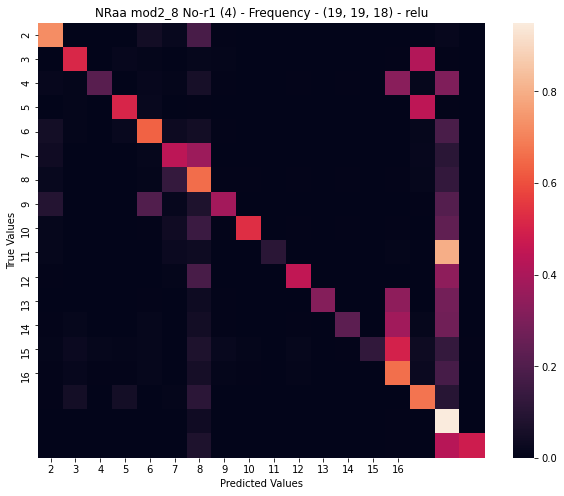

In [14]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# test_labels = test_labels.iloc[1:]
cf_matrix = confusion_matrix(test_labels.astype(int), pred_labels)
print(np.shape(cf_matrix))

cf_sum = np.sum(cf_matrix,axis = 1)
cf_norm = []
for i in range(18):
    cf_norm.append([a/cf_sum[i] for a in cf_matrix[i]]) 
    

labels = [ 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]#, 17, 18, 19] #list(range(1,21))
plt.figure(figsize=(10,8))
ax = sns.heatmap(cf_norm, xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.title("NRaa mod2_8 No-r1 (4) - Frequency - (19, 19, 18) - relu")
plt.show()

In [9]:
list(range(1,21))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

---
---
# Radius vs Accuracy
---
---

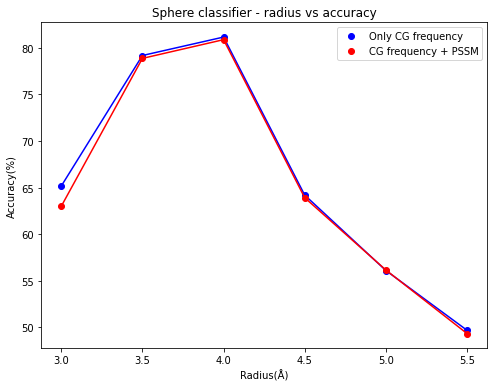

In [33]:
import matplotlib.pyplot as plt

r = [3,3.5,4,4.5,5,5.5]
freq_acc = [65.16, 79.18, 81.16, 64.19, 56.10, 49.68]
pssm_acc = [62.99, 78.87, 80.88, 63.91, 56.15, 49.33]


plt.figure(figsize=(8, 6))
plt.plot(r, freq_acc,'b-')
plt.plot(r, freq_acc,'bo', label='Only CG frequency')
plt.plot(r, pssm_acc,'r-')
plt.plot(r, pssm_acc,'ro', label='CG frequency + PSSM')
plt.xlabel('Radius(Å)')
plt.ylabel('Accuracy(%)')
plt.title('Sphere classifier - radius vs accuracy')
plt.legend()
plt.show()

---
---
# Hyperparameter optimisation

### NRaa(4Å) - PSSM + Frequency - (36, --HLs--, 16)
---
---

In [17]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import Sequence
import time
import csv
import os
import talos as ta


# Start Training
def run_model(x_train, y_train, x_val, y_val, params):
    start_time = time.time()
    
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(params['first_hidden_layer'], activation=params['activation'], input_shape=(36,)),
        tf.keras.layers.Dense(params['second_hidden_layer'], activation=params['activation']),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(params['third_hidden_layer'], activation=params['activation']),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(params['fourth_hidden_layer'], activation=params['activation']),
        tf.keras.layers.Dropout(0.2), 
        tf.keras.layers.Dense(params['fifth_hidden_layer'], activation=params['activation']),
        tf.keras.layers.Dropout(0.2), 
        tf.keras.layers.Dense(params['sixth_hidden_layer'], activation=params['activation']),
        tf.keras.layers.Dropout(0.2), 
        tf.keras.layers.Dense(16)
    ])

    model.compile(optimizer=params['optimizer'],
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])

#     train_data = get_dataset(train_file, batch_size, sel_cols, num_epochs)
#     val_data = get_dataset(val_file, batch_size, sel_cols, 1)

    cp_callback = tf.keras.callbacks.ModelCheckpoint(
        filepath=ckpt_path, 
        verbose=1, 
        save_weights_only=True,
        period=10)

    model.save(ckpt_path.format(epoch=0))
    
    batch_size = 1024
    epochs = 30
    history = model.fit(x_train, y_train, validation_data = (x_val,y_val), batch_size = batch_size, 
                        steps_per_epoch = np.ceil(x_train.shape[0] / batch_size), epochs = epochs, callbacks=[cp_callback])

    print("--- %s seconds ---" % (time.time() - start_time))
    
    return history,model

# Where to find the data?
path = os.getcwd()
file_train = 'feat_4_pssm_NRaa_train.csv'
file_val = 'feat_4_pssm_NRaa_val.csv'
file_test = 'feat_4_pssm_NRaa_test.csv'

ckpt_path = "%s/train_pssm4_NRaa/ckpts-{epoch:04d}.ckpt"%path



# y_cols = [1]
# x_train,y_train = get_db_numpy(train_file,x_cols,y_cols)
# x_val,y_val = get_db_numpy(val_file,x_cols,y_cols)

x_train = pd.read_csv(file_train, usecols=cols)
y_train = x_train.pop('Central Group') 

x_val = pd.read_csv(file_val, usecols=cols)
y_val = x_val.pop('Central Group')

sel_cols =  list(range(37)) #[1,5,9,13,17,21,25] #list(range(1,98))
col_types = ['float32' for i in sel_cols]
LABEL_COLUMN = 'Central Group'
num_epochs = None

# h,m = run_model(x_train, y_train, x_val, y_val)

    
p = {'first_hidden_layer':[72, 96, 128],
     'second_hidden_layer':[72, 96, 128],
     'third_hidden_layer':[36, 72, 96],
     'fourth_hidden_layer':[36, 72, 96],
     'fifth_hidden_layer':[16, 32, 64],
     'sixth_hidden_layer':[16, 32],
     'optimizer': ['Adam', 'Nadam'],
     'activation':['relu', 'elu', 'selu']}

t = ta.Scan(x=x_train, y=y_train, x_val=x_val, y_val=y_val, model=run_model, params=p, fraction_limit = 0.05,
            experiment_name='pssm4_NRaa')







  0%|          | 0/145 [00:00<?, ?it/s]

INFO:tensorflow:Assets written to: /home/shubhankar/Madhu_Lab/FEATURE/train_pssm4_NRaa/ckpts-0000.ckpt/assets
Epoch 1/30
137/137 [==============================] - 1s 10ms/step - loss: 1.7530 - accuracy: 0.4205 - val_loss: 1.2197 - val_accuracy: 0.6267
Epoch 2/30
137/137 [==============================] - 1s 9ms/step - loss: 1.2601 - accuracy: 0.6273 - val_loss: 1.0529 - val_accuracy: 0.6806
Epoch 3/30
137/137 [==============================] - 1s 9ms/step - loss: 1.1287 - accuracy: 0.6700 - val_loss: 0.9232 - val_accuracy: 0.7188
Epoch 4/30
137/137 [==============================] - 1s 9ms/step - loss: 1.0122 - accuracy: 0.7010 - val_loss: 0.8501 - val_accuracy: 0.7267
Epoch 5/30
137/137 [==============================] - 1s 9ms/step - loss: 0.9521 - accuracy: 0.7119 - val_loss: 0.8028 - val_accuracy: 0.7367
Epoch 6/30
137/137 [==============================] - 1s 9ms/step - loss: 0.9121 - accuracy: 0.7221 - val_loss: 0.7645 - val_accuracy: 0.7581
Epoch 7/30
137/137 [=================






  1%|          | 1/145 [00:41<1:40:04, 41.70s/it]

INFO:tensorflow:Assets written to: /home/shubhankar/Madhu_Lab/FEATURE/train_pssm4_NRaa/ckpts-0000.ckpt/assets
Epoch 1/30
137/137 [==============================] - 1s 8ms/step - loss: 2.0162 - accuracy: 0.3401 - val_loss: 1.3662 - val_accuracy: 0.5812
Epoch 2/30
137/137 [==============================] - 1s 8ms/step - loss: 1.3026 - accuracy: 0.6137 - val_loss: 1.0185 - val_accuracy: 0.6800
Epoch 3/30
137/137 [==============================] - 1s 8ms/step - loss: 1.0789 - accuracy: 0.6766 - val_loss: 0.8834 - val_accuracy: 0.7270
Epoch 4/30
137/137 [==============================] - 1s 8ms/step - loss: 0.9824 - accuracy: 0.7029 - val_loss: 0.8323 - val_accuracy: 0.7438
Epoch 5/30
137/137 [==============================] - 1s 8ms/step - loss: 0.9249 - accuracy: 0.7230 - val_loss: 0.7855 - val_accuracy: 0.7611
Epoch 6/30
137/137 [==============================] - 1s 8ms/step - loss: 0.8819 - accuracy: 0.7367 - val_loss: 0.7625 - val_accuracy: 0.7660
Epoch 7/30
137/137 [==================






  1%|▏         | 2/145 [01:16<1:34:36, 39.69s/it]

INFO:tensorflow:Assets written to: /home/shubhankar/Madhu_Lab/FEATURE/train_pssm4_NRaa/ckpts-0000.ckpt/assets
Epoch 1/30
137/137 [==============================] - 1s 10ms/step - loss: 1.8897 - accuracy: 0.4662 - val_loss: 0.9922 - val_accuracy: 0.6951
Epoch 2/30
137/137 [==============================] - 1s 9ms/step - loss: 1.0987 - accuracy: 0.6682 - val_loss: 0.8190 - val_accuracy: 0.7378
Epoch 3/30
137/137 [==============================] - 1s 9ms/step - loss: 0.9461 - accuracy: 0.7100 - val_loss: 0.7467 - val_accuracy: 0.7737
Epoch 4/30
137/137 [==============================] - 1s 8ms/step - loss: 0.8667 - accuracy: 0.7359 - val_loss: 0.7025 - val_accuracy: 0.7840
Epoch 5/30
137/137 [==============================] - 1s 9ms/step - loss: 0.8176 - accuracy: 0.7523 - val_loss: 0.6856 - val_accuracy: 0.7899
Epoch 6/30
137/137 [==============================] - 1s 8ms/step - loss: 0.7835 - accuracy: 0.7633 - val_loss: 0.6643 - val_accuracy: 0.7974
Epoch 7/30
137/137 [=================






  2%|▏         | 3/145 [01:54<1:32:19, 39.01s/it]

INFO:tensorflow:Assets written to: /home/shubhankar/Madhu_Lab/FEATURE/train_pssm4_NRaa/ckpts-0000.ckpt/assets
Epoch 1/30
137/137 [==============================] - 2s 12ms/step - loss: 1.5435 - accuracy: 0.5310 - val_loss: 0.9644 - val_accuracy: 0.6970
Epoch 2/30
137/137 [==============================] - 1s 10ms/step - loss: 0.9802 - accuracy: 0.7042 - val_loss: 0.7701 - val_accuracy: 0.7552
Epoch 3/30
137/137 [==============================] - 1s 10ms/step - loss: 0.8491 - accuracy: 0.7440 - val_loss: 0.7056 - val_accuracy: 0.7871
Epoch 4/30
137/137 [==============================] - 1s 10ms/step - loss: 0.7885 - accuracy: 0.7655 - val_loss: 0.6746 - val_accuracy: 0.7941
Epoch 5/30
137/137 [==============================] - 1s 10ms/step - loss: 0.7551 - accuracy: 0.7751 - val_loss: 0.6536 - val_accuracy: 0.7970
Epoch 6/30
137/137 [==============================] - 1s 10ms/step - loss: 0.7283 - accuracy: 0.7832 - val_loss: 0.6395 - val_accuracy: 0.8026
Epoch 7/30
137/137 [============






  3%|▎         | 4/145 [02:37<1:34:36, 40.26s/it]

INFO:tensorflow:Assets written to: /home/shubhankar/Madhu_Lab/FEATURE/train_pssm4_NRaa/ckpts-0000.ckpt/assets
Epoch 1/30
137/137 [==============================] - 1s 9ms/step - loss: 1.6418 - accuracy: 0.4869 - val_loss: 1.0150 - val_accuracy: 0.6775
Epoch 2/30
137/137 [==============================] - 1s 8ms/step - loss: 1.0583 - accuracy: 0.6692 - val_loss: 0.8177 - val_accuracy: 0.7362
Epoch 3/30
137/137 [==============================] - 1s 8ms/step - loss: 0.9208 - accuracy: 0.7143 - val_loss: 0.7599 - val_accuracy: 0.7654
Epoch 4/30
137/137 [==============================] - 1s 8ms/step - loss: 0.8582 - accuracy: 0.7368 - val_loss: 0.7213 - val_accuracy: 0.7790
Epoch 5/30
137/137 [==============================] - 1s 8ms/step - loss: 0.8130 - accuracy: 0.7526 - val_loss: 0.6873 - val_accuracy: 0.7934
Epoch 6/30
137/137 [==============================] - 1s 8ms/step - loss: 0.7753 - accuracy: 0.7668 - val_loss: 0.6715 - val_accuracy: 0.7956
Epoch 7/30
137/137 [==================






  3%|▎         | 5/145 [03:16<1:32:54, 39.82s/it]

INFO:tensorflow:Assets written to: /home/shubhankar/Madhu_Lab/FEATURE/train_pssm4_NRaa/ckpts-0000.ckpt/assets
Epoch 1/30
137/137 [==============================] - 1s 9ms/step - loss: 1.7168 - accuracy: 0.4623 - val_loss: 1.0571 - val_accuracy: 0.6849
Epoch 2/30
137/137 [==============================] - 1s 8ms/step - loss: 1.0852 - accuracy: 0.6736 - val_loss: 0.8377 - val_accuracy: 0.7239
Epoch 3/30
137/137 [==============================] - 1s 8ms/step - loss: 0.9459 - accuracy: 0.7098 - val_loss: 0.7764 - val_accuracy: 0.7607
Epoch 4/30
137/137 [==============================] - 1s 8ms/step - loss: 0.8835 - accuracy: 0.7286 - val_loss: 0.7236 - val_accuracy: 0.7711
Epoch 5/30
137/137 [==============================] - 1s 8ms/step - loss: 0.8416 - accuracy: 0.7451 - val_loss: 0.6989 - val_accuracy: 0.7859
Epoch 6/30
137/137 [==============================] - 1s 9ms/step - loss: 0.8111 - accuracy: 0.7543 - val_loss: 0.6752 - val_accuracy: 0.7937
Epoch 7/30
137/137 [==================






  4%|▍         | 6/145 [03:52<1:29:52, 38.80s/it]

INFO:tensorflow:Assets written to: /home/shubhankar/Madhu_Lab/FEATURE/train_pssm4_NRaa/ckpts-0000.ckpt/assets
Epoch 1/30
137/137 [==============================] - 1s 8ms/step - loss: 2.1327 - accuracy: 0.2748 - val_loss: 1.4805 - val_accuracy: 0.5625
Epoch 2/30
137/137 [==============================] - 1s 7ms/step - loss: 1.4129 - accuracy: 0.5734 - val_loss: 1.0920 - val_accuracy: 0.6755
Epoch 3/30
137/137 [==============================] - 1s 7ms/step - loss: 1.1816 - accuracy: 0.6526 - val_loss: 0.9679 - val_accuracy: 0.6922
Epoch 4/30
137/137 [==============================] - 1s 7ms/step - loss: 1.0963 - accuracy: 0.6686 - val_loss: 0.9254 - val_accuracy: 0.6950
Epoch 5/30
137/137 [==============================] - 1s 7ms/step - loss: 1.0487 - accuracy: 0.6764 - val_loss: 0.8927 - val_accuracy: 0.6987
Epoch 6/30
137/137 [==============================] - 1s 7ms/step - loss: 1.0171 - accuracy: 0.6819 - val_loss: 0.8643 - val_accuracy: 0.7086
Epoch 7/30
137/137 [==================






  5%|▍         | 7/145 [04:24<1:24:36, 36.79s/it]

INFO:tensorflow:Assets written to: /home/shubhankar/Madhu_Lab/FEATURE/train_pssm4_NRaa/ckpts-0000.ckpt/assets
Epoch 1/30
137/137 [==============================] - 1s 7ms/step - loss: 2.0705 - accuracy: 0.3180 - val_loss: 1.4167 - val_accuracy: 0.5450
Epoch 2/30
137/137 [==============================] - 1s 6ms/step - loss: 1.3918 - accuracy: 0.5868 - val_loss: 1.0730 - val_accuracy: 0.6692
Epoch 3/30
137/137 [==============================] - 1s 7ms/step - loss: 1.2063 - accuracy: 0.6444 - val_loss: 0.9712 - val_accuracy: 0.6837
Epoch 4/30
137/137 [==============================] - 1s 6ms/step - loss: 1.1147 - accuracy: 0.6680 - val_loss: 0.9208 - val_accuracy: 0.7013
Epoch 5/30
137/137 [==============================] - 1s 6ms/step - loss: 1.0594 - accuracy: 0.6791 - val_loss: 0.8837 - val_accuracy: 0.7025
Epoch 6/30
137/137 [==============================] - 1s 6ms/step - loss: 1.0202 - accuracy: 0.6871 - val_loss: 0.8599 - val_accuracy: 0.7092
Epoch 7/30
137/137 [==================






  6%|▌         | 8/145 [04:54<1:18:56, 34.57s/it]

INFO:tensorflow:Assets written to: /home/shubhankar/Madhu_Lab/FEATURE/train_pssm4_NRaa/ckpts-0000.ckpt/assets
Epoch 1/30
137/137 [==============================] - 1s 8ms/step - loss: 2.0902 - accuracy: 0.3449 - val_loss: 1.4331 - val_accuracy: 0.5055
Epoch 2/30
137/137 [==============================] - 1s 7ms/step - loss: 1.4658 - accuracy: 0.5489 - val_loss: 1.1880 - val_accuracy: 0.6414
Epoch 3/30
137/137 [==============================] - 1s 7ms/step - loss: 1.2696 - accuracy: 0.6296 - val_loss: 1.0635 - val_accuracy: 0.6784
Epoch 4/30
137/137 [==============================] - 1s 7ms/step - loss: 1.1423 - accuracy: 0.6666 - val_loss: 0.9341 - val_accuracy: 0.7043
Epoch 5/30
137/137 [==============================] - 1s 7ms/step - loss: 1.0587 - accuracy: 0.6839 - val_loss: 0.8785 - val_accuracy: 0.7122
Epoch 6/30
137/137 [==============================] - 1s 7ms/step - loss: 1.0179 - accuracy: 0.6912 - val_loss: 0.8476 - val_accuracy: 0.7267
Epoch 7/30
137/137 [==================






  6%|▌         | 9/145 [05:24<1:15:30, 33.31s/it]

INFO:tensorflow:Assets written to: /home/shubhankar/Madhu_Lab/FEATURE/train_pssm4_NRaa/ckpts-0000.ckpt/assets
Epoch 1/30
137/137 [==============================] - 1s 9ms/step - loss: 1.9200 - accuracy: 0.4399 - val_loss: 1.0758 - val_accuracy: 0.6677
Epoch 2/30
137/137 [==============================] - 1s 9ms/step - loss: 1.1795 - accuracy: 0.6512 - val_loss: 0.8493 - val_accuracy: 0.7307
Epoch 3/30
137/137 [==============================] - 1s 9ms/step - loss: 1.0041 - accuracy: 0.6974 - val_loss: 0.7631 - val_accuracy: 0.7702
Epoch 4/30
137/137 [==============================] - 1s 9ms/step - loss: 0.9160 - accuracy: 0.7251 - val_loss: 0.7203 - val_accuracy: 0.7875
Epoch 5/30
137/137 [==============================] - 1s 9ms/step - loss: 0.8664 - accuracy: 0.7415 - val_loss: 0.6990 - val_accuracy: 0.7888
Epoch 6/30
137/137 [==============================] - 1s 9ms/step - loss: 0.8321 - accuracy: 0.7514 - val_loss: 0.6798 - val_accuracy: 0.7979
Epoch 7/30
137/137 [==================






  7%|▋         | 10/145 [06:03<1:18:49, 35.03s/it]

INFO:tensorflow:Assets written to: /home/shubhankar/Madhu_Lab/FEATURE/train_pssm4_NRaa/ckpts-0000.ckpt/assets
Epoch 1/30
137/137 [==============================] - 1s 9ms/step - loss: 1.7420 - accuracy: 0.4566 - val_loss: 1.0364 - val_accuracy: 0.6768
Epoch 2/30
137/137 [==============================] - 1s 8ms/step - loss: 1.0772 - accuracy: 0.6710 - val_loss: 0.8439 - val_accuracy: 0.7280
Epoch 3/30
137/137 [==============================] - 1s 8ms/step - loss: 0.9246 - accuracy: 0.7174 - val_loss: 0.7608 - val_accuracy: 0.7584
Epoch 4/30
137/137 [==============================] - 1s 9ms/step - loss: 0.8632 - accuracy: 0.7368 - val_loss: 0.7246 - val_accuracy: 0.7791
Epoch 5/30
137/137 [==============================] - 1s 9ms/step - loss: 0.8208 - accuracy: 0.7493 - val_loss: 0.6940 - val_accuracy: 0.7860
Epoch 6/30
137/137 [==============================] - 1s 8ms/step - loss: 0.7960 - accuracy: 0.7597 - val_loss: 0.6766 - val_accuracy: 0.7927
Epoch 7/30
137/137 [==================






  8%|▊         | 11/145 [06:39<1:19:14, 35.48s/it]

INFO:tensorflow:Assets written to: /home/shubhankar/Madhu_Lab/FEATURE/train_pssm4_NRaa/ckpts-0000.ckpt/assets
Epoch 1/30
137/137 [==============================] - 1s 10ms/step - loss: 1.6604 - accuracy: 0.4947 - val_loss: 1.0236 - val_accuracy: 0.6898
Epoch 2/30
137/137 [==============================] - 1s 9ms/step - loss: 1.0983 - accuracy: 0.6700 - val_loss: 0.9328 - val_accuracy: 0.7029
Epoch 3/30
137/137 [==============================] - 1s 9ms/step - loss: 0.9718 - accuracy: 0.7006 - val_loss: 0.7921 - val_accuracy: 0.7401
Epoch 4/30
137/137 [==============================] - 1s 9ms/step - loss: 0.9011 - accuracy: 0.7217 - val_loss: 0.7443 - val_accuracy: 0.7523
Epoch 5/30
137/137 [==============================] - 1s 9ms/step - loss: 0.8568 - accuracy: 0.7382 - val_loss: 0.7259 - val_accuracy: 0.7854
Epoch 6/30
137/137 [==============================] - 1s 9ms/step - loss: 0.8297 - accuracy: 0.7476 - val_loss: 0.6844 - val_accuracy: 0.7915
Epoch 7/30
137/137 [=================






  8%|▊         | 12/145 [07:20<1:21:48, 36.91s/it]

INFO:tensorflow:Assets written to: /home/shubhankar/Madhu_Lab/FEATURE/train_pssm4_NRaa/ckpts-0000.ckpt/assets
Epoch 1/30
137/137 [==============================] - 1s 9ms/step - loss: 1.8961 - accuracy: 0.4433 - val_loss: 1.1050 - val_accuracy: 0.6336
Epoch 2/30
137/137 [==============================] - 1s 9ms/step - loss: 1.1301 - accuracy: 0.6530 - val_loss: 0.8355 - val_accuracy: 0.7314
Epoch 3/30
137/137 [==============================] - 1s 8ms/step - loss: 0.9660 - accuracy: 0.7016 - val_loss: 0.7633 - val_accuracy: 0.7698
Epoch 4/30
137/137 [==============================] - 1s 8ms/step - loss: 0.8804 - accuracy: 0.7296 - val_loss: 0.7104 - val_accuracy: 0.7861
Epoch 5/30
137/137 [==============================] - 1s 8ms/step - loss: 0.8346 - accuracy: 0.7456 - val_loss: 0.6872 - val_accuracy: 0.7952
Epoch 6/30
137/137 [==============================] - 1s 8ms/step - loss: 0.7997 - accuracy: 0.7587 - val_loss: 0.6743 - val_accuracy: 0.7984
Epoch 7/30
137/137 [==================






  9%|▉         | 13/145 [07:57<1:21:29, 37.04s/it]

INFO:tensorflow:Assets written to: /home/shubhankar/Madhu_Lab/FEATURE/train_pssm4_NRaa/ckpts-0000.ckpt/assets
Epoch 1/30
137/137 [==============================] - 1s 8ms/step - loss: 2.0064 - accuracy: 0.3810 - val_loss: 1.3428 - val_accuracy: 0.6139
Epoch 2/30
137/137 [==============================] - 1s 8ms/step - loss: 1.3555 - accuracy: 0.6078 - val_loss: 1.0680 - val_accuracy: 0.6762
Epoch 3/30
137/137 [==============================] - 1s 8ms/step - loss: 1.1463 - accuracy: 0.6618 - val_loss: 0.9434 - val_accuracy: 0.6988
Epoch 4/30
137/137 [==============================] - 1s 8ms/step - loss: 1.0603 - accuracy: 0.6815 - val_loss: 0.9009 - val_accuracy: 0.7090
Epoch 5/30
137/137 [==============================] - 1s 8ms/step - loss: 1.0154 - accuracy: 0.6919 - val_loss: 0.8599 - val_accuracy: 0.7232
Epoch 6/30
137/137 [==============================] - 1s 8ms/step - loss: 0.9757 - accuracy: 0.7019 - val_loss: 0.8481 - val_accuracy: 0.7259
Epoch 7/30
137/137 [==================






 10%|▉         | 14/145 [08:32<1:19:33, 36.44s/it]

INFO:tensorflow:Assets written to: /home/shubhankar/Madhu_Lab/FEATURE/train_pssm4_NRaa/ckpts-0000.ckpt/assets
Epoch 1/30
137/137 [==============================] - 1s 10ms/step - loss: 1.8151 - accuracy: 0.4239 - val_loss: 1.2370 - val_accuracy: 0.6004
Epoch 2/30
137/137 [==============================] - 1s 9ms/step - loss: 1.2463 - accuracy: 0.6250 - val_loss: 1.0276 - val_accuracy: 0.6751
Epoch 3/30
137/137 [==============================] - 1s 9ms/step - loss: 1.0568 - accuracy: 0.6750 - val_loss: 0.9031 - val_accuracy: 0.7102
Epoch 4/30
137/137 [==============================] - 1s 9ms/step - loss: 0.9713 - accuracy: 0.7004 - val_loss: 0.8498 - val_accuracy: 0.7336
Epoch 5/30
137/137 [==============================] - 1s 9ms/step - loss: 0.9146 - accuracy: 0.7209 - val_loss: 0.7971 - val_accuracy: 0.7517
Epoch 6/30
137/137 [==============================] - 1s 9ms/step - loss: 0.8723 - accuracy: 0.7375 - val_loss: 0.7655 - val_accuracy: 0.7593
Epoch 7/30
137/137 [=================






 10%|█         | 15/145 [09:12<1:21:14, 37.50s/it]

INFO:tensorflow:Assets written to: /home/shubhankar/Madhu_Lab/FEATURE/train_pssm4_NRaa/ckpts-0000.ckpt/assets
Epoch 1/30
137/137 [==============================] - 1s 9ms/step - loss: 1.5993 - accuracy: 0.5086 - val_loss: 0.9585 - val_accuracy: 0.6925
Epoch 2/30
137/137 [==============================] - 1s 8ms/step - loss: 0.9977 - accuracy: 0.6941 - val_loss: 0.7807 - val_accuracy: 0.7548
Epoch 3/30
137/137 [==============================] - 1s 8ms/step - loss: 0.8834 - accuracy: 0.7296 - val_loss: 0.7340 - val_accuracy: 0.7751
Epoch 4/30
137/137 [==============================] - 1s 8ms/step - loss: 0.8207 - accuracy: 0.7497 - val_loss: 0.6904 - val_accuracy: 0.7884
Epoch 5/30
137/137 [==============================] - 1s 8ms/step - loss: 0.7820 - accuracy: 0.7646 - val_loss: 0.6644 - val_accuracy: 0.7942
Epoch 6/30
137/137 [==============================] - 1s 8ms/step - loss: 0.7537 - accuracy: 0.7727 - val_loss: 0.6450 - val_accuracy: 0.7996
Epoch 7/30
137/137 [==================






 11%|█         | 16/145 [09:48<1:19:37, 37.03s/it]

INFO:tensorflow:Assets written to: /home/shubhankar/Madhu_Lab/FEATURE/train_pssm4_NRaa/ckpts-0000.ckpt/assets
Epoch 1/30
137/137 [==============================] - 1s 9ms/step - loss: 1.9618 - accuracy: 0.3670 - val_loss: 1.2761 - val_accuracy: 0.6103
Epoch 2/30
137/137 [==============================] - 1s 8ms/step - loss: 1.3134 - accuracy: 0.6089 - val_loss: 1.0749 - val_accuracy: 0.6633
Epoch 3/30
137/137 [==============================] - 1s 8ms/step - loss: 1.1301 - accuracy: 0.6616 - val_loss: 0.9408 - val_accuracy: 0.6937
Epoch 4/30
137/137 [==============================] - 1s 8ms/step - loss: 1.0416 - accuracy: 0.6817 - val_loss: 0.8847 - val_accuracy: 0.7146
Epoch 5/30
137/137 [==============================] - 1s 8ms/step - loss: 0.9887 - accuracy: 0.6962 - val_loss: 0.8779 - val_accuracy: 0.7177
Epoch 6/30
137/137 [==============================] - 1s 8ms/step - loss: 0.9462 - accuracy: 0.7109 - val_loss: 0.7974 - val_accuracy: 0.7547
Epoch 7/30
137/137 [==================






 12%|█▏        | 17/145 [10:25<1:18:42, 36.89s/it]

INFO:tensorflow:Assets written to: /home/shubhankar/Madhu_Lab/FEATURE/train_pssm4_NRaa/ckpts-0000.ckpt/assets
Epoch 1/30
137/137 [==============================] - 1s 9ms/step - loss: 1.9492 - accuracy: 0.4049 - val_loss: 1.2692 - val_accuracy: 0.6265
Epoch 2/30
137/137 [==============================] - 1s 8ms/step - loss: 1.3292 - accuracy: 0.6184 - val_loss: 1.0966 - val_accuracy: 0.6677
Epoch 3/30
137/137 [==============================] - 1s 8ms/step - loss: 1.1642 - accuracy: 0.6551 - val_loss: 0.9589 - val_accuracy: 0.6980
Epoch 4/30
137/137 [==============================] - 1s 8ms/step - loss: 1.0679 - accuracy: 0.6775 - val_loss: 0.8886 - val_accuracy: 0.7147
Epoch 5/30
137/137 [==============================] - 1s 8ms/step - loss: 1.0068 - accuracy: 0.6947 - val_loss: 0.8579 - val_accuracy: 0.7308
Epoch 6/30
137/137 [==============================] - 1s 8ms/step - loss: 0.9579 - accuracy: 0.7106 - val_loss: 0.8275 - val_accuracy: 0.7418
Epoch 7/30
137/137 [==================






 12%|█▏        | 18/145 [11:01<1:18:05, 36.90s/it]

INFO:tensorflow:Assets written to: /home/shubhankar/Madhu_Lab/FEATURE/train_pssm4_NRaa/ckpts-0000.ckpt/assets
Epoch 1/30
137/137 [==============================] - 1s 9ms/step - loss: 1.8408 - accuracy: 0.4445 - val_loss: 1.0786 - val_accuracy: 0.6601
Epoch 2/30
137/137 [==============================] - 1s 8ms/step - loss: 1.1626 - accuracy: 0.6478 - val_loss: 0.8424 - val_accuracy: 0.7328
Epoch 3/30
137/137 [==============================] - 1s 8ms/step - loss: 0.9929 - accuracy: 0.6979 - val_loss: 0.7806 - val_accuracy: 0.7590
Epoch 4/30
137/137 [==============================] - 1s 8ms/step - loss: 0.9143 - accuracy: 0.7214 - val_loss: 0.7364 - val_accuracy: 0.7763
Epoch 5/30
137/137 [==============================] - 1s 8ms/step - loss: 0.8622 - accuracy: 0.7389 - val_loss: 0.7176 - val_accuracy: 0.7853
Epoch 6/30
137/137 [==============================] - 1s 8ms/step - loss: 0.8293 - accuracy: 0.7512 - val_loss: 0.6903 - val_accuracy: 0.7925
Epoch 7/30
137/137 [==================






 13%|█▎        | 19/145 [11:38<1:17:33, 36.93s/it]

INFO:tensorflow:Assets written to: /home/shubhankar/Madhu_Lab/FEATURE/train_pssm4_NRaa/ckpts-0000.ckpt/assets
Epoch 1/30
137/137 [==============================] - 1s 10ms/step - loss: 1.9624 - accuracy: 0.4466 - val_loss: 1.0209 - val_accuracy: 0.6927
Epoch 2/30
137/137 [==============================] - 1s 9ms/step - loss: 1.1979 - accuracy: 0.6459 - val_loss: 0.8654 - val_accuracy: 0.7194
Epoch 3/30
137/137 [==============================] - 1s 10ms/step - loss: 1.0226 - accuracy: 0.6923 - val_loss: 0.7836 - val_accuracy: 0.7463
Epoch 4/30
137/137 [==============================] - 1s 9ms/step - loss: 0.9305 - accuracy: 0.7204 - val_loss: 0.7485 - val_accuracy: 0.7772
Epoch 5/30
137/137 [==============================] - 1s 9ms/step - loss: 0.8718 - accuracy: 0.7401 - val_loss: 0.6972 - val_accuracy: 0.7925
Epoch 6/30
137/137 [==============================] - 1s 9ms/step - loss: 0.8319 - accuracy: 0.7539 - val_loss: 0.6762 - val_accuracy: 0.7975
Epoch 7/30
137/137 [================






 14%|█▍        | 20/145 [12:19<1:19:13, 38.03s/it]

INFO:tensorflow:Assets written to: /home/shubhankar/Madhu_Lab/FEATURE/train_pssm4_NRaa/ckpts-0000.ckpt/assets
Epoch 1/30
137/137 [==============================] - 1s 8ms/step - loss: 1.7478 - accuracy: 0.4835 - val_loss: 1.1306 - val_accuracy: 0.6727
Epoch 2/30
137/137 [==============================] - 1s 8ms/step - loss: 1.1348 - accuracy: 0.6704 - val_loss: 0.8856 - val_accuracy: 0.7250
Epoch 3/30
137/137 [==============================] - 1s 8ms/step - loss: 0.9805 - accuracy: 0.7094 - val_loss: 0.7994 - val_accuracy: 0.7433
Epoch 4/30
137/137 [==============================] - 1s 8ms/step - loss: 0.9169 - accuracy: 0.7243 - val_loss: 0.7628 - val_accuracy: 0.7569
Epoch 5/30
137/137 [==============================] - 1s 7ms/step - loss: 0.8731 - accuracy: 0.7368 - val_loss: 0.7281 - val_accuracy: 0.7706
Epoch 6/30
137/137 [==============================] - 1s 7ms/step - loss: 0.8416 - accuracy: 0.7462 - val_loss: 0.7000 - val_accuracy: 0.7859
Epoch 7/30
137/137 [==================






 14%|█▍        | 21/145 [12:52<1:15:40, 36.61s/it]

INFO:tensorflow:Assets written to: /home/shubhankar/Madhu_Lab/FEATURE/train_pssm4_NRaa/ckpts-0000.ckpt/assets
Epoch 1/30
137/137 [==============================] - 1s 8ms/step - loss: 1.9351 - accuracy: 0.4072 - val_loss: 1.0893 - val_accuracy: 0.6670
Epoch 2/30
137/137 [==============================] - 1s 8ms/step - loss: 1.1810 - accuracy: 0.6411 - val_loss: 0.8733 - val_accuracy: 0.7149
Epoch 3/30
137/137 [==============================] - 1s 8ms/step - loss: 1.0044 - accuracy: 0.6919 - val_loss: 0.8047 - val_accuracy: 0.7418
Epoch 4/30
137/137 [==============================] - 1s 8ms/step - loss: 0.9249 - accuracy: 0.7176 - val_loss: 0.7482 - val_accuracy: 0.7683
Epoch 5/30
137/137 [==============================] - 1s 8ms/step - loss: 0.8752 - accuracy: 0.7355 - val_loss: 0.7219 - val_accuracy: 0.7861
Epoch 6/30
137/137 [==============================] - 1s 8ms/step - loss: 0.8394 - accuracy: 0.7490 - val_loss: 0.6956 - val_accuracy: 0.7905
Epoch 7/30
137/137 [==================






 15%|█▌        | 22/145 [13:27<1:13:39, 35.93s/it]

INFO:tensorflow:Assets written to: /home/shubhankar/Madhu_Lab/FEATURE/train_pssm4_NRaa/ckpts-0000.ckpt/assets
Epoch 1/30
137/137 [==============================] - 1s 10ms/step - loss: 1.5877 - accuracy: 0.5018 - val_loss: 0.9837 - val_accuracy: 0.6829
Epoch 2/30
137/137 [==============================] - 1s 9ms/step - loss: 1.0382 - accuracy: 0.6788 - val_loss: 0.8017 - val_accuracy: 0.7422
Epoch 3/30
137/137 [==============================] - 1s 9ms/step - loss: 0.9127 - accuracy: 0.7173 - val_loss: 0.7677 - val_accuracy: 0.7622
Epoch 4/30
137/137 [==============================] - 1s 9ms/step - loss: 0.8503 - accuracy: 0.7399 - val_loss: 0.6936 - val_accuracy: 0.7849
Epoch 5/30
137/137 [==============================] - 1s 9ms/step - loss: 0.8102 - accuracy: 0.7541 - val_loss: 0.6740 - val_accuracy: 0.7929
Epoch 6/30
137/137 [==============================] - 1s 9ms/step - loss: 0.7815 - accuracy: 0.7655 - val_loss: 0.6585 - val_accuracy: 0.7965
Epoch 7/30
137/137 [=================






 16%|█▌        | 23/145 [14:08<1:16:19, 37.53s/it]

INFO:tensorflow:Assets written to: /home/shubhankar/Madhu_Lab/FEATURE/train_pssm4_NRaa/ckpts-0000.ckpt/assets
Epoch 1/30
137/137 [==============================] - 1s 8ms/step - loss: 1.7588 - accuracy: 0.4780 - val_loss: 0.9838 - val_accuracy: 0.6937
Epoch 2/30
137/137 [==============================] - 1s 7ms/step - loss: 1.0743 - accuracy: 0.6711 - val_loss: 0.8061 - val_accuracy: 0.7486
Epoch 3/30
137/137 [==============================] - 1s 8ms/step - loss: 0.9209 - accuracy: 0.7145 - val_loss: 0.7466 - val_accuracy: 0.7757
Epoch 4/30
137/137 [==============================] - 1s 8ms/step - loss: 0.8505 - accuracy: 0.7383 - val_loss: 0.7040 - val_accuracy: 0.7874
Epoch 5/30
137/137 [==============================] - 1s 8ms/step - loss: 0.8087 - accuracy: 0.7534 - val_loss: 0.6770 - val_accuracy: 0.7949
Epoch 6/30
137/137 [==============================] - 1s 8ms/step - loss: 0.7787 - accuracy: 0.7643 - val_loss: 0.6637 - val_accuracy: 0.7966
Epoch 7/30
137/137 [==================






 17%|█▋        | 24/145 [14:42<1:13:16, 36.34s/it]

INFO:tensorflow:Assets written to: /home/shubhankar/Madhu_Lab/FEATURE/train_pssm4_NRaa/ckpts-0000.ckpt/assets
Epoch 1/30
137/137 [==============================] - 1s 8ms/step - loss: 2.0751 - accuracy: 0.3967 - val_loss: 1.1296 - val_accuracy: 0.6605
Epoch 2/30
137/137 [==============================] - 1s 8ms/step - loss: 1.2431 - accuracy: 0.6283 - val_loss: 0.8783 - val_accuracy: 0.7270
Epoch 3/30
137/137 [==============================] - 1s 7ms/step - loss: 1.0383 - accuracy: 0.6872 - val_loss: 0.8195 - val_accuracy: 0.7425
Epoch 4/30
137/137 [==============================] - 1s 7ms/step - loss: 0.9603 - accuracy: 0.7096 - val_loss: 0.7781 - val_accuracy: 0.7525
Epoch 5/30
137/137 [==============================] - 1s 7ms/step - loss: 0.9060 - accuracy: 0.7255 - val_loss: 0.7401 - val_accuracy: 0.7608
Epoch 6/30
137/137 [==============================] - 1s 8ms/step - loss: 0.8700 - accuracy: 0.7355 - val_loss: 0.7227 - val_accuracy: 0.7638
Epoch 7/30
137/137 [==================






 17%|█▋        | 25/145 [15:15<1:10:56, 35.47s/it]

INFO:tensorflow:Assets written to: /home/shubhankar/Madhu_Lab/FEATURE/train_pssm4_NRaa/ckpts-0000.ckpt/assets
Epoch 1/30
137/137 [==============================] - 1s 9ms/step - loss: 1.7220 - accuracy: 0.4876 - val_loss: 1.0414 - val_accuracy: 0.6842
Epoch 2/30
137/137 [==============================] - 1s 9ms/step - loss: 1.1039 - accuracy: 0.6741 - val_loss: 0.8346 - val_accuracy: 0.7374
Epoch 3/30
137/137 [==============================] - 1s 8ms/step - loss: 0.9677 - accuracy: 0.7100 - val_loss: 0.7638 - val_accuracy: 0.7712
Epoch 4/30
137/137 [==============================] - 1s 8ms/step - loss: 0.8965 - accuracy: 0.7320 - val_loss: 0.7246 - val_accuracy: 0.7789
Epoch 5/30
137/137 [==============================] - 1s 8ms/step - loss: 0.8517 - accuracy: 0.7471 - val_loss: 0.6979 - val_accuracy: 0.7879
Epoch 6/30
137/137 [==============================] - 1s 8ms/step - loss: 0.8213 - accuracy: 0.7574 - val_loss: 0.6769 - val_accuracy: 0.7962
Epoch 7/30
137/137 [==================






 18%|█▊        | 26/145 [15:52<1:11:21, 35.98s/it]

INFO:tensorflow:Assets written to: /home/shubhankar/Madhu_Lab/FEATURE/train_pssm4_NRaa/ckpts-0000.ckpt/assets
Epoch 1/30
137/137 [==============================] - 1s 8ms/step - loss: 1.7771 - accuracy: 0.4627 - val_loss: 1.0685 - val_accuracy: 0.6765
Epoch 2/30
137/137 [==============================] - 1s 8ms/step - loss: 1.1733 - accuracy: 0.6507 - val_loss: 0.8786 - val_accuracy: 0.7224
Epoch 3/30
137/137 [==============================] - 1s 8ms/step - loss: 1.0166 - accuracy: 0.6927 - val_loss: 0.8112 - val_accuracy: 0.7435
Epoch 4/30
137/137 [==============================] - 1s 8ms/step - loss: 0.9441 - accuracy: 0.7154 - val_loss: 0.7621 - val_accuracy: 0.7535
Epoch 5/30
137/137 [==============================] - 1s 7ms/step - loss: 0.8994 - accuracy: 0.7275 - val_loss: 0.7334 - val_accuracy: 0.7752
Epoch 6/30
137/137 [==============================] - 1s 7ms/step - loss: 0.8703 - accuracy: 0.7381 - val_loss: 0.7193 - val_accuracy: 0.7833
Epoch 7/30
137/137 [==================






 19%|█▊        | 27/145 [16:26<1:09:39, 35.42s/it]

INFO:tensorflow:Assets written to: /home/shubhankar/Madhu_Lab/FEATURE/train_pssm4_NRaa/ckpts-0000.ckpt/assets
Epoch 1/30
137/137 [==============================] - 1s 10ms/step - loss: 1.8479 - accuracy: 0.4372 - val_loss: 1.0408 - val_accuracy: 0.6873
Epoch 2/30
137/137 [==============================] - 1s 9ms/step - loss: 1.1362 - accuracy: 0.6576 - val_loss: 0.8381 - val_accuracy: 0.7307
Epoch 3/30
137/137 [==============================] - 1s 9ms/step - loss: 0.9629 - accuracy: 0.7090 - val_loss: 0.7518 - val_accuracy: 0.7621
Epoch 4/30
137/137 [==============================] - 1s 9ms/step - loss: 0.8828 - accuracy: 0.7364 - val_loss: 0.7074 - val_accuracy: 0.7865
Epoch 5/30
137/137 [==============================] - 1s 9ms/step - loss: 0.8309 - accuracy: 0.7542 - val_loss: 0.6758 - val_accuracy: 0.7940
Epoch 6/30
137/137 [==============================] - 1s 9ms/step - loss: 0.7952 - accuracy: 0.7643 - val_loss: 0.6624 - val_accuracy: 0.7969
Epoch 7/30
137/137 [=================






 19%|█▉        | 28/145 [17:07<1:12:07, 36.98s/it]

INFO:tensorflow:Assets written to: /home/shubhankar/Madhu_Lab/FEATURE/train_pssm4_NRaa/ckpts-0000.ckpt/assets
Epoch 1/30
137/137 [==============================] - 1s 9ms/step - loss: 1.6330 - accuracy: 0.4918 - val_loss: 0.9730 - val_accuracy: 0.6883
Epoch 2/30
137/137 [==============================] - 1s 8ms/step - loss: 1.0418 - accuracy: 0.6735 - val_loss: 0.8210 - val_accuracy: 0.7413
Epoch 3/30
137/137 [==============================] - 1s 8ms/step - loss: 0.9013 - accuracy: 0.7194 - val_loss: 0.7353 - val_accuracy: 0.7776
Epoch 4/30
137/137 [==============================] - 1s 9ms/step - loss: 0.8301 - accuracy: 0.7455 - val_loss: 0.6945 - val_accuracy: 0.7881
Epoch 5/30
137/137 [==============================] - 1s 9ms/step - loss: 0.7836 - accuracy: 0.7623 - val_loss: 0.6667 - val_accuracy: 0.7961
Epoch 6/30
137/137 [==============================] - 1s 8ms/step - loss: 0.7545 - accuracy: 0.7723 - val_loss: 0.6481 - val_accuracy: 0.7973
Epoch 7/30
137/137 [==================






 20%|██        | 29/145 [17:45<1:12:02, 37.26s/it]

INFO:tensorflow:Assets written to: /home/shubhankar/Madhu_Lab/FEATURE/train_pssm4_NRaa/ckpts-0000.ckpt/assets
Epoch 1/30
137/137 [==============================] - 1s 9ms/step - loss: 1.8293 - accuracy: 0.4484 - val_loss: 1.0990 - val_accuracy: 0.6728
Epoch 2/30
137/137 [==============================] - 1s 8ms/step - loss: 1.1996 - accuracy: 0.6447 - val_loss: 0.9057 - val_accuracy: 0.7155
Epoch 3/30
137/137 [==============================] - 1s 8ms/step - loss: 1.0418 - accuracy: 0.6884 - val_loss: 0.8240 - val_accuracy: 0.7376
Epoch 4/30
137/137 [==============================] - 1s 8ms/step - loss: 0.9665 - accuracy: 0.7077 - val_loss: 0.7786 - val_accuracy: 0.7502
Epoch 5/30
137/137 [==============================] - 1s 8ms/step - loss: 0.9195 - accuracy: 0.7207 - val_loss: 0.7537 - val_accuracy: 0.7692
Epoch 6/30
137/137 [==============================] - 1s 8ms/step - loss: 0.8837 - accuracy: 0.7320 - val_loss: 0.7357 - val_accuracy: 0.7707
Epoch 7/30
137/137 [==================






 21%|██        | 30/145 [18:20<1:10:17, 36.67s/it]

INFO:tensorflow:Assets written to: /home/shubhankar/Madhu_Lab/FEATURE/train_pssm4_NRaa/ckpts-0000.ckpt/assets
Epoch 1/30
137/137 [==============================] - 1s 9ms/step - loss: 1.8904 - accuracy: 0.4394 - val_loss: 1.0455 - val_accuracy: 0.6780
Epoch 2/30
137/137 [==============================] - 1s 8ms/step - loss: 1.1477 - accuracy: 0.6550 - val_loss: 0.8404 - val_accuracy: 0.7348
Epoch 3/30
137/137 [==============================] - 1s 8ms/step - loss: 0.9908 - accuracy: 0.6997 - val_loss: 0.7828 - val_accuracy: 0.7599
Epoch 4/30
137/137 [==============================] - 1s 8ms/step - loss: 0.9155 - accuracy: 0.7244 - val_loss: 0.7418 - val_accuracy: 0.7815
Epoch 5/30
137/137 [==============================] - 1s 8ms/step - loss: 0.8616 - accuracy: 0.7425 - val_loss: 0.7119 - val_accuracy: 0.7852
Epoch 6/30
137/137 [==============================] - 1s 8ms/step - loss: 0.8260 - accuracy: 0.7539 - val_loss: 0.6847 - val_accuracy: 0.7952
Epoch 7/30
137/137 [==================






 21%|██▏       | 31/145 [18:57<1:09:52, 36.78s/it]

INFO:tensorflow:Assets written to: /home/shubhankar/Madhu_Lab/FEATURE/train_pssm4_NRaa/ckpts-0000.ckpt/assets
Epoch 1/30
137/137 [==============================] - 1s 8ms/step - loss: 2.2688 - accuracy: 0.2835 - val_loss: 1.6066 - val_accuracy: 0.5477
Epoch 2/30
137/137 [==============================] - 1s 7ms/step - loss: 1.4397 - accuracy: 0.5713 - val_loss: 1.0817 - val_accuracy: 0.6684
Epoch 3/30
137/137 [==============================] - 1s 8ms/step - loss: 1.1886 - accuracy: 0.6495 - val_loss: 0.9455 - val_accuracy: 0.6955
Epoch 4/30
137/137 [==============================] - 1s 7ms/step - loss: 1.0605 - accuracy: 0.6809 - val_loss: 0.8719 - val_accuracy: 0.7266
Epoch 5/30
137/137 [==============================] - 1s 8ms/step - loss: 0.9917 - accuracy: 0.7018 - val_loss: 0.8398 - val_accuracy: 0.7333
Epoch 6/30
137/137 [==============================] - 1s 8ms/step - loss: 0.9469 - accuracy: 0.7152 - val_loss: 0.8000 - val_accuracy: 0.7531
Epoch 7/30
137/137 [==================






 22%|██▏       | 32/145 [19:31<1:07:25, 35.80s/it]

INFO:tensorflow:Assets written to: /home/shubhankar/Madhu_Lab/FEATURE/train_pssm4_NRaa/ckpts-0000.ckpt/assets
Epoch 1/30
137/137 [==============================] - 1s 10ms/step - loss: 1.9062 - accuracy: 0.4396 - val_loss: 1.0603 - val_accuracy: 0.6720
Epoch 2/30
137/137 [==============================] - 1s 9ms/step - loss: 1.1128 - accuracy: 0.6561 - val_loss: 0.8020 - val_accuracy: 0.7422
Epoch 3/30
137/137 [==============================] - 1s 9ms/step - loss: 0.9415 - accuracy: 0.7085 - val_loss: 0.7392 - val_accuracy: 0.7728
Epoch 4/30
137/137 [==============================] - 1s 9ms/step - loss: 0.8653 - accuracy: 0.7338 - val_loss: 0.7004 - val_accuracy: 0.7913
Epoch 5/30
137/137 [==============================] - 1s 9ms/step - loss: 0.8166 - accuracy: 0.7517 - val_loss: 0.6820 - val_accuracy: 0.7949
Epoch 6/30
137/137 [==============================] - 1s 9ms/step - loss: 0.7798 - accuracy: 0.7643 - val_loss: 0.6586 - val_accuracy: 0.7974
Epoch 7/30
137/137 [=================






 23%|██▎       | 33/145 [20:09<1:08:27, 36.67s/it]

INFO:tensorflow:Assets written to: /home/shubhankar/Madhu_Lab/FEATURE/train_pssm4_NRaa/ckpts-0000.ckpt/assets
Epoch 1/30
137/137 [==============================] - 1s 9ms/step - loss: 1.7987 - accuracy: 0.4691 - val_loss: 1.1254 - val_accuracy: 0.6676
Epoch 2/30
137/137 [==============================] - 1s 8ms/step - loss: 1.1723 - accuracy: 0.6490 - val_loss: 0.8990 - val_accuracy: 0.7110
Epoch 3/30
137/137 [==============================] - 1s 8ms/step - loss: 1.0057 - accuracy: 0.6935 - val_loss: 0.8086 - val_accuracy: 0.7407
Epoch 4/30
137/137 [==============================] - 1s 9ms/step - loss: 0.9186 - accuracy: 0.7199 - val_loss: 0.7552 - val_accuracy: 0.7548
Epoch 5/30
137/137 [==============================] - 1s 8ms/step - loss: 0.8648 - accuracy: 0.7371 - val_loss: 0.7264 - val_accuracy: 0.7750
Epoch 6/30
137/137 [==============================] - 1s 8ms/step - loss: 0.8276 - accuracy: 0.7518 - val_loss: 0.6931 - val_accuracy: 0.7900
Epoch 7/30
137/137 [==================






 23%|██▎       | 34/145 [20:47<1:08:10, 36.85s/it]

INFO:tensorflow:Assets written to: /home/shubhankar/Madhu_Lab/FEATURE/train_pssm4_NRaa/ckpts-0000.ckpt/assets
Epoch 1/30
137/137 [==============================] - 1s 9ms/step - loss: 1.9081 - accuracy: 0.4348 - val_loss: 1.0193 - val_accuracy: 0.6807
Epoch 2/30
137/137 [==============================] - 1s 8ms/step - loss: 1.1568 - accuracy: 0.6471 - val_loss: 0.8386 - val_accuracy: 0.7321
Epoch 3/30
137/137 [==============================] - 1s 9ms/step - loss: 0.9997 - accuracy: 0.6919 - val_loss: 0.8058 - val_accuracy: 0.7534
Epoch 4/30
137/137 [==============================] - 1s 8ms/step - loss: 0.9185 - accuracy: 0.7188 - val_loss: 0.7238 - val_accuracy: 0.7791
Epoch 5/30
137/137 [==============================] - 1s 8ms/step - loss: 0.8654 - accuracy: 0.7371 - val_loss: 0.7108 - val_accuracy: 0.7819
Epoch 6/30
137/137 [==============================] - 1s 8ms/step - loss: 0.8293 - accuracy: 0.7503 - val_loss: 0.6755 - val_accuracy: 0.7967
Epoch 7/30
137/137 [==================






 24%|██▍       | 35/145 [21:24<1:07:54, 37.04s/it]

INFO:tensorflow:Assets written to: /home/shubhankar/Madhu_Lab/FEATURE/train_pssm4_NRaa/ckpts-0000.ckpt/assets
Epoch 1/30
137/137 [==============================] - 1s 8ms/step - loss: 2.1124 - accuracy: 0.3094 - val_loss: 1.5955 - val_accuracy: 0.4915
Epoch 2/30
137/137 [==============================] - 1s 7ms/step - loss: 1.5340 - accuracy: 0.5358 - val_loss: 1.2120 - val_accuracy: 0.6476
Epoch 3/30
137/137 [==============================] - 1s 7ms/step - loss: 1.2984 - accuracy: 0.6218 - val_loss: 1.0753 - val_accuracy: 0.6858
Epoch 4/30
137/137 [==============================] - 1s 7ms/step - loss: 1.1669 - accuracy: 0.6609 - val_loss: 0.9743 - val_accuracy: 0.7077
Epoch 5/30
137/137 [==============================] - 1s 7ms/step - loss: 1.0893 - accuracy: 0.6813 - val_loss: 0.9279 - val_accuracy: 0.7266
Epoch 6/30
137/137 [==============================] - 1s 7ms/step - loss: 1.0400 - accuracy: 0.6973 - val_loss: 0.8738 - val_accuracy: 0.7389
Epoch 7/30
137/137 [==================






 25%|██▍       | 36/145 [21:54<1:03:28, 34.94s/it]

INFO:tensorflow:Assets written to: /home/shubhankar/Madhu_Lab/FEATURE/train_pssm4_NRaa/ckpts-0000.ckpt/assets
Epoch 1/30
137/137 [==============================] - 1s 8ms/step - loss: 1.9824 - accuracy: 0.3306 - val_loss: 1.4183 - val_accuracy: 0.5428
Epoch 2/30
137/137 [==============================] - 1s 7ms/step - loss: 1.3229 - accuracy: 0.6050 - val_loss: 1.0436 - val_accuracy: 0.6740
Epoch 3/30
137/137 [==============================] - 1s 7ms/step - loss: 1.0943 - accuracy: 0.6719 - val_loss: 0.9162 - val_accuracy: 0.7017
Epoch 4/30
137/137 [==============================] - 1s 7ms/step - loss: 1.0015 - accuracy: 0.6944 - val_loss: 0.8649 - val_accuracy: 0.7169
Epoch 5/30
137/137 [==============================] - 1s 7ms/step - loss: 0.9485 - accuracy: 0.7097 - val_loss: 0.8211 - val_accuracy: 0.7442
Epoch 6/30
137/137 [==============================] - 1s 7ms/step - loss: 0.9076 - accuracy: 0.7253 - val_loss: 0.7885 - val_accuracy: 0.7495
Epoch 7/30
137/137 [==================






 26%|██▌       | 37/145 [22:26<1:01:29, 34.16s/it]

INFO:tensorflow:Assets written to: /home/shubhankar/Madhu_Lab/FEATURE/train_pssm4_NRaa/ckpts-0000.ckpt/assets
Epoch 1/30
137/137 [==============================] - 1s 8ms/step - loss: 1.9169 - accuracy: 0.3639 - val_loss: 1.3920 - val_accuracy: 0.5154
Epoch 2/30
137/137 [==============================] - 1s 7ms/step - loss: 1.3287 - accuracy: 0.5928 - val_loss: 1.0452 - val_accuracy: 0.6654
Epoch 3/30
137/137 [==============================] - 1s 8ms/step - loss: 1.1164 - accuracy: 0.6645 - val_loss: 0.9088 - val_accuracy: 0.7175
Epoch 4/30
137/137 [==============================] - 1s 8ms/step - loss: 1.0113 - accuracy: 0.6931 - val_loss: 0.8515 - val_accuracy: 0.7291
Epoch 5/30
137/137 [==============================] - 1s 7ms/step - loss: 0.9525 - accuracy: 0.7101 - val_loss: 0.8119 - val_accuracy: 0.7396
Epoch 6/30
137/137 [==============================] - 1s 8ms/step - loss: 0.9171 - accuracy: 0.7211 - val_loss: 0.7889 - val_accuracy: 0.7531
Epoch 7/30
137/137 [==================






 26%|██▌       | 38/145 [23:00<1:00:29, 33.92s/it]

INFO:tensorflow:Assets written to: /home/shubhankar/Madhu_Lab/FEATURE/train_pssm4_NRaa/ckpts-0000.ckpt/assets
Epoch 1/30
137/137 [==============================] - 1s 8ms/step - loss: 1.9702 - accuracy: 0.3758 - val_loss: 1.3006 - val_accuracy: 0.6201
Epoch 2/30
137/137 [==============================] - 1s 7ms/step - loss: 1.3276 - accuracy: 0.6062 - val_loss: 1.0495 - val_accuracy: 0.6890
Epoch 3/30
137/137 [==============================] - 1s 8ms/step - loss: 1.1268 - accuracy: 0.6660 - val_loss: 0.9075 - val_accuracy: 0.7118
Epoch 4/30
137/137 [==============================] - 1s 7ms/step - loss: 1.0253 - accuracy: 0.6903 - val_loss: 0.8463 - val_accuracy: 0.7342
Epoch 5/30
137/137 [==============================] - 1s 7ms/step - loss: 0.9715 - accuracy: 0.7054 - val_loss: 0.8328 - val_accuracy: 0.7367
Epoch 6/30
137/137 [==============================] - 1s 7ms/step - loss: 0.9364 - accuracy: 0.7167 - val_loss: 0.7971 - val_accuracy: 0.7445
Epoch 7/30
137/137 [==================






 27%|██▋       | 39/145 [23:33<59:25, 33.63s/it]  

INFO:tensorflow:Assets written to: /home/shubhankar/Madhu_Lab/FEATURE/train_pssm4_NRaa/ckpts-0000.ckpt/assets
Epoch 1/30
137/137 [==============================] - 1s 8ms/step - loss: 1.6673 - accuracy: 0.4812 - val_loss: 0.9932 - val_accuracy: 0.6930
Epoch 2/30
137/137 [==============================] - 1s 8ms/step - loss: 1.0268 - accuracy: 0.6867 - val_loss: 0.8164 - val_accuracy: 0.7331
Epoch 3/30
137/137 [==============================] - 1s 8ms/step - loss: 0.9028 - accuracy: 0.7205 - val_loss: 0.7465 - val_accuracy: 0.7706
Epoch 4/30
137/137 [==============================] - 1s 8ms/step - loss: 0.8414 - accuracy: 0.7435 - val_loss: 0.6943 - val_accuracy: 0.7900
Epoch 5/30
137/137 [==============================] - 1s 8ms/step - loss: 0.7998 - accuracy: 0.7586 - val_loss: 0.6764 - val_accuracy: 0.7923
Epoch 6/30
137/137 [==============================] - 1s 8ms/step - loss: 0.7778 - accuracy: 0.7665 - val_loss: 0.6676 - val_accuracy: 0.7955
Epoch 7/30
137/137 [==================






 28%|██▊       | 40/145 [24:07<59:09, 33.81s/it]

INFO:tensorflow:Assets written to: /home/shubhankar/Madhu_Lab/FEATURE/train_pssm4_NRaa/ckpts-0000.ckpt/assets
Epoch 1/30
137/137 [==============================] - 1s 9ms/step - loss: 1.8135 - accuracy: 0.4496 - val_loss: 1.0683 - val_accuracy: 0.6891
Epoch 2/30
137/137 [==============================] - 1s 8ms/step - loss: 1.1513 - accuracy: 0.6659 - val_loss: 0.8576 - val_accuracy: 0.7319
Epoch 3/30
137/137 [==============================] - 1s 8ms/step - loss: 0.9977 - accuracy: 0.7031 - val_loss: 0.7950 - val_accuracy: 0.7500
Epoch 4/30
137/137 [==============================] - 1s 8ms/step - loss: 0.9282 - accuracy: 0.7238 - val_loss: 0.7412 - val_accuracy: 0.7759
Epoch 5/30
137/137 [==============================] - 1s 8ms/step - loss: 0.8880 - accuracy: 0.7380 - val_loss: 0.7179 - val_accuracy: 0.7866
Epoch 6/30
137/137 [==============================] - 1s 8ms/step - loss: 0.8582 - accuracy: 0.7477 - val_loss: 0.6988 - val_accuracy: 0.7915
Epoch 7/30
137/137 [==================






 28%|██▊       | 41/145 [24:43<59:47, 34.49s/it]

INFO:tensorflow:Assets written to: /home/shubhankar/Madhu_Lab/FEATURE/train_pssm4_NRaa/ckpts-0000.ckpt/assets
Epoch 1/30
137/137 [==============================] - 1s 8ms/step - loss: 1.7930 - accuracy: 0.4352 - val_loss: 1.0756 - val_accuracy: 0.6771
Epoch 2/30
137/137 [==============================] - 1s 8ms/step - loss: 1.0897 - accuracy: 0.6687 - val_loss: 0.8465 - val_accuracy: 0.7212
Epoch 3/30
137/137 [==============================] - 1s 7ms/step - loss: 0.9493 - accuracy: 0.7075 - val_loss: 0.7814 - val_accuracy: 0.7515
Epoch 4/30
137/137 [==============================] - 1s 7ms/step - loss: 0.8885 - accuracy: 0.7279 - val_loss: 0.7315 - val_accuracy: 0.7727
Epoch 5/30
137/137 [==============================] - 1s 8ms/step - loss: 0.8416 - accuracy: 0.7437 - val_loss: 0.7051 - val_accuracy: 0.7864
Epoch 6/30
137/137 [==============================] - 1s 7ms/step - loss: 0.8129 - accuracy: 0.7553 - val_loss: 0.6823 - val_accuracy: 0.7930
Epoch 7/30
137/137 [==================






 29%|██▉       | 42/145 [25:16<58:14, 33.92s/it]

INFO:tensorflow:Assets written to: /home/shubhankar/Madhu_Lab/FEATURE/train_pssm4_NRaa/ckpts-0000.ckpt/assets
Epoch 1/30
137/137 [==============================] - 1s 7ms/step - loss: 1.9529 - accuracy: 0.3579 - val_loss: 1.3783 - val_accuracy: 0.5757
Epoch 2/30
137/137 [==============================] - 1s 7ms/step - loss: 1.3653 - accuracy: 0.5956 - val_loss: 1.0747 - val_accuracy: 0.6680
Epoch 3/30
137/137 [==============================] - 1s 7ms/step - loss: 1.1681 - accuracy: 0.6535 - val_loss: 0.9822 - val_accuracy: 0.6797
Epoch 4/30
137/137 [==============================] - 1s 7ms/step - loss: 1.0796 - accuracy: 0.6711 - val_loss: 0.9224 - val_accuracy: 0.6986
Epoch 5/30
137/137 [==============================] - 1s 6ms/step - loss: 1.0332 - accuracy: 0.6811 - val_loss: 0.8897 - val_accuracy: 0.7010
Epoch 6/30
137/137 [==============================] - 1s 7ms/step - loss: 0.9930 - accuracy: 0.6898 - val_loss: 0.8677 - val_accuracy: 0.7225
Epoch 7/30
137/137 [==================






 30%|██▉       | 43/145 [25:45<55:21, 32.56s/it]

INFO:tensorflow:Assets written to: /home/shubhankar/Madhu_Lab/FEATURE/train_pssm4_NRaa/ckpts-0000.ckpt/assets
Epoch 1/30
137/137 [==============================] - 1s 9ms/step - loss: 2.0172 - accuracy: 0.4136 - val_loss: 1.0517 - val_accuracy: 0.6737
Epoch 2/30
137/137 [==============================] - 1s 8ms/step - loss: 1.2110 - accuracy: 0.6347 - val_loss: 0.8563 - val_accuracy: 0.7223
Epoch 3/30
137/137 [==============================] - 1s 8ms/step - loss: 1.0457 - accuracy: 0.6826 - val_loss: 0.7984 - val_accuracy: 0.7384
Epoch 4/30
137/137 [==============================] - 1s 8ms/step - loss: 0.9695 - accuracy: 0.7045 - val_loss: 0.7766 - val_accuracy: 0.7499
Epoch 5/30
137/137 [==============================] - 1s 8ms/step - loss: 0.9244 - accuracy: 0.7210 - val_loss: 0.7401 - val_accuracy: 0.7630
Epoch 6/30
137/137 [==============================] - 1s 8ms/step - loss: 0.8892 - accuracy: 0.7308 - val_loss: 0.7311 - val_accuracy: 0.7755
Epoch 7/30
137/137 [==================






 30%|███       | 44/145 [26:20<55:59, 33.27s/it]

INFO:tensorflow:Assets written to: /home/shubhankar/Madhu_Lab/FEATURE/train_pssm4_NRaa/ckpts-0000.ckpt/assets
Epoch 1/30
137/137 [==============================] - 1s 10ms/step - loss: 1.9045 - accuracy: 0.4375 - val_loss: 1.0114 - val_accuracy: 0.6967
Epoch 2/30
137/137 [==============================] - 1s 9ms/step - loss: 1.1323 - accuracy: 0.6602 - val_loss: 0.7908 - val_accuracy: 0.7601
Epoch 3/30
137/137 [==============================] - 1s 9ms/step - loss: 0.9520 - accuracy: 0.7146 - val_loss: 0.7305 - val_accuracy: 0.7798
Epoch 4/30
137/137 [==============================] - 1s 9ms/step - loss: 0.8788 - accuracy: 0.7380 - val_loss: 0.6967 - val_accuracy: 0.7924
Epoch 5/30
137/137 [==============================] - 1s 9ms/step - loss: 0.8313 - accuracy: 0.7538 - val_loss: 0.6759 - val_accuracy: 0.7968
Epoch 6/30
137/137 [==============================] - 1s 9ms/step - loss: 0.8013 - accuracy: 0.7635 - val_loss: 0.6619 - val_accuracy: 0.8006
Epoch 7/30
137/137 [=================






 31%|███       | 45/145 [26:59<58:16, 34.97s/it]

INFO:tensorflow:Assets written to: /home/shubhankar/Madhu_Lab/FEATURE/train_pssm4_NRaa/ckpts-0000.ckpt/assets
Epoch 1/30
137/137 [==============================] - 1s 8ms/step - loss: 1.9391 - accuracy: 0.3699 - val_loss: 1.3897 - val_accuracy: 0.5561
Epoch 2/30
137/137 [==============================] - 1s 7ms/step - loss: 1.3446 - accuracy: 0.5955 - val_loss: 1.0964 - val_accuracy: 0.6693
Epoch 3/30
137/137 [==============================] - 1s 8ms/step - loss: 1.1467 - accuracy: 0.6623 - val_loss: 0.9661 - val_accuracy: 0.6969
Epoch 4/30
137/137 [==============================] - 1s 8ms/step - loss: 1.0271 - accuracy: 0.6915 - val_loss: 0.8698 - val_accuracy: 0.7228
Epoch 5/30
137/137 [==============================] - 1s 7ms/step - loss: 0.9612 - accuracy: 0.7085 - val_loss: 0.8245 - val_accuracy: 0.7328
Epoch 6/30
137/137 [==============================] - 1s 8ms/step - loss: 0.9185 - accuracy: 0.7223 - val_loss: 0.7892 - val_accuracy: 0.7603
Epoch 7/30
137/137 [==================






 32%|███▏      | 46/145 [27:32<56:49, 34.44s/it]

INFO:tensorflow:Assets written to: /home/shubhankar/Madhu_Lab/FEATURE/train_pssm4_NRaa/ckpts-0000.ckpt/assets
Epoch 1/30
137/137 [==============================] - 1s 10ms/step - loss: 1.6878 - accuracy: 0.5015 - val_loss: 1.0594 - val_accuracy: 0.6767
Epoch 2/30
137/137 [==============================] - 1s 9ms/step - loss: 1.0943 - accuracy: 0.6693 - val_loss: 0.8397 - val_accuracy: 0.7290
Epoch 3/30
137/137 [==============================] - 1s 9ms/step - loss: 0.9375 - accuracy: 0.7181 - val_loss: 0.7755 - val_accuracy: 0.7494
Epoch 4/30
137/137 [==============================] - 1s 10ms/step - loss: 0.8640 - accuracy: 0.7437 - val_loss: 0.7054 - val_accuracy: 0.7827
Epoch 5/30
137/137 [==============================] - 1s 9ms/step - loss: 0.8173 - accuracy: 0.7584 - val_loss: 0.6776 - val_accuracy: 0.7959
Epoch 6/30
137/137 [==============================] - 1s 9ms/step - loss: 0.7823 - accuracy: 0.7693 - val_loss: 0.6574 - val_accuracy: 0.7980
Epoch 7/30
137/137 [================






 32%|███▏      | 47/145 [28:14<1:00:03, 36.77s/it]

INFO:tensorflow:Assets written to: /home/shubhankar/Madhu_Lab/FEATURE/train_pssm4_NRaa/ckpts-0000.ckpt/assets
Epoch 1/30
137/137 [==============================] - 1s 9ms/step - loss: 1.6473 - accuracy: 0.4930 - val_loss: 0.9986 - val_accuracy: 0.6864
Epoch 2/30
137/137 [==============================] - 1s 8ms/step - loss: 1.0454 - accuracy: 0.6833 - val_loss: 0.8212 - val_accuracy: 0.7366
Epoch 3/30
137/137 [==============================] - 1s 8ms/step - loss: 0.9202 - accuracy: 0.7218 - val_loss: 0.7459 - val_accuracy: 0.7743
Epoch 4/30
137/137 [==============================] - 1s 8ms/step - loss: 0.8549 - accuracy: 0.7443 - val_loss: 0.7196 - val_accuracy: 0.7836
Epoch 5/30
137/137 [==============================] - 1s 8ms/step - loss: 0.8196 - accuracy: 0.7572 - val_loss: 0.6869 - val_accuracy: 0.7921
Epoch 6/30
137/137 [==============================] - 1s 8ms/step - loss: 0.7982 - accuracy: 0.7644 - val_loss: 0.6758 - val_accuracy: 0.7924
Epoch 7/30
137/137 [==================






 33%|███▎      | 48/145 [28:50<59:00, 36.50s/it]  

INFO:tensorflow:Assets written to: /home/shubhankar/Madhu_Lab/FEATURE/train_pssm4_NRaa/ckpts-0000.ckpt/assets
Epoch 1/30
137/137 [==============================] - 1s 10ms/step - loss: 1.8092 - accuracy: 0.4675 - val_loss: 0.9559 - val_accuracy: 0.6981
Epoch 2/30
137/137 [==============================] - 1s 9ms/step - loss: 1.0888 - accuracy: 0.6646 - val_loss: 0.8309 - val_accuracy: 0.7477
Epoch 3/30
137/137 [==============================] - 1s 9ms/step - loss: 0.9284 - accuracy: 0.7158 - val_loss: 0.7366 - val_accuracy: 0.7748
Epoch 4/30
137/137 [==============================] - 1s 9ms/step - loss: 0.8519 - accuracy: 0.7386 - val_loss: 0.6903 - val_accuracy: 0.7887
Epoch 5/30
137/137 [==============================] - 1s 9ms/step - loss: 0.8066 - accuracy: 0.7553 - val_loss: 0.6820 - val_accuracy: 0.7919
Epoch 6/30
137/137 [==============================] - 1s 9ms/step - loss: 0.7751 - accuracy: 0.7653 - val_loss: 0.6549 - val_accuracy: 0.7979
Epoch 7/30
137/137 [=================






 34%|███▍      | 49/145 [29:30<1:00:05, 37.56s/it]

INFO:tensorflow:Assets written to: /home/shubhankar/Madhu_Lab/FEATURE/train_pssm4_NRaa/ckpts-0000.ckpt/assets
Epoch 1/30
137/137 [==============================] - 1s 10ms/step - loss: 1.8647 - accuracy: 0.4526 - val_loss: 1.0066 - val_accuracy: 0.6885
Epoch 2/30
137/137 [==============================] - 1s 9ms/step - loss: 1.1458 - accuracy: 0.6517 - val_loss: 0.8187 - val_accuracy: 0.7459
Epoch 3/30
137/137 [==============================] - 1s 10ms/step - loss: 0.9632 - accuracy: 0.7077 - val_loss: 0.7430 - val_accuracy: 0.7713
Epoch 4/30
137/137 [==============================] - 1s 9ms/step - loss: 0.8795 - accuracy: 0.7336 - val_loss: 0.7078 - val_accuracy: 0.7872
Epoch 5/30
137/137 [==============================] - 1s 9ms/step - loss: 0.8272 - accuracy: 0.7527 - val_loss: 0.6789 - val_accuracy: 0.7942
Epoch 6/30
137/137 [==============================] - 1s 9ms/step - loss: 0.7910 - accuracy: 0.7647 - val_loss: 0.6646 - val_accuracy: 0.7966
Epoch 7/30
137/137 [================






 34%|███▍      | 50/145 [30:12<1:01:26, 38.81s/it]

INFO:tensorflow:Assets written to: /home/shubhankar/Madhu_Lab/FEATURE/train_pssm4_NRaa/ckpts-0000.ckpt/assets
Epoch 1/30
137/137 [==============================] - 1s 10ms/step - loss: 1.7082 - accuracy: 0.4712 - val_loss: 1.0166 - val_accuracy: 0.6807
Epoch 2/30
137/137 [==============================] - 1s 9ms/step - loss: 1.0732 - accuracy: 0.6724 - val_loss: 0.8377 - val_accuracy: 0.7217
Epoch 3/30
137/137 [==============================] - 1s 9ms/step - loss: 0.9219 - accuracy: 0.7177 - val_loss: 0.7614 - val_accuracy: 0.7625
Epoch 4/30
137/137 [==============================] - 1s 9ms/step - loss: 0.8584 - accuracy: 0.7409 - val_loss: 0.7204 - val_accuracy: 0.7772
Epoch 5/30
137/137 [==============================] - 1s 9ms/step - loss: 0.8213 - accuracy: 0.7550 - val_loss: 0.6926 - val_accuracy: 0.7880
Epoch 6/30
137/137 [==============================] - 1s 9ms/step - loss: 0.7900 - accuracy: 0.7664 - val_loss: 0.6725 - val_accuracy: 0.7949
Epoch 7/30
137/137 [=================






 35%|███▌      | 51/145 [30:50<1:00:35, 38.67s/it]

INFO:tensorflow:Assets written to: /home/shubhankar/Madhu_Lab/FEATURE/train_pssm4_NRaa/ckpts-0000.ckpt/assets
Epoch 1/30
137/137 [==============================] - 1s 9ms/step - loss: 2.0266 - accuracy: 0.3993 - val_loss: 1.2219 - val_accuracy: 0.6167
Epoch 2/30
137/137 [==============================] - 1s 8ms/step - loss: 1.2518 - accuracy: 0.6276 - val_loss: 0.8703 - val_accuracy: 0.7265
Epoch 3/30
137/137 [==============================] - 1s 8ms/step - loss: 1.0417 - accuracy: 0.6863 - val_loss: 0.8102 - val_accuracy: 0.7482
Epoch 4/30
137/137 [==============================] - 1s 8ms/step - loss: 0.9596 - accuracy: 0.7090 - val_loss: 0.7586 - val_accuracy: 0.7532
Epoch 5/30
137/137 [==============================] - 1s 8ms/step - loss: 0.9031 - accuracy: 0.7259 - val_loss: 0.7383 - val_accuracy: 0.7716
Epoch 6/30
137/137 [==============================] - 1s 8ms/step - loss: 0.8704 - accuracy: 0.7382 - val_loss: 0.7096 - val_accuracy: 0.7830
Epoch 7/30
137/137 [==================






 36%|███▌      | 52/145 [31:25<58:10, 37.53s/it]  

INFO:tensorflow:Assets written to: /home/shubhankar/Madhu_Lab/FEATURE/train_pssm4_NRaa/ckpts-0000.ckpt/assets
Epoch 1/30
137/137 [==============================] - 1s 8ms/step - loss: 2.0819 - accuracy: 0.2904 - val_loss: 1.6575 - val_accuracy: 0.4404
Epoch 2/30
137/137 [==============================] - 1s 8ms/step - loss: 1.5595 - accuracy: 0.5334 - val_loss: 1.2093 - val_accuracy: 0.6656
Epoch 3/30
137/137 [==============================] - 1s 8ms/step - loss: 1.2744 - accuracy: 0.6363 - val_loss: 1.0236 - val_accuracy: 0.6898
Epoch 4/30
137/137 [==============================] - 1s 8ms/step - loss: 1.1572 - accuracy: 0.6580 - val_loss: 0.9372 - val_accuracy: 0.7098
Epoch 5/30
137/137 [==============================] - 1s 8ms/step - loss: 1.0716 - accuracy: 0.6804 - val_loss: 0.8866 - val_accuracy: 0.7207
Epoch 6/30
137/137 [==============================] - 1s 7ms/step - loss: 1.0205 - accuracy: 0.6938 - val_loss: 0.8513 - val_accuracy: 0.7300
Epoch 7/30
137/137 [==================






 37%|███▋      | 53/145 [31:59<55:52, 36.44s/it]

INFO:tensorflow:Assets written to: /home/shubhankar/Madhu_Lab/FEATURE/train_pssm4_NRaa/ckpts-0000.ckpt/assets
Epoch 1/30
137/137 [==============================] - 1s 9ms/step - loss: 1.8303 - accuracy: 0.4630 - val_loss: 1.0190 - val_accuracy: 0.6734
Epoch 2/30
137/137 [==============================] - 1s 8ms/step - loss: 1.1101 - accuracy: 0.6600 - val_loss: 0.8052 - val_accuracy: 0.7442
Epoch 3/30
137/137 [==============================] - 1s 9ms/step - loss: 0.9397 - accuracy: 0.7084 - val_loss: 0.7364 - val_accuracy: 0.7711
Epoch 4/30
137/137 [==============================] - 1s 9ms/step - loss: 0.8649 - accuracy: 0.7324 - val_loss: 0.7124 - val_accuracy: 0.7787
Epoch 5/30
137/137 [==============================] - 1s 9ms/step - loss: 0.8166 - accuracy: 0.7508 - val_loss: 0.6776 - val_accuracy: 0.7923
Epoch 6/30
137/137 [==============================] - 1s 9ms/step - loss: 0.7872 - accuracy: 0.7605 - val_loss: 0.6584 - val_accuracy: 0.7962
Epoch 7/30
137/137 [==================






 37%|███▋      | 54/145 [32:37<55:56, 36.89s/it]

INFO:tensorflow:Assets written to: /home/shubhankar/Madhu_Lab/FEATURE/train_pssm4_NRaa/ckpts-0000.ckpt/assets
Epoch 1/30
137/137 [==============================] - 1s 10ms/step - loss: 1.5853 - accuracy: 0.4986 - val_loss: 0.9679 - val_accuracy: 0.6901
Epoch 2/30
137/137 [==============================] - 1s 9ms/step - loss: 1.0141 - accuracy: 0.6910 - val_loss: 0.7974 - val_accuracy: 0.7529
Epoch 3/30
137/137 [==============================] - 1s 9ms/step - loss: 0.8882 - accuracy: 0.7280 - val_loss: 0.7318 - val_accuracy: 0.7753
Epoch 4/30
137/137 [==============================] - 1s 9ms/step - loss: 0.8250 - accuracy: 0.7509 - val_loss: 0.6839 - val_accuracy: 0.7918
Epoch 5/30
137/137 [==============================] - 1s 9ms/step - loss: 0.7811 - accuracy: 0.7658 - val_loss: 0.6619 - val_accuracy: 0.7966
Epoch 6/30
137/137 [==============================] - 1s 9ms/step - loss: 0.7554 - accuracy: 0.7751 - val_loss: 0.6433 - val_accuracy: 0.8022
Epoch 7/30
137/137 [=================






 38%|███▊      | 55/145 [33:16<56:04, 37.39s/it]

INFO:tensorflow:Assets written to: /home/shubhankar/Madhu_Lab/FEATURE/train_pssm4_NRaa/ckpts-0000.ckpt/assets
Epoch 1/30
137/137 [==============================] - 1s 9ms/step - loss: 1.6491 - accuracy: 0.4957 - val_loss: 0.9711 - val_accuracy: 0.6919
Epoch 2/30
137/137 [==============================] - 1s 8ms/step - loss: 1.0224 - accuracy: 0.6860 - val_loss: 0.8233 - val_accuracy: 0.7359
Epoch 3/30
137/137 [==============================] - 1s 9ms/step - loss: 0.9146 - accuracy: 0.7189 - val_loss: 0.7481 - val_accuracy: 0.7677
Epoch 4/30
137/137 [==============================] - 1s 9ms/step - loss: 0.8495 - accuracy: 0.7418 - val_loss: 0.7130 - val_accuracy: 0.7889
Epoch 5/30
137/137 [==============================] - 1s 8ms/step - loss: 0.8058 - accuracy: 0.7575 - val_loss: 0.6787 - val_accuracy: 0.7932
Epoch 6/30
137/137 [==============================] - 1s 9ms/step - loss: 0.7769 - accuracy: 0.7676 - val_loss: 0.6619 - val_accuracy: 0.7951
Epoch 7/30
137/137 [==================






 39%|███▊      | 56/145 [33:53<55:19, 37.30s/it]

INFO:tensorflow:Assets written to: /home/shubhankar/Madhu_Lab/FEATURE/train_pssm4_NRaa/ckpts-0000.ckpt/assets
Epoch 1/30
137/137 [==============================] - 1s 7ms/step - loss: 1.8871 - accuracy: 0.3902 - val_loss: 1.2256 - val_accuracy: 0.6268
Epoch 2/30
137/137 [==============================] - 1s 7ms/step - loss: 1.2083 - accuracy: 0.6384 - val_loss: 0.9255 - val_accuracy: 0.7005
Epoch 3/30
137/137 [==============================] - 1s 7ms/step - loss: 1.0260 - accuracy: 0.6870 - val_loss: 0.8299 - val_accuracy: 0.7297
Epoch 4/30
137/137 [==============================] - 1s 7ms/step - loss: 0.9474 - accuracy: 0.7117 - val_loss: 0.7781 - val_accuracy: 0.7613
Epoch 5/30
137/137 [==============================] - 1s 6ms/step - loss: 0.8927 - accuracy: 0.7295 - val_loss: 0.7449 - val_accuracy: 0.7736
Epoch 6/30
137/137 [==============================] - 1s 6ms/step - loss: 0.8643 - accuracy: 0.7378 - val_loss: 0.7340 - val_accuracy: 0.7816
Epoch 7/30
137/137 [==================






 39%|███▉      | 57/145 [34:22<51:12, 34.91s/it]

INFO:tensorflow:Assets written to: /home/shubhankar/Madhu_Lab/FEATURE/train_pssm4_NRaa/ckpts-0000.ckpt/assets
Epoch 1/30
137/137 [==============================] - 1s 11ms/step - loss: 1.6460 - accuracy: 0.4926 - val_loss: 1.0129 - val_accuracy: 0.6875
Epoch 2/30
137/137 [==============================] - 1s 10ms/step - loss: 1.0805 - accuracy: 0.6710 - val_loss: 0.8417 - val_accuracy: 0.7273
Epoch 3/30
137/137 [==============================] - 1s 10ms/step - loss: 0.9384 - accuracy: 0.7117 - val_loss: 0.7643 - val_accuracy: 0.7624
Epoch 4/30
137/137 [==============================] - 1s 10ms/step - loss: 0.8766 - accuracy: 0.7324 - val_loss: 0.7341 - val_accuracy: 0.7694
Epoch 5/30
137/137 [==============================] - 1s 10ms/step - loss: 0.8268 - accuracy: 0.7499 - val_loss: 0.7167 - val_accuracy: 0.7761
Epoch 6/30
137/137 [==============================] - 1s 10ms/step - loss: 0.8007 - accuracy: 0.7592 - val_loss: 0.6742 - val_accuracy: 0.7929
Epoch 7/30
137/137 [============






 40%|████      | 58/145 [35:06<54:41, 37.72s/it]

INFO:tensorflow:Assets written to: /home/shubhankar/Madhu_Lab/FEATURE/train_pssm4_NRaa/ckpts-0000.ckpt/assets
Epoch 1/30
137/137 [==============================] - 1s 8ms/step - loss: 2.0538 - accuracy: 0.4099 - val_loss: 1.0722 - val_accuracy: 0.6726
Epoch 2/30
137/137 [==============================] - 1s 7ms/step - loss: 1.2398 - accuracy: 0.6307 - val_loss: 0.8836 - val_accuracy: 0.7121
Epoch 3/30
137/137 [==============================] - 1s 7ms/step - loss: 1.0599 - accuracy: 0.6809 - val_loss: 0.8169 - val_accuracy: 0.7342
Epoch 4/30
137/137 [==============================] - 1s 7ms/step - loss: 0.9779 - accuracy: 0.7056 - val_loss: 0.7725 - val_accuracy: 0.7683
Epoch 5/30
137/137 [==============================] - 1s 7ms/step - loss: 0.9229 - accuracy: 0.7241 - val_loss: 0.7385 - val_accuracy: 0.7815
Epoch 6/30
137/137 [==============================] - 1s 7ms/step - loss: 0.8907 - accuracy: 0.7332 - val_loss: 0.7227 - val_accuracy: 0.7778
Epoch 7/30
137/137 [==================






 41%|████      | 59/145 [35:38<51:30, 35.93s/it]

INFO:tensorflow:Assets written to: /home/shubhankar/Madhu_Lab/FEATURE/train_pssm4_NRaa/ckpts-0000.ckpt/assets
Epoch 1/30
137/137 [==============================] - 1s 8ms/step - loss: 1.9635 - accuracy: 0.4134 - val_loss: 1.0818 - val_accuracy: 0.6440
Epoch 2/30
137/137 [==============================] - 1s 8ms/step - loss: 1.2061 - accuracy: 0.6306 - val_loss: 0.8806 - val_accuracy: 0.7173
Epoch 3/30
137/137 [==============================] - 1s 8ms/step - loss: 1.0439 - accuracy: 0.6812 - val_loss: 0.8069 - val_accuracy: 0.7373
Epoch 4/30
137/137 [==============================] - 1s 8ms/step - loss: 0.9643 - accuracy: 0.7077 - val_loss: 0.7672 - val_accuracy: 0.7508
Epoch 5/30
137/137 [==============================] - 1s 8ms/step - loss: 0.9125 - accuracy: 0.7256 - val_loss: 0.7282 - val_accuracy: 0.7800
Epoch 6/30
137/137 [==============================] - 1s 8ms/step - loss: 0.8830 - accuracy: 0.7363 - val_loss: 0.7128 - val_accuracy: 0.7898
Epoch 7/30
137/137 [==================






 41%|████▏     | 60/145 [36:13<50:24, 35.59s/it]

INFO:tensorflow:Assets written to: /home/shubhankar/Madhu_Lab/FEATURE/train_pssm4_NRaa/ckpts-0000.ckpt/assets
Epoch 1/30
137/137 [==============================] - 1s 9ms/step - loss: 1.9016 - accuracy: 0.4298 - val_loss: 1.0085 - val_accuracy: 0.6875
Epoch 2/30
137/137 [==============================] - 1s 9ms/step - loss: 1.1492 - accuracy: 0.6532 - val_loss: 0.8519 - val_accuracy: 0.7227
Epoch 3/30
137/137 [==============================] - 1s 9ms/step - loss: 0.9890 - accuracy: 0.6984 - val_loss: 0.7689 - val_accuracy: 0.7638
Epoch 4/30
137/137 [==============================] - 1s 9ms/step - loss: 0.9102 - accuracy: 0.7223 - val_loss: 0.7241 - val_accuracy: 0.7763
Epoch 5/30
137/137 [==============================] - 1s 8ms/step - loss: 0.8534 - accuracy: 0.7402 - val_loss: 0.6892 - val_accuracy: 0.7871
Epoch 6/30
137/137 [==============================] - 1s 8ms/step - loss: 0.8169 - accuracy: 0.7541 - val_loss: 0.6725 - val_accuracy: 0.7969
Epoch 7/30
137/137 [==================






 42%|████▏     | 61/145 [36:51<50:47, 36.27s/it]

INFO:tensorflow:Assets written to: /home/shubhankar/Madhu_Lab/FEATURE/train_pssm4_NRaa/ckpts-0000.ckpt/assets
Epoch 1/30
137/137 [==============================] - 1s 8ms/step - loss: 2.0142 - accuracy: 0.3421 - val_loss: 1.3738 - val_accuracy: 0.5904
Epoch 2/30
137/137 [==============================] - 1s 7ms/step - loss: 1.3328 - accuracy: 0.6042 - val_loss: 1.0651 - val_accuracy: 0.6644
Epoch 3/30
137/137 [==============================] - 1s 7ms/step - loss: 1.1227 - accuracy: 0.6654 - val_loss: 0.9300 - val_accuracy: 0.7057
Epoch 4/30
137/137 [==============================] - 1s 7ms/step - loss: 1.0159 - accuracy: 0.6928 - val_loss: 0.8681 - val_accuracy: 0.7281
Epoch 5/30
137/137 [==============================] - 1s 7ms/step - loss: 0.9540 - accuracy: 0.7099 - val_loss: 0.8148 - val_accuracy: 0.7371
Epoch 6/30
137/137 [==============================] - 1s 7ms/step - loss: 0.9093 - accuracy: 0.7247 - val_loss: 0.7824 - val_accuracy: 0.7543
Epoch 7/30
137/137 [==================






 43%|████▎     | 62/145 [37:23<48:27, 35.02s/it]

INFO:tensorflow:Assets written to: /home/shubhankar/Madhu_Lab/FEATURE/train_pssm4_NRaa/ckpts-0000.ckpt/assets
Epoch 1/30
137/137 [==============================] - 1s 9ms/step - loss: 1.6645 - accuracy: 0.4889 - val_loss: 1.0045 - val_accuracy: 0.6871
Epoch 2/30
137/137 [==============================] - 1s 8ms/step - loss: 1.0376 - accuracy: 0.6825 - val_loss: 0.8180 - val_accuracy: 0.7468
Epoch 3/30
137/137 [==============================] - 1s 8ms/step - loss: 0.9100 - accuracy: 0.7218 - val_loss: 0.7538 - val_accuracy: 0.7706
Epoch 4/30
137/137 [==============================] - 1s 8ms/step - loss: 0.8331 - accuracy: 0.7484 - val_loss: 0.6985 - val_accuracy: 0.7884
Epoch 5/30
137/137 [==============================] - 1s 8ms/step - loss: 0.7884 - accuracy: 0.7621 - val_loss: 0.6723 - val_accuracy: 0.7951
Epoch 6/30
137/137 [==============================] - 1s 8ms/step - loss: 0.7579 - accuracy: 0.7727 - val_loss: 0.6499 - val_accuracy: 0.7972
Epoch 7/30
137/137 [==================






 43%|████▎     | 63/145 [37:57<47:39, 34.87s/it]

INFO:tensorflow:Assets written to: /home/shubhankar/Madhu_Lab/FEATURE/train_pssm4_NRaa/ckpts-0000.ckpt/assets
Epoch 1/30
137/137 [==============================] - 1s 8ms/step - loss: 1.8593 - accuracy: 0.4347 - val_loss: 1.1038 - val_accuracy: 0.6726
Epoch 2/30
137/137 [==============================] - 1s 7ms/step - loss: 1.1944 - accuracy: 0.6508 - val_loss: 0.9043 - val_accuracy: 0.7156
Epoch 3/30
137/137 [==============================] - 1s 8ms/step - loss: 1.0329 - accuracy: 0.6889 - val_loss: 0.8190 - val_accuracy: 0.7396
Epoch 4/30
137/137 [==============================] - 1s 8ms/step - loss: 0.9525 - accuracy: 0.7120 - val_loss: 0.7737 - val_accuracy: 0.7479
Epoch 5/30
137/137 [==============================] - 1s 8ms/step - loss: 0.9049 - accuracy: 0.7271 - val_loss: 0.7483 - val_accuracy: 0.7585
Epoch 6/30
137/137 [==============================] - 1s 8ms/step - loss: 0.8743 - accuracy: 0.7373 - val_loss: 0.7188 - val_accuracy: 0.7804
Epoch 7/30
137/137 [==================






 44%|████▍     | 64/145 [38:31<46:25, 34.39s/it]

INFO:tensorflow:Assets written to: /home/shubhankar/Madhu_Lab/FEATURE/train_pssm4_NRaa/ckpts-0000.ckpt/assets
Epoch 1/30
137/137 [==============================] - 1s 9ms/step - loss: 1.9163 - accuracy: 0.4418 - val_loss: 1.0658 - val_accuracy: 0.6738
Epoch 2/30
137/137 [==============================] - 1s 9ms/step - loss: 1.1721 - accuracy: 0.6498 - val_loss: 0.8571 - val_accuracy: 0.7151
Epoch 3/30
137/137 [==============================] - 1s 9ms/step - loss: 1.0184 - accuracy: 0.6886 - val_loss: 0.8037 - val_accuracy: 0.7357
Epoch 4/30
137/137 [==============================] - 1s 9ms/step - loss: 0.9511 - accuracy: 0.7109 - val_loss: 0.7646 - val_accuracy: 0.7654
Epoch 5/30
137/137 [==============================] - 1s 9ms/step - loss: 0.9031 - accuracy: 0.7278 - val_loss: 0.7395 - val_accuracy: 0.7716
Epoch 6/30
137/137 [==============================] - 1s 8ms/step - loss: 0.8705 - accuracy: 0.7382 - val_loss: 0.7070 - val_accuracy: 0.7847
Epoch 7/30
137/137 [==================






 45%|████▍     | 65/145 [39:09<47:34, 35.68s/it]

INFO:tensorflow:Assets written to: /home/shubhankar/Madhu_Lab/FEATURE/train_pssm4_NRaa/ckpts-0000.ckpt/assets
Epoch 1/30
137/137 [==============================] - 1s 8ms/step - loss: 1.6880 - accuracy: 0.4769 - val_loss: 1.0546 - val_accuracy: 0.6825
Epoch 2/30
137/137 [==============================] - 1s 7ms/step - loss: 1.1092 - accuracy: 0.6685 - val_loss: 0.8726 - val_accuracy: 0.7136
Epoch 3/30
137/137 [==============================] - 1s 7ms/step - loss: 0.9745 - accuracy: 0.7004 - val_loss: 0.7992 - val_accuracy: 0.7432
Epoch 4/30
137/137 [==============================] - 1s 7ms/step - loss: 0.9116 - accuracy: 0.7184 - val_loss: 0.7628 - val_accuracy: 0.7622
Epoch 5/30
137/137 [==============================] - 1s 8ms/step - loss: 0.8719 - accuracy: 0.7337 - val_loss: 0.7181 - val_accuracy: 0.7767
Epoch 6/30
137/137 [==============================] - 1s 7ms/step - loss: 0.8357 - accuracy: 0.7449 - val_loss: 0.6942 - val_accuracy: 0.7855
Epoch 7/30
137/137 [==================






 46%|████▌     | 66/145 [39:42<45:38, 34.67s/it]

INFO:tensorflow:Assets written to: /home/shubhankar/Madhu_Lab/FEATURE/train_pssm4_NRaa/ckpts-0000.ckpt/assets
Epoch 1/30
137/137 [==============================] - 1s 8ms/step - loss: 2.0285 - accuracy: 0.3543 - val_loss: 1.3884 - val_accuracy: 0.6017
Epoch 2/30
137/137 [==============================] - 1s 8ms/step - loss: 1.3688 - accuracy: 0.6066 - val_loss: 1.1333 - val_accuracy: 0.6569
Epoch 3/30
137/137 [==============================] - 1s 8ms/step - loss: 1.1742 - accuracy: 0.6605 - val_loss: 0.9554 - val_accuracy: 0.6975
Epoch 4/30
137/137 [==============================] - 1s 8ms/step - loss: 1.0509 - accuracy: 0.6859 - val_loss: 0.8995 - val_accuracy: 0.7104
Epoch 5/30
137/137 [==============================] - 1s 8ms/step - loss: 0.9969 - accuracy: 0.6980 - val_loss: 0.8483 - val_accuracy: 0.7370
Epoch 6/30
137/137 [==============================] - 1s 8ms/step - loss: 0.9549 - accuracy: 0.7147 - val_loss: 0.8175 - val_accuracy: 0.7558
Epoch 7/30
137/137 [==================






 46%|████▌     | 67/145 [40:16<44:58, 34.60s/it]

INFO:tensorflow:Assets written to: /home/shubhankar/Madhu_Lab/FEATURE/train_pssm4_NRaa/ckpts-0000.ckpt/assets
Epoch 1/30
137/137 [==============================] - 1s 8ms/step - loss: 1.9754 - accuracy: 0.3727 - val_loss: 1.3728 - val_accuracy: 0.6022
Epoch 2/30
137/137 [==============================] - 1s 7ms/step - loss: 1.3466 - accuracy: 0.6097 - val_loss: 1.1014 - val_accuracy: 0.6684
Epoch 3/30
137/137 [==============================] - 1s 7ms/step - loss: 1.1540 - accuracy: 0.6630 - val_loss: 0.9313 - val_accuracy: 0.7018
Epoch 4/30
137/137 [==============================] - 1s 7ms/step - loss: 1.0556 - accuracy: 0.6817 - val_loss: 0.8846 - val_accuracy: 0.7114
Epoch 5/30
137/137 [==============================] - 1s 7ms/step - loss: 1.0021 - accuracy: 0.6931 - val_loss: 0.8385 - val_accuracy: 0.7314
Epoch 6/30
137/137 [==============================] - 1s 7ms/step - loss: 0.9570 - accuracy: 0.7049 - val_loss: 0.8303 - val_accuracy: 0.7349
Epoch 7/30
137/137 [==================






 47%|████▋     | 68/145 [40:47<42:58, 33.49s/it]

INFO:tensorflow:Assets written to: /home/shubhankar/Madhu_Lab/FEATURE/train_pssm4_NRaa/ckpts-0000.ckpt/assets
Epoch 1/30
137/137 [==============================] - 1s 9ms/step - loss: 1.8123 - accuracy: 0.4305 - val_loss: 1.1233 - val_accuracy: 0.6653
Epoch 2/30
137/137 [==============================] - 1s 8ms/step - loss: 1.1087 - accuracy: 0.6705 - val_loss: 0.8347 - val_accuracy: 0.7273
Epoch 3/30
137/137 [==============================] - 1s 8ms/step - loss: 0.9420 - accuracy: 0.7136 - val_loss: 0.7598 - val_accuracy: 0.7539
Epoch 4/30
137/137 [==============================] - 1s 8ms/step - loss: 0.8763 - accuracy: 0.7348 - val_loss: 0.7237 - val_accuracy: 0.7765
Epoch 5/30
137/137 [==============================] - 1s 8ms/step - loss: 0.8344 - accuracy: 0.7504 - val_loss: 0.6913 - val_accuracy: 0.7911
Epoch 6/30
137/137 [==============================] - 1s 8ms/step - loss: 0.8036 - accuracy: 0.7610 - val_loss: 0.6717 - val_accuracy: 0.7975
Epoch 7/30
137/137 [==================






 48%|████▊     | 69/145 [41:22<43:00, 33.95s/it]

INFO:tensorflow:Assets written to: /home/shubhankar/Madhu_Lab/FEATURE/train_pssm4_NRaa/ckpts-0000.ckpt/assets
Epoch 1/30
137/137 [==============================] - 1s 8ms/step - loss: 1.8756 - accuracy: 0.3674 - val_loss: 1.3781 - val_accuracy: 0.4994
Epoch 2/30
137/137 [==============================] - 1s 7ms/step - loss: 1.3495 - accuracy: 0.5848 - val_loss: 1.0720 - val_accuracy: 0.6829
Epoch 3/30
137/137 [==============================] - 1s 7ms/step - loss: 1.1404 - accuracy: 0.6713 - val_loss: 0.9544 - val_accuracy: 0.7065
Epoch 4/30
137/137 [==============================] - 1s 7ms/step - loss: 1.0498 - accuracy: 0.6895 - val_loss: 0.8899 - val_accuracy: 0.7153
Epoch 5/30
137/137 [==============================] - 1s 7ms/step - loss: 0.9835 - accuracy: 0.7043 - val_loss: 0.8404 - val_accuracy: 0.7287
Epoch 6/30
137/137 [==============================] - 1s 7ms/step - loss: 0.9382 - accuracy: 0.7182 - val_loss: 0.8037 - val_accuracy: 0.7444
Epoch 7/30
137/137 [==================






 48%|████▊     | 70/145 [41:52<41:08, 32.92s/it]

INFO:tensorflow:Assets written to: /home/shubhankar/Madhu_Lab/FEATURE/train_pssm4_NRaa/ckpts-0000.ckpt/assets
Epoch 1/30
137/137 [==============================] - 1s 7ms/step - loss: 2.0486 - accuracy: 0.3221 - val_loss: 1.4193 - val_accuracy: 0.5092
Epoch 2/30
137/137 [==============================] - 1s 6ms/step - loss: 1.4332 - accuracy: 0.5518 - val_loss: 1.1365 - val_accuracy: 0.6611
Epoch 3/30
137/137 [==============================] - 1s 6ms/step - loss: 1.2121 - accuracy: 0.6441 - val_loss: 0.9831 - val_accuracy: 0.6903
Epoch 4/30
137/137 [==============================] - 1s 6ms/step - loss: 1.1003 - accuracy: 0.6704 - val_loss: 0.9276 - val_accuracy: 0.7056
Epoch 5/30
137/137 [==============================] - 1s 6ms/step - loss: 1.0401 - accuracy: 0.6833 - val_loss: 0.8811 - val_accuracy: 0.7179
Epoch 6/30
137/137 [==============================] - 1s 6ms/step - loss: 0.9978 - accuracy: 0.6938 - val_loss: 0.8489 - val_accuracy: 0.7245
Epoch 7/30
137/137 [==================






 49%|████▉     | 71/145 [42:21<39:04, 31.69s/it]

INFO:tensorflow:Assets written to: /home/shubhankar/Madhu_Lab/FEATURE/train_pssm4_NRaa/ckpts-0000.ckpt/assets
Epoch 1/30
137/137 [==============================] - 1s 8ms/step - loss: 1.9679 - accuracy: 0.4268 - val_loss: 1.0779 - val_accuracy: 0.6752
Epoch 2/30
137/137 [==============================] - 1s 7ms/step - loss: 1.1861 - accuracy: 0.6460 - val_loss: 0.8695 - val_accuracy: 0.7236
Epoch 3/30
137/137 [==============================] - 1s 8ms/step - loss: 1.0183 - accuracy: 0.6914 - val_loss: 0.7912 - val_accuracy: 0.7540
Epoch 4/30
137/137 [==============================] - 1s 7ms/step - loss: 0.9324 - accuracy: 0.7171 - val_loss: 0.7413 - val_accuracy: 0.7759
Epoch 5/30
137/137 [==============================] - 1s 7ms/step - loss: 0.8781 - accuracy: 0.7379 - val_loss: 0.7094 - val_accuracy: 0.7860
Epoch 6/30
137/137 [==============================] - 1s 7ms/step - loss: 0.8445 - accuracy: 0.7496 - val_loss: 0.6897 - val_accuracy: 0.7931
Epoch 7/30
137/137 [==================






 50%|████▉     | 72/145 [42:53<38:38, 31.76s/it]

INFO:tensorflow:Assets written to: /home/shubhankar/Madhu_Lab/FEATURE/train_pssm4_NRaa/ckpts-0000.ckpt/assets
Epoch 1/30
137/137 [==============================] - 1s 10ms/step - loss: 1.9310 - accuracy: 0.4325 - val_loss: 1.0987 - val_accuracy: 0.6501
Epoch 2/30
137/137 [==============================] - 1s 9ms/step - loss: 1.1658 - accuracy: 0.6499 - val_loss: 0.8609 - val_accuracy: 0.7270
Epoch 3/30
137/137 [==============================] - 1s 9ms/step - loss: 0.9856 - accuracy: 0.7024 - val_loss: 0.7657 - val_accuracy: 0.7671
Epoch 4/30
137/137 [==============================] - 1s 8ms/step - loss: 0.9058 - accuracy: 0.7296 - val_loss: 0.7158 - val_accuracy: 0.7832
Epoch 5/30
137/137 [==============================] - 1s 8ms/step - loss: 0.8562 - accuracy: 0.7465 - val_loss: 0.6956 - val_accuracy: 0.7881
Epoch 6/30
137/137 [==============================] - 1s 8ms/step - loss: 0.8237 - accuracy: 0.7575 - val_loss: 0.6753 - val_accuracy: 0.7974
Epoch 7/30
137/137 [=================






 50%|█████     | 73/145 [43:31<40:17, 33.58s/it]

INFO:tensorflow:Assets written to: /home/shubhankar/Madhu_Lab/FEATURE/train_pssm4_NRaa/ckpts-0000.ckpt/assets
Epoch 1/30
137/137 [==============================] - 1s 8ms/step - loss: 1.8328 - accuracy: 0.4308 - val_loss: 1.1396 - val_accuracy: 0.6615
Epoch 2/30
137/137 [==============================] - 1s 7ms/step - loss: 1.1772 - accuracy: 0.6500 - val_loss: 0.9072 - val_accuracy: 0.7113
Epoch 3/30
137/137 [==============================] - 1s 8ms/step - loss: 1.0078 - accuracy: 0.6949 - val_loss: 0.8014 - val_accuracy: 0.7419
Epoch 4/30
137/137 [==============================] - 1s 8ms/step - loss: 0.9250 - accuracy: 0.7206 - val_loss: 0.7532 - val_accuracy: 0.7685
Epoch 5/30
137/137 [==============================] - 1s 7ms/step - loss: 0.8796 - accuracy: 0.7370 - val_loss: 0.7243 - val_accuracy: 0.7829
Epoch 6/30
137/137 [==============================] - 1s 7ms/step - loss: 0.8487 - accuracy: 0.7486 - val_loss: 0.7031 - val_accuracy: 0.7901
Epoch 7/30
137/137 [==================






 51%|█████     | 74/145 [44:04<39:36, 33.48s/it]

INFO:tensorflow:Assets written to: /home/shubhankar/Madhu_Lab/FEATURE/train_pssm4_NRaa/ckpts-0000.ckpt/assets
Epoch 1/30
137/137 [==============================] - 1s 8ms/step - loss: 2.2256 - accuracy: 0.2774 - val_loss: 1.5116 - val_accuracy: 0.5783
Epoch 2/30
137/137 [==============================] - 1s 7ms/step - loss: 1.4389 - accuracy: 0.5786 - val_loss: 1.1335 - val_accuracy: 0.6466
Epoch 3/30
137/137 [==============================] - 1s 7ms/step - loss: 1.2500 - accuracy: 0.6240 - val_loss: 1.0544 - val_accuracy: 0.6545
Epoch 4/30
137/137 [==============================] - 1s 7ms/step - loss: 1.1600 - accuracy: 0.6525 - val_loss: 0.9864 - val_accuracy: 0.6968
Epoch 5/30
137/137 [==============================] - 1s 7ms/step - loss: 1.0920 - accuracy: 0.6755 - val_loss: 0.9332 - val_accuracy: 0.7018
Epoch 6/30
137/137 [==============================] - 1s 7ms/step - loss: 1.0416 - accuracy: 0.6861 - val_loss: 0.8783 - val_accuracy: 0.7213
Epoch 7/30
137/137 [==================






 52%|█████▏    | 75/145 [44:36<38:21, 32.87s/it]

INFO:tensorflow:Assets written to: /home/shubhankar/Madhu_Lab/FEATURE/train_pssm4_NRaa/ckpts-0000.ckpt/assets
Epoch 1/30
137/137 [==============================] - 1s 8ms/step - loss: 1.8145 - accuracy: 0.4320 - val_loss: 1.1400 - val_accuracy: 0.6616
Epoch 2/30
137/137 [==============================] - 1s 9ms/step - loss: 1.1343 - accuracy: 0.6624 - val_loss: 0.8551 - val_accuracy: 0.7235
Epoch 3/30
137/137 [==============================] - 1s 9ms/step - loss: 0.9680 - accuracy: 0.7041 - val_loss: 0.7860 - val_accuracy: 0.7484
Epoch 4/30
137/137 [==============================] - 1s 8ms/step - loss: 0.8995 - accuracy: 0.7264 - val_loss: 0.7449 - val_accuracy: 0.7759
Epoch 5/30
137/137 [==============================] - 1s 8ms/step - loss: 0.8589 - accuracy: 0.7412 - val_loss: 0.7170 - val_accuracy: 0.7852
Epoch 6/30
137/137 [==============================] - 1s 8ms/step - loss: 0.8257 - accuracy: 0.7531 - val_loss: 0.6943 - val_accuracy: 0.7871
Epoch 7/30
137/137 [==================






 52%|█████▏    | 76/145 [45:11<38:33, 33.52s/it]

INFO:tensorflow:Assets written to: /home/shubhankar/Madhu_Lab/FEATURE/train_pssm4_NRaa/ckpts-0000.ckpt/assets
Epoch 1/30
137/137 [==============================] - 1s 8ms/step - loss: 1.9950 - accuracy: 0.3194 - val_loss: 1.4025 - val_accuracy: 0.5590
Epoch 2/30
137/137 [==============================] - 1s 7ms/step - loss: 1.3263 - accuracy: 0.6010 - val_loss: 1.0659 - val_accuracy: 0.6692
Epoch 3/30
137/137 [==============================] - 1s 7ms/step - loss: 1.1082 - accuracy: 0.6693 - val_loss: 0.9143 - val_accuracy: 0.7121
Epoch 4/30
137/137 [==============================] - 1s 7ms/step - loss: 0.9915 - accuracy: 0.7000 - val_loss: 0.8401 - val_accuracy: 0.7260
Epoch 5/30
137/137 [==============================] - 1s 7ms/step - loss: 0.9346 - accuracy: 0.7160 - val_loss: 0.8041 - val_accuracy: 0.7490
Epoch 6/30
137/137 [==============================] - 1s 7ms/step - loss: 0.8950 - accuracy: 0.7305 - val_loss: 0.7800 - val_accuracy: 0.7580
Epoch 7/30
137/137 [==================






 53%|█████▎    | 77/145 [45:43<37:31, 33.10s/it]

INFO:tensorflow:Assets written to: /home/shubhankar/Madhu_Lab/FEATURE/train_pssm4_NRaa/ckpts-0000.ckpt/assets
Epoch 1/30
137/137 [==============================] - 1s 8ms/step - loss: 1.9939 - accuracy: 0.3408 - val_loss: 1.4972 - val_accuracy: 0.4928
Epoch 2/30
137/137 [==============================] - 1s 8ms/step - loss: 1.4399 - accuracy: 0.5561 - val_loss: 1.1527 - val_accuracy: 0.6440
Epoch 3/30
137/137 [==============================] - 1s 8ms/step - loss: 1.2214 - accuracy: 0.6341 - val_loss: 1.0128 - val_accuracy: 0.6967
Epoch 4/30
137/137 [==============================] - 1s 7ms/step - loss: 1.0801 - accuracy: 0.6797 - val_loss: 0.8846 - val_accuracy: 0.7222
Epoch 5/30
137/137 [==============================] - 1s 7ms/step - loss: 1.0008 - accuracy: 0.6964 - val_loss: 0.8463 - val_accuracy: 0.7352
Epoch 6/30
137/137 [==============================] - 1s 7ms/step - loss: 0.9575 - accuracy: 0.7107 - val_loss: 0.8108 - val_accuracy: 0.7522
Epoch 7/30
137/137 [==================






 54%|█████▍    | 78/145 [46:16<36:53, 33.04s/it]

INFO:tensorflow:Assets written to: /home/shubhankar/Madhu_Lab/FEATURE/train_pssm4_NRaa/ckpts-0000.ckpt/assets
Epoch 1/30
137/137 [==============================] - 1s 11ms/step - loss: 1.5616 - accuracy: 0.5118 - val_loss: 0.9863 - val_accuracy: 0.6858
Epoch 2/30
137/137 [==============================] - 1s 10ms/step - loss: 1.0296 - accuracy: 0.6794 - val_loss: 0.8054 - val_accuracy: 0.7396
Epoch 3/30
137/137 [==============================] - 1s 10ms/step - loss: 0.8945 - accuracy: 0.7233 - val_loss: 0.7310 - val_accuracy: 0.7619
Epoch 4/30
137/137 [==============================] - 1s 10ms/step - loss: 0.8260 - accuracy: 0.7488 - val_loss: 0.6849 - val_accuracy: 0.7891
Epoch 5/30
137/137 [==============================] - 1s 10ms/step - loss: 0.7793 - accuracy: 0.7648 - val_loss: 0.6519 - val_accuracy: 0.7996
Epoch 6/30
137/137 [==============================] - 1s 10ms/step - loss: 0.7484 - accuracy: 0.7754 - val_loss: 0.6383 - val_accuracy: 0.8000
Epoch 7/30
137/137 [============






 54%|█████▍    | 79/145 [47:00<39:54, 36.27s/it]

INFO:tensorflow:Assets written to: /home/shubhankar/Madhu_Lab/FEATURE/train_pssm4_NRaa/ckpts-0000.ckpt/assets
Epoch 1/30
137/137 [==============================] - 1s 10ms/step - loss: 1.6075 - accuracy: 0.4940 - val_loss: 0.9121 - val_accuracy: 0.7057
Epoch 2/30
137/137 [==============================] - 1s 9ms/step - loss: 0.9663 - accuracy: 0.6992 - val_loss: 0.7736 - val_accuracy: 0.7663
Epoch 3/30
137/137 [==============================] - 1s 9ms/step - loss: 0.8470 - accuracy: 0.7389 - val_loss: 0.7025 - val_accuracy: 0.7860
Epoch 4/30
137/137 [==============================] - 1s 9ms/step - loss: 0.7816 - accuracy: 0.7609 - val_loss: 0.6641 - val_accuracy: 0.7915
Epoch 5/30
137/137 [==============================] - 1s 9ms/step - loss: 0.7469 - accuracy: 0.7735 - val_loss: 0.6486 - val_accuracy: 0.7962
Epoch 6/30
137/137 [==============================] - 1s 9ms/step - loss: 0.7226 - accuracy: 0.7822 - val_loss: 0.6372 - val_accuracy: 0.8003
Epoch 7/30
137/137 [=================






 55%|█████▌    | 80/145 [47:40<40:36, 37.49s/it]

INFO:tensorflow:Assets written to: /home/shubhankar/Madhu_Lab/FEATURE/train_pssm4_NRaa/ckpts-0000.ckpt/assets
Epoch 1/30
137/137 [==============================] - 1s 7ms/step - loss: 1.9666 - accuracy: 0.3443 - val_loss: 1.3954 - val_accuracy: 0.5373
Epoch 2/30
137/137 [==============================] - 1s 7ms/step - loss: 1.3293 - accuracy: 0.5996 - val_loss: 1.0248 - val_accuracy: 0.6817
Epoch 3/30
137/137 [==============================] - 1s 7ms/step - loss: 1.1036 - accuracy: 0.6672 - val_loss: 0.9195 - val_accuracy: 0.6953
Epoch 4/30
137/137 [==============================] - 1s 6ms/step - loss: 1.0151 - accuracy: 0.6869 - val_loss: 0.8542 - val_accuracy: 0.7224
Epoch 5/30
137/137 [==============================] - 1s 7ms/step - loss: 0.9567 - accuracy: 0.7074 - val_loss: 0.8096 - val_accuracy: 0.7450
Epoch 6/30
137/137 [==============================] - 1s 6ms/step - loss: 0.9126 - accuracy: 0.7239 - val_loss: 0.7872 - val_accuracy: 0.7537
Epoch 7/30
137/137 [==================






 56%|█████▌    | 81/145 [48:09<37:17, 34.95s/it]

INFO:tensorflow:Assets written to: /home/shubhankar/Madhu_Lab/FEATURE/train_pssm4_NRaa/ckpts-0000.ckpt/assets
Epoch 1/30
137/137 [==============================] - 1s 8ms/step - loss: 1.8551 - accuracy: 0.4378 - val_loss: 1.1350 - val_accuracy: 0.6733
Epoch 2/30
137/137 [==============================] - 1s 7ms/step - loss: 1.1787 - accuracy: 0.6605 - val_loss: 0.9198 - val_accuracy: 0.7137
Epoch 3/30
137/137 [==============================] - 1s 7ms/step - loss: 1.0240 - accuracy: 0.6960 - val_loss: 0.8450 - val_accuracy: 0.7341
Epoch 4/30
137/137 [==============================] - 1s 7ms/step - loss: 0.9465 - accuracy: 0.7158 - val_loss: 0.7830 - val_accuracy: 0.7447
Epoch 5/30
137/137 [==============================] - 1s 8ms/step - loss: 0.9016 - accuracy: 0.7286 - val_loss: 0.7482 - val_accuracy: 0.7592
Epoch 6/30
137/137 [==============================] - 1s 7ms/step - loss: 0.8632 - accuracy: 0.7402 - val_loss: 0.7215 - val_accuracy: 0.7804
Epoch 7/30
137/137 [==================






 57%|█████▋    | 82/145 [48:42<36:02, 34.33s/it]

INFO:tensorflow:Assets written to: /home/shubhankar/Madhu_Lab/FEATURE/train_pssm4_NRaa/ckpts-0000.ckpt/assets
Epoch 1/30
137/137 [==============================] - 1s 9ms/step - loss: 1.9175 - accuracy: 0.3678 - val_loss: 1.3708 - val_accuracy: 0.5693
Epoch 2/30
137/137 [==============================] - 1s 8ms/step - loss: 1.2995 - accuracy: 0.6085 - val_loss: 1.0459 - val_accuracy: 0.6671
Epoch 3/30
137/137 [==============================] - 1s 8ms/step - loss: 1.0911 - accuracy: 0.6694 - val_loss: 0.9028 - val_accuracy: 0.7137
Epoch 4/30
137/137 [==============================] - 1s 8ms/step - loss: 0.9829 - accuracy: 0.6979 - val_loss: 0.8273 - val_accuracy: 0.7381
Epoch 5/30
137/137 [==============================] - 1s 8ms/step - loss: 0.9163 - accuracy: 0.7215 - val_loss: 0.7901 - val_accuracy: 0.7583
Epoch 6/30
137/137 [==============================] - 1s 8ms/step - loss: 0.8777 - accuracy: 0.7354 - val_loss: 0.7702 - val_accuracy: 0.7632
Epoch 7/30
137/137 [==================






 57%|█████▋    | 83/145 [49:17<35:34, 34.43s/it]

INFO:tensorflow:Assets written to: /home/shubhankar/Madhu_Lab/FEATURE/train_pssm4_NRaa/ckpts-0000.ckpt/assets
Epoch 1/30
137/137 [==============================] - 1s 10ms/step - loss: 1.6062 - accuracy: 0.5015 - val_loss: 1.0066 - val_accuracy: 0.6720
Epoch 2/30
137/137 [==============================] - 1s 9ms/step - loss: 1.0391 - accuracy: 0.6764 - val_loss: 0.8095 - val_accuracy: 0.7306
Epoch 3/30
137/137 [==============================] - 1s 9ms/step - loss: 0.9014 - accuracy: 0.7195 - val_loss: 0.7333 - val_accuracy: 0.7596
Epoch 4/30
137/137 [==============================] - 1s 10ms/step - loss: 0.8328 - accuracy: 0.7437 - val_loss: 0.6843 - val_accuracy: 0.7883
Epoch 5/30
137/137 [==============================] - 1s 9ms/step - loss: 0.7830 - accuracy: 0.7642 - val_loss: 0.6548 - val_accuracy: 0.7967
Epoch 6/30
137/137 [==============================] - 1s 10ms/step - loss: 0.7589 - accuracy: 0.7730 - val_loss: 0.6435 - val_accuracy: 0.7983
Epoch 7/30
137/137 [===============






 58%|█████▊    | 84/145 [49:59<37:27, 36.85s/it]

INFO:tensorflow:Assets written to: /home/shubhankar/Madhu_Lab/FEATURE/train_pssm4_NRaa/ckpts-0000.ckpt/assets
Epoch 1/30
137/137 [==============================] - 1s 9ms/step - loss: 1.9623 - accuracy: 0.4270 - val_loss: 1.0332 - val_accuracy: 0.6864
Epoch 2/30
137/137 [==============================] - 1s 8ms/step - loss: 1.1116 - accuracy: 0.6615 - val_loss: 0.8168 - val_accuracy: 0.7485
Epoch 3/30
137/137 [==============================] - 1s 8ms/step - loss: 0.9427 - accuracy: 0.7095 - val_loss: 0.7472 - val_accuracy: 0.7731
Epoch 4/30
137/137 [==============================] - 1s 8ms/step - loss: 0.8658 - accuracy: 0.7360 - val_loss: 0.7119 - val_accuracy: 0.7877
Epoch 5/30
137/137 [==============================] - 1s 8ms/step - loss: 0.8172 - accuracy: 0.7519 - val_loss: 0.6799 - val_accuracy: 0.7936
Epoch 6/30
137/137 [==============================] - 1s 8ms/step - loss: 0.7833 - accuracy: 0.7641 - val_loss: 0.6660 - val_accuracy: 0.7975
Epoch 7/30
137/137 [==================






 59%|█████▊    | 85/145 [50:35<36:26, 36.45s/it]

INFO:tensorflow:Assets written to: /home/shubhankar/Madhu_Lab/FEATURE/train_pssm4_NRaa/ckpts-0000.ckpt/assets
Epoch 1/30
137/137 [==============================] - 1s 10ms/step - loss: 1.7455 - accuracy: 0.4788 - val_loss: 0.9413 - val_accuracy: 0.7056
Epoch 2/30
137/137 [==============================] - 1s 9ms/step - loss: 1.0453 - accuracy: 0.6790 - val_loss: 0.7876 - val_accuracy: 0.7530
Epoch 3/30
137/137 [==============================] - 1s 10ms/step - loss: 0.8983 - accuracy: 0.7230 - val_loss: 0.7180 - val_accuracy: 0.7791
Epoch 4/30
137/137 [==============================] - 1s 9ms/step - loss: 0.8237 - accuracy: 0.7481 - val_loss: 0.6724 - val_accuracy: 0.7939
Epoch 5/30
137/137 [==============================] - 1s 10ms/step - loss: 0.7814 - accuracy: 0.7633 - val_loss: 0.6539 - val_accuracy: 0.7993
Epoch 6/30
137/137 [==============================] - 1s 9ms/step - loss: 0.7521 - accuracy: 0.7735 - val_loss: 0.6392 - val_accuracy: 0.8023
Epoch 7/30
137/137 [===============






 59%|█████▉    | 86/145 [51:16<37:18, 37.94s/it]

INFO:tensorflow:Assets written to: /home/shubhankar/Madhu_Lab/FEATURE/train_pssm4_NRaa/ckpts-0000.ckpt/assets
Epoch 1/30
137/137 [==============================] - 1s 9ms/step - loss: 1.6355 - accuracy: 0.5083 - val_loss: 0.9690 - val_accuracy: 0.6988
Epoch 2/30
137/137 [==============================] - 1s 8ms/step - loss: 1.0247 - accuracy: 0.6883 - val_loss: 0.8087 - val_accuracy: 0.7382
Epoch 3/30
137/137 [==============================] - 1s 8ms/step - loss: 0.9038 - accuracy: 0.7234 - val_loss: 0.7400 - val_accuracy: 0.7749
Epoch 4/30
137/137 [==============================] - 1s 8ms/step - loss: 0.8386 - accuracy: 0.7466 - val_loss: 0.6973 - val_accuracy: 0.7907
Epoch 5/30
137/137 [==============================] - 1s 8ms/step - loss: 0.7930 - accuracy: 0.7619 - val_loss: 0.6678 - val_accuracy: 0.7970
Epoch 6/30
137/137 [==============================] - 1s 8ms/step - loss: 0.7657 - accuracy: 0.7710 - val_loss: 0.6486 - val_accuracy: 0.7983
Epoch 7/30
137/137 [==================






 60%|██████    | 87/145 [51:52<36:07, 37.37s/it]

INFO:tensorflow:Assets written to: /home/shubhankar/Madhu_Lab/FEATURE/train_pssm4_NRaa/ckpts-0000.ckpt/assets
Epoch 1/30
137/137 [==============================] - 1s 9ms/step - loss: 1.8921 - accuracy: 0.3587 - val_loss: 1.4020 - val_accuracy: 0.5193
Epoch 2/30
137/137 [==============================] - 1s 8ms/step - loss: 1.3247 - accuracy: 0.5909 - val_loss: 1.0462 - val_accuracy: 0.6714
Epoch 3/30
137/137 [==============================] - 1s 8ms/step - loss: 1.1197 - accuracy: 0.6645 - val_loss: 0.9592 - val_accuracy: 0.6841
Epoch 4/30
137/137 [==============================] - 1s 8ms/step - loss: 1.0241 - accuracy: 0.6843 - val_loss: 0.8664 - val_accuracy: 0.7185
Epoch 5/30
137/137 [==============================] - 1s 8ms/step - loss: 0.9526 - accuracy: 0.7062 - val_loss: 0.8155 - val_accuracy: 0.7428
Epoch 6/30
137/137 [==============================] - 1s 8ms/step - loss: 0.9055 - accuracy: 0.7244 - val_loss: 0.7815 - val_accuracy: 0.7520
Epoch 7/30
137/137 [==================






 61%|██████    | 88/145 [52:27<34:57, 36.80s/it]

INFO:tensorflow:Assets written to: /home/shubhankar/Madhu_Lab/FEATURE/train_pssm4_NRaa/ckpts-0000.ckpt/assets
Epoch 1/30
137/137 [==============================] - 1s 8ms/step - loss: 1.8453 - accuracy: 0.4399 - val_loss: 1.1110 - val_accuracy: 0.6628
Epoch 2/30
137/137 [==============================] - 1s 7ms/step - loss: 1.1745 - accuracy: 0.6528 - val_loss: 0.8963 - val_accuracy: 0.7144
Epoch 3/30
137/137 [==============================] - 1s 7ms/step - loss: 1.0147 - accuracy: 0.6942 - val_loss: 0.8215 - val_accuracy: 0.7358
Epoch 4/30
137/137 [==============================] - 1s 7ms/step - loss: 0.9378 - accuracy: 0.7133 - val_loss: 0.7768 - val_accuracy: 0.7482
Epoch 5/30
137/137 [==============================] - 1s 7ms/step - loss: 0.8977 - accuracy: 0.7265 - val_loss: 0.7518 - val_accuracy: 0.7703
Epoch 6/30
137/137 [==============================] - 1s 7ms/step - loss: 0.8656 - accuracy: 0.7383 - val_loss: 0.7298 - val_accuracy: 0.7792
Epoch 7/30
137/137 [==================






 61%|██████▏   | 89/145 [53:00<33:13, 35.60s/it]

INFO:tensorflow:Assets written to: /home/shubhankar/Madhu_Lab/FEATURE/train_pssm4_NRaa/ckpts-0000.ckpt/assets
Epoch 1/30
137/137 [==============================] - 1s 7ms/step - loss: 1.8372 - accuracy: 0.4483 - val_loss: 1.1395 - val_accuracy: 0.6845
Epoch 2/30
137/137 [==============================] - 1s 7ms/step - loss: 1.1841 - accuracy: 0.6566 - val_loss: 0.9242 - val_accuracy: 0.7040
Epoch 3/30
137/137 [==============================] - 1s 7ms/step - loss: 1.0391 - accuracy: 0.6898 - val_loss: 0.8500 - val_accuracy: 0.7278
Epoch 4/30
137/137 [==============================] - 1s 7ms/step - loss: 0.9667 - accuracy: 0.7089 - val_loss: 0.7955 - val_accuracy: 0.7441
Epoch 5/30
137/137 [==============================] - 1s 7ms/step - loss: 0.9172 - accuracy: 0.7239 - val_loss: 0.7593 - val_accuracy: 0.7648
Epoch 6/30
137/137 [==============================] - 1s 7ms/step - loss: 0.8855 - accuracy: 0.7356 - val_loss: 0.7393 - val_accuracy: 0.7738
Epoch 7/30
137/137 [==================






 62%|██████▏   | 90/145 [53:30<31:07, 33.95s/it]

INFO:tensorflow:Assets written to: /home/shubhankar/Madhu_Lab/FEATURE/train_pssm4_NRaa/ckpts-0000.ckpt/assets
Epoch 1/30
137/137 [==============================] - 1s 8ms/step - loss: 2.0661 - accuracy: 0.3457 - val_loss: 1.4182 - val_accuracy: 0.5470
Epoch 2/30
137/137 [==============================] - 1s 7ms/step - loss: 1.4244 - accuracy: 0.5709 - val_loss: 1.1234 - val_accuracy: 0.6679
Epoch 3/30
137/137 [==============================] - 1s 7ms/step - loss: 1.2170 - accuracy: 0.6441 - val_loss: 1.0022 - val_accuracy: 0.6861
Epoch 4/30
137/137 [==============================] - 1s 7ms/step - loss: 1.1320 - accuracy: 0.6619 - val_loss: 0.9425 - val_accuracy: 0.6951
Epoch 5/30
137/137 [==============================] - 1s 7ms/step - loss: 1.0712 - accuracy: 0.6762 - val_loss: 0.8993 - val_accuracy: 0.7025
Epoch 6/30
137/137 [==============================] - 1s 7ms/step - loss: 1.0319 - accuracy: 0.6862 - val_loss: 0.8658 - val_accuracy: 0.7143
Epoch 7/30
137/137 [==================






 63%|██████▎   | 91/145 [54:02<30:02, 33.38s/it]

INFO:tensorflow:Assets written to: /home/shubhankar/Madhu_Lab/FEATURE/train_pssm4_NRaa/ckpts-0000.ckpt/assets
Epoch 1/30
137/137 [==============================] - 1s 9ms/step - loss: 1.6588 - accuracy: 0.4749 - val_loss: 1.0491 - val_accuracy: 0.6556
Epoch 2/30
137/137 [==============================] - 1s 8ms/step - loss: 1.0258 - accuracy: 0.6770 - val_loss: 0.8043 - val_accuracy: 0.7282
Epoch 3/30
137/137 [==============================] - 1s 8ms/step - loss: 0.8997 - accuracy: 0.7161 - val_loss: 0.7537 - val_accuracy: 0.7465
Epoch 4/30
137/137 [==============================] - 1s 8ms/step - loss: 0.8382 - accuracy: 0.7364 - val_loss: 0.7058 - val_accuracy: 0.7863
Epoch 5/30
137/137 [==============================] - 1s 8ms/step - loss: 0.7975 - accuracy: 0.7527 - val_loss: 0.6771 - val_accuracy: 0.7903
Epoch 6/30
137/137 [==============================] - 1s 8ms/step - loss: 0.7654 - accuracy: 0.7643 - val_loss: 0.6642 - val_accuracy: 0.7941
Epoch 7/30
137/137 [==================






 63%|██████▎   | 92/145 [54:39<30:27, 34.48s/it]

INFO:tensorflow:Assets written to: /home/shubhankar/Madhu_Lab/FEATURE/train_pssm4_NRaa/ckpts-0000.ckpt/assets
Epoch 1/30
137/137 [==============================] - 1s 8ms/step - loss: 2.1431 - accuracy: 0.3536 - val_loss: 1.1909 - val_accuracy: 0.6446
Epoch 2/30
137/137 [==============================] - 1s 7ms/step - loss: 1.3024 - accuracy: 0.6127 - val_loss: 0.9193 - val_accuracy: 0.7057
Epoch 3/30
137/137 [==============================] - 1s 7ms/step - loss: 1.0787 - accuracy: 0.6781 - val_loss: 0.8317 - val_accuracy: 0.7355
Epoch 4/30
137/137 [==============================] - 1s 7ms/step - loss: 0.9917 - accuracy: 0.7010 - val_loss: 0.7941 - val_accuracy: 0.7466
Epoch 5/30
137/137 [==============================] - 1s 7ms/step - loss: 0.9384 - accuracy: 0.7173 - val_loss: 0.7481 - val_accuracy: 0.7546
Epoch 6/30
137/137 [==============================] - 1s 7ms/step - loss: 0.8921 - accuracy: 0.7324 - val_loss: 0.7270 - val_accuracy: 0.7777
Epoch 7/30
137/137 [==================






 64%|██████▍   | 93/145 [55:10<28:48, 33.23s/it]

INFO:tensorflow:Assets written to: /home/shubhankar/Madhu_Lab/FEATURE/train_pssm4_NRaa/ckpts-0000.ckpt/assets
Epoch 1/30
137/137 [==============================] - 1s 10ms/step - loss: 1.8060 - accuracy: 0.4717 - val_loss: 0.9361 - val_accuracy: 0.7027
Epoch 2/30
137/137 [==============================] - 1s 9ms/step - loss: 1.0796 - accuracy: 0.6654 - val_loss: 0.7862 - val_accuracy: 0.7549
Epoch 3/30
137/137 [==============================] - 1s 9ms/step - loss: 0.9304 - accuracy: 0.7123 - val_loss: 0.7234 - val_accuracy: 0.7772
Epoch 4/30
137/137 [==============================] - 1s 10ms/step - loss: 0.8558 - accuracy: 0.7379 - val_loss: 0.6886 - val_accuracy: 0.7887
Epoch 5/30
137/137 [==============================] - 1s 9ms/step - loss: 0.8092 - accuracy: 0.7531 - val_loss: 0.6830 - val_accuracy: 0.7889
Epoch 6/30
137/137 [==============================] - 1s 9ms/step - loss: 0.7775 - accuracy: 0.7644 - val_loss: 0.6544 - val_accuracy: 0.7976
Epoch 7/30
137/137 [================






 65%|██████▍   | 94/145 [55:51<30:15, 35.61s/it]

INFO:tensorflow:Assets written to: /home/shubhankar/Madhu_Lab/FEATURE/train_pssm4_NRaa/ckpts-0000.ckpt/assets
Epoch 1/30
137/137 [==============================] - 1s 7ms/step - loss: 2.0100 - accuracy: 0.3377 - val_loss: 1.3835 - val_accuracy: 0.5900
Epoch 2/30
137/137 [==============================] - 1s 7ms/step - loss: 1.3687 - accuracy: 0.5845 - val_loss: 1.0672 - val_accuracy: 0.6795
Epoch 3/30
137/137 [==============================] - 1s 7ms/step - loss: 1.1764 - accuracy: 0.6513 - val_loss: 0.9558 - val_accuracy: 0.6938
Epoch 4/30
137/137 [==============================] - 1s 7ms/step - loss: 1.0821 - accuracy: 0.6747 - val_loss: 0.8956 - val_accuracy: 0.7056
Epoch 5/30
137/137 [==============================] - 1s 7ms/step - loss: 1.0247 - accuracy: 0.6891 - val_loss: 0.8539 - val_accuracy: 0.7311
Epoch 6/30
137/137 [==============================] - 1s 7ms/step - loss: 0.9816 - accuracy: 0.7009 - val_loss: 0.8197 - val_accuracy: 0.7341
Epoch 7/30
137/137 [==================






 66%|██████▌   | 95/145 [56:21<28:15, 33.92s/it]

INFO:tensorflow:Assets written to: /home/shubhankar/Madhu_Lab/FEATURE/train_pssm4_NRaa/ckpts-0000.ckpt/assets
Epoch 1/30
137/137 [==============================] - 1s 8ms/step - loss: 1.9574 - accuracy: 0.4360 - val_loss: 1.0977 - val_accuracy: 0.6752
Epoch 2/30
137/137 [==============================] - 1s 8ms/step - loss: 1.2394 - accuracy: 0.6340 - val_loss: 0.9022 - val_accuracy: 0.7228
Epoch 3/30
137/137 [==============================] - 1s 8ms/step - loss: 1.0554 - accuracy: 0.6842 - val_loss: 0.8272 - val_accuracy: 0.7349
Epoch 4/30
137/137 [==============================] - 1s 8ms/step - loss: 0.9672 - accuracy: 0.7070 - val_loss: 0.7698 - val_accuracy: 0.7626
Epoch 5/30
137/137 [==============================] - 1s 8ms/step - loss: 0.9129 - accuracy: 0.7264 - val_loss: 0.7364 - val_accuracy: 0.7829
Epoch 6/30
137/137 [==============================] - 1s 8ms/step - loss: 0.8741 - accuracy: 0.7384 - val_loss: 0.7082 - val_accuracy: 0.7873
Epoch 7/30
137/137 [==================






 66%|██████▌   | 96/145 [56:55<27:46, 34.01s/it]

INFO:tensorflow:Assets written to: /home/shubhankar/Madhu_Lab/FEATURE/train_pssm4_NRaa/ckpts-0000.ckpt/assets
Epoch 1/30
137/137 [==============================] - 1s 10ms/step - loss: 1.7906 - accuracy: 0.4582 - val_loss: 1.0931 - val_accuracy: 0.6757
Epoch 2/30
137/137 [==============================] - 1s 9ms/step - loss: 1.1962 - accuracy: 0.6507 - val_loss: 0.9346 - val_accuracy: 0.7037
Epoch 3/30
137/137 [==============================] - 1s 9ms/step - loss: 1.0531 - accuracy: 0.6866 - val_loss: 0.8516 - val_accuracy: 0.7231
Epoch 4/30
137/137 [==============================] - 1s 9ms/step - loss: 0.9774 - accuracy: 0.7088 - val_loss: 0.7888 - val_accuracy: 0.7484
Epoch 5/30
137/137 [==============================] - 1s 9ms/step - loss: 0.9155 - accuracy: 0.7296 - val_loss: 0.7421 - val_accuracy: 0.7751
Epoch 6/30
137/137 [==============================] - 1s 9ms/step - loss: 0.8834 - accuracy: 0.7433 - val_loss: 0.7229 - val_accuracy: 0.7870
Epoch 7/30
137/137 [=================






 67%|██████▋   | 97/145 [57:35<28:33, 35.70s/it]

INFO:tensorflow:Assets written to: /home/shubhankar/Madhu_Lab/FEATURE/train_pssm4_NRaa/ckpts-0000.ckpt/assets
Epoch 1/30
137/137 [==============================] - 1s 7ms/step - loss: 1.9481 - accuracy: 0.3636 - val_loss: 1.4361 - val_accuracy: 0.5098
Epoch 2/30
137/137 [==============================] - 1s 6ms/step - loss: 1.3707 - accuracy: 0.5879 - val_loss: 1.1608 - val_accuracy: 0.6256
Epoch 3/30
137/137 [==============================] - 1s 6ms/step - loss: 1.1614 - accuracy: 0.6539 - val_loss: 0.9658 - val_accuracy: 0.6982
Epoch 4/30
137/137 [==============================] - 1s 6ms/step - loss: 1.0495 - accuracy: 0.6840 - val_loss: 0.8929 - val_accuracy: 0.7143
Epoch 5/30
137/137 [==============================] - 1s 6ms/step - loss: 0.9839 - accuracy: 0.6979 - val_loss: 0.8468 - val_accuracy: 0.7247
Epoch 6/30
137/137 [==============================] - 1s 6ms/step - loss: 0.9380 - accuracy: 0.7122 - val_loss: 0.8131 - val_accuracy: 0.7445
Epoch 7/30
137/137 [==================






 68%|██████▊   | 98/145 [58:04<26:21, 33.66s/it]

INFO:tensorflow:Assets written to: /home/shubhankar/Madhu_Lab/FEATURE/train_pssm4_NRaa/ckpts-0000.ckpt/assets
Epoch 1/30
137/137 [==============================] - 1s 9ms/step - loss: 1.5933 - accuracy: 0.5190 - val_loss: 0.9532 - val_accuracy: 0.6951
Epoch 2/30
137/137 [==============================] - 1s 8ms/step - loss: 1.0144 - accuracy: 0.6891 - val_loss: 0.7973 - val_accuracy: 0.7491
Epoch 3/30
137/137 [==============================] - 1s 8ms/step - loss: 0.8988 - accuracy: 0.7259 - val_loss: 0.7326 - val_accuracy: 0.7715
Epoch 4/30
137/137 [==============================] - 1s 8ms/step - loss: 0.8344 - accuracy: 0.7468 - val_loss: 0.6888 - val_accuracy: 0.7890
Epoch 5/30
137/137 [==============================] - 1s 8ms/step - loss: 0.7947 - accuracy: 0.7594 - val_loss: 0.6646 - val_accuracy: 0.7945
Epoch 6/30
137/137 [==============================] - 1s 8ms/step - loss: 0.7649 - accuracy: 0.7683 - val_loss: 0.6541 - val_accuracy: 0.7965
Epoch 7/30
137/137 [==================






 68%|██████▊   | 99/145 [58:40<26:19, 34.33s/it]

INFO:tensorflow:Assets written to: /home/shubhankar/Madhu_Lab/FEATURE/train_pssm4_NRaa/ckpts-0000.ckpt/assets
Epoch 1/30
137/137 [==============================] - 1s 10ms/step - loss: 1.7363 - accuracy: 0.4865 - val_loss: 1.0765 - val_accuracy: 0.6833
Epoch 2/30
137/137 [==============================] - 1s 9ms/step - loss: 1.1230 - accuracy: 0.6636 - val_loss: 0.8370 - val_accuracy: 0.7280
Epoch 3/30
137/137 [==============================] - 1s 9ms/step - loss: 0.9726 - accuracy: 0.7038 - val_loss: 0.8069 - val_accuracy: 0.7463
Epoch 4/30
137/137 [==============================] - 1s 9ms/step - loss: 0.8977 - accuracy: 0.7270 - val_loss: 0.7334 - val_accuracy: 0.7654
Epoch 5/30
137/137 [==============================] - 1s 9ms/step - loss: 0.8543 - accuracy: 0.7414 - val_loss: 0.7010 - val_accuracy: 0.7818
Epoch 6/30
137/137 [==============================] - 1s 9ms/step - loss: 0.8212 - accuracy: 0.7536 - val_loss: 0.6865 - val_accuracy: 0.7909
Epoch 7/30
137/137 [=================






 69%|██████▉   | 100/145 [59:20<27:04, 36.09s/it]

INFO:tensorflow:Assets written to: /home/shubhankar/Madhu_Lab/FEATURE/train_pssm4_NRaa/ckpts-0000.ckpt/assets
Epoch 1/30
137/137 [==============================] - 1s 9ms/step - loss: 1.7011 - accuracy: 0.4713 - val_loss: 0.9681 - val_accuracy: 0.6931
Epoch 2/30
137/137 [==============================] - 1s 8ms/step - loss: 1.0615 - accuracy: 0.6820 - val_loss: 0.8414 - val_accuracy: 0.7339
Epoch 3/30
137/137 [==============================] - 1s 8ms/step - loss: 0.9404 - accuracy: 0.7157 - val_loss: 0.7594 - val_accuracy: 0.7572
Epoch 4/30
137/137 [==============================] - 1s 8ms/step - loss: 0.8805 - accuracy: 0.7343 - val_loss: 0.7192 - val_accuracy: 0.7811
Epoch 5/30
137/137 [==============================] - 1s 8ms/step - loss: 0.8390 - accuracy: 0.7511 - val_loss: 0.6922 - val_accuracy: 0.7918
Epoch 6/30
137/137 [==============================] - 1s 8ms/step - loss: 0.8168 - accuracy: 0.7601 - val_loss: 0.6739 - val_accuracy: 0.7976
Epoch 7/30
137/137 [==================






 70%|██████▉   | 101/145 [59:56<26:33, 36.21s/it]

INFO:tensorflow:Assets written to: /home/shubhankar/Madhu_Lab/FEATURE/train_pssm4_NRaa/ckpts-0000.ckpt/assets
Epoch 1/30
137/137 [==============================] - 1s 8ms/step - loss: 1.7459 - accuracy: 0.4638 - val_loss: 1.0852 - val_accuracy: 0.6702
Epoch 2/30
137/137 [==============================] - 1s 8ms/step - loss: 1.1537 - accuracy: 0.6529 - val_loss: 0.8844 - val_accuracy: 0.7098
Epoch 3/30
137/137 [==============================] - 1s 8ms/step - loss: 0.9956 - accuracy: 0.6972 - val_loss: 0.8129 - val_accuracy: 0.7402
Epoch 4/30
137/137 [==============================] - 1s 8ms/step - loss: 0.9206 - accuracy: 0.7224 - val_loss: 0.7573 - val_accuracy: 0.7663
Epoch 5/30
137/137 [==============================] - 1s 8ms/step - loss: 0.8799 - accuracy: 0.7344 - val_loss: 0.7228 - val_accuracy: 0.7747
Epoch 6/30
137/137 [==============================] - 1s 8ms/step - loss: 0.8416 - accuracy: 0.7477 - val_loss: 0.6993 - val_accuracy: 0.7809
Epoch 7/30
137/137 [==================






 70%|███████   | 102/145 [1:00:30<25:26, 35.49s/it]

INFO:tensorflow:Assets written to: /home/shubhankar/Madhu_Lab/FEATURE/train_pssm4_NRaa/ckpts-0000.ckpt/assets
Epoch 1/30
137/137 [==============================] - 1s 8ms/step - loss: 2.0270 - accuracy: 0.3941 - val_loss: 1.1875 - val_accuracy: 0.6397
Epoch 2/30
137/137 [==============================] - 1s 7ms/step - loss: 1.3010 - accuracy: 0.6105 - val_loss: 0.9195 - val_accuracy: 0.7035
Epoch 3/30
137/137 [==============================] - 1s 7ms/step - loss: 1.0805 - accuracy: 0.6709 - val_loss: 0.8088 - val_accuracy: 0.7437
Epoch 4/30
137/137 [==============================] - 1s 7ms/step - loss: 0.9717 - accuracy: 0.7053 - val_loss: 0.7632 - val_accuracy: 0.7642
Epoch 5/30
137/137 [==============================] - 1s 7ms/step - loss: 0.9098 - accuracy: 0.7245 - val_loss: 0.7269 - val_accuracy: 0.7822
Epoch 6/30
137/137 [==============================] - 1s 7ms/step - loss: 0.8708 - accuracy: 0.7369 - val_loss: 0.7219 - val_accuracy: 0.7857
Epoch 7/30
137/137 [==================






 71%|███████   | 103/145 [1:01:00<23:42, 33.86s/it]

INFO:tensorflow:Assets written to: /home/shubhankar/Madhu_Lab/FEATURE/train_pssm4_NRaa/ckpts-0000.ckpt/assets
Epoch 1/30
137/137 [==============================] - 1s 10ms/step - loss: 1.6718 - accuracy: 0.4870 - val_loss: 0.9880 - val_accuracy: 0.6904
Epoch 2/30
137/137 [==============================] - 1s 9ms/step - loss: 1.0527 - accuracy: 0.6772 - val_loss: 0.8270 - val_accuracy: 0.7317
Epoch 3/30
137/137 [==============================] - 1s 9ms/step - loss: 0.9163 - accuracy: 0.7161 - val_loss: 0.7402 - val_accuracy: 0.7674
Epoch 4/30
137/137 [==============================] - 1s 10ms/step - loss: 0.8563 - accuracy: 0.7372 - val_loss: 0.6950 - val_accuracy: 0.7895
Epoch 5/30
137/137 [==============================] - 1s 9ms/step - loss: 0.7978 - accuracy: 0.7591 - val_loss: 0.6732 - val_accuracy: 0.7947
Epoch 6/30
137/137 [==============================] - 1s 9ms/step - loss: 0.7706 - accuracy: 0.7685 - val_loss: 0.6628 - val_accuracy: 0.7937
Epoch 7/30
137/137 [================






 72%|███████▏  | 104/145 [1:01:42<24:42, 36.16s/it]

INFO:tensorflow:Assets written to: /home/shubhankar/Madhu_Lab/FEATURE/train_pssm4_NRaa/ckpts-0000.ckpt/assets
Epoch 1/30
137/137 [==============================] - 1s 8ms/step - loss: 2.1493 - accuracy: 0.3136 - val_loss: 1.4139 - val_accuracy: 0.6039
Epoch 2/30
137/137 [==============================] - 1s 7ms/step - loss: 1.3990 - accuracy: 0.5919 - val_loss: 1.0623 - val_accuracy: 0.6812
Epoch 3/30
137/137 [==============================] - 1s 7ms/step - loss: 1.1875 - accuracy: 0.6482 - val_loss: 0.9792 - val_accuracy: 0.6931
Epoch 4/30
137/137 [==============================] - 1s 7ms/step - loss: 1.1024 - accuracy: 0.6694 - val_loss: 0.9201 - val_accuracy: 0.7013
Epoch 5/30
137/137 [==============================] - 1s 8ms/step - loss: 1.0477 - accuracy: 0.6823 - val_loss: 0.8872 - val_accuracy: 0.7153
Epoch 6/30
137/137 [==============================] - 1s 8ms/step - loss: 1.0076 - accuracy: 0.6916 - val_loss: 0.8698 - val_accuracy: 0.7257
Epoch 7/30
137/137 [==================






 72%|███████▏  | 105/145 [1:02:15<23:28, 35.20s/it]

INFO:tensorflow:Assets written to: /home/shubhankar/Madhu_Lab/FEATURE/train_pssm4_NRaa/ckpts-0000.ckpt/assets
Epoch 1/30
137/137 [==============================] - 1s 8ms/step - loss: 2.0416 - accuracy: 0.3411 - val_loss: 1.3415 - val_accuracy: 0.6425
Epoch 2/30
137/137 [==============================] - 1s 8ms/step - loss: 1.3022 - accuracy: 0.6314 - val_loss: 1.0266 - val_accuracy: 0.6812
Epoch 3/30
137/137 [==============================] - 1s 7ms/step - loss: 1.1142 - accuracy: 0.6733 - val_loss: 0.9093 - val_accuracy: 0.7098
Epoch 4/30
137/137 [==============================] - 1s 7ms/step - loss: 1.0279 - accuracy: 0.6898 - val_loss: 0.8717 - val_accuracy: 0.7189
Epoch 5/30
137/137 [==============================] - 1s 7ms/step - loss: 0.9804 - accuracy: 0.7033 - val_loss: 0.8310 - val_accuracy: 0.7347
Epoch 6/30
137/137 [==============================] - 1s 8ms/step - loss: 0.9449 - accuracy: 0.7144 - val_loss: 0.8118 - val_accuracy: 0.7390
Epoch 7/30
137/137 [==================






 73%|███████▎  | 106/145 [1:02:48<22:26, 34.54s/it]

INFO:tensorflow:Assets written to: /home/shubhankar/Madhu_Lab/FEATURE/train_pssm4_NRaa/ckpts-0000.ckpt/assets
Epoch 1/30
137/137 [==============================] - 1s 9ms/step - loss: 1.7067 - accuracy: 0.4763 - val_loss: 0.9786 - val_accuracy: 0.6998
Epoch 2/30
137/137 [==============================] - 1s 8ms/step - loss: 1.0734 - accuracy: 0.6810 - val_loss: 0.8389 - val_accuracy: 0.7329
Epoch 3/30
137/137 [==============================] - 1s 8ms/step - loss: 0.9575 - accuracy: 0.7117 - val_loss: 0.7903 - val_accuracy: 0.7465
Epoch 4/30
137/137 [==============================] - 1s 8ms/step - loss: 0.9028 - accuracy: 0.7294 - val_loss: 0.7560 - val_accuracy: 0.7646
Epoch 5/30
137/137 [==============================] - 1s 8ms/step - loss: 0.8619 - accuracy: 0.7413 - val_loss: 0.7205 - val_accuracy: 0.7877
Epoch 6/30
137/137 [==============================] - 1s 8ms/step - loss: 0.8346 - accuracy: 0.7522 - val_loss: 0.7000 - val_accuracy: 0.7895
Epoch 7/30
137/137 [==================






 74%|███████▍  | 107/145 [1:03:24<22:10, 35.02s/it]

INFO:tensorflow:Assets written to: /home/shubhankar/Madhu_Lab/FEATURE/train_pssm4_NRaa/ckpts-0000.ckpt/assets
Epoch 1/30
137/137 [==============================] - 1s 10ms/step - loss: 1.5332 - accuracy: 0.5312 - val_loss: 0.9282 - val_accuracy: 0.6963
Epoch 2/30
137/137 [==============================] - 1s 10ms/step - loss: 0.9702 - accuracy: 0.7002 - val_loss: 0.7768 - val_accuracy: 0.7551
Epoch 3/30
137/137 [==============================] - 1s 10ms/step - loss: 0.8599 - accuracy: 0.7348 - val_loss: 0.7121 - val_accuracy: 0.7869
Epoch 4/30
137/137 [==============================] - 1s 10ms/step - loss: 0.7991 - accuracy: 0.7593 - val_loss: 0.6740 - val_accuracy: 0.7945
Epoch 5/30
137/137 [==============================] - 1s 10ms/step - loss: 0.7659 - accuracy: 0.7699 - val_loss: 0.6583 - val_accuracy: 0.7974
Epoch 6/30
137/137 [==============================] - 1s 10ms/step - loss: 0.7381 - accuracy: 0.7799 - val_loss: 0.6433 - val_accuracy: 0.7997
Epoch 7/30
137/137 [============






 74%|███████▍  | 108/145 [1:04:06<23:01, 37.34s/it]

INFO:tensorflow:Assets written to: /home/shubhankar/Madhu_Lab/FEATURE/train_pssm4_NRaa/ckpts-0000.ckpt/assets
Epoch 1/30
137/137 [==============================] - 1s 8ms/step - loss: 1.9338 - accuracy: 0.3952 - val_loss: 1.1296 - val_accuracy: 0.6669
Epoch 2/30
137/137 [==============================] - 1s 7ms/step - loss: 1.2141 - accuracy: 0.6384 - val_loss: 0.9006 - val_accuracy: 0.7205
Epoch 3/30
137/137 [==============================] - 1s 7ms/step - loss: 1.0463 - accuracy: 0.6875 - val_loss: 0.8314 - val_accuracy: 0.7334
Epoch 4/30
137/137 [==============================] - 1s 7ms/step - loss: 0.9635 - accuracy: 0.7102 - val_loss: 0.7795 - val_accuracy: 0.7473
Epoch 5/30
137/137 [==============================] - 1s 7ms/step - loss: 0.9170 - accuracy: 0.7258 - val_loss: 0.7523 - val_accuracy: 0.7558
Epoch 6/30
137/137 [==============================] - 1s 7ms/step - loss: 0.8856 - accuracy: 0.7346 - val_loss: 0.7276 - val_accuracy: 0.7797
Epoch 7/30
137/137 [==================






 75%|███████▌  | 109/145 [1:04:37<21:08, 35.25s/it]

INFO:tensorflow:Assets written to: /home/shubhankar/Madhu_Lab/FEATURE/train_pssm4_NRaa/ckpts-0000.ckpt/assets
Epoch 1/30
137/137 [==============================] - 1s 9ms/step - loss: 2.0633 - accuracy: 0.4247 - val_loss: 1.0653 - val_accuracy: 0.6834
Epoch 2/30
137/137 [==============================] - 1s 9ms/step - loss: 1.2002 - accuracy: 0.6454 - val_loss: 0.8686 - val_accuracy: 0.7266
Epoch 3/30
137/137 [==============================] - 1s 9ms/step - loss: 1.0089 - accuracy: 0.6957 - val_loss: 0.7874 - val_accuracy: 0.7563
Epoch 4/30
137/137 [==============================] - 1s 9ms/step - loss: 0.9209 - accuracy: 0.7219 - val_loss: 0.7275 - val_accuracy: 0.7823
Epoch 5/30
137/137 [==============================] - 1s 9ms/step - loss: 0.8673 - accuracy: 0.7388 - val_loss: 0.6974 - val_accuracy: 0.7858
Epoch 6/30
137/137 [==============================] - 1s 9ms/step - loss: 0.8265 - accuracy: 0.7539 - val_loss: 0.6788 - val_accuracy: 0.7926
Epoch 7/30
137/137 [==================






 76%|███████▌  | 110/145 [1:05:15<21:00, 36.02s/it]

INFO:tensorflow:Assets written to: /home/shubhankar/Madhu_Lab/FEATURE/train_pssm4_NRaa/ckpts-0000.ckpt/assets
Epoch 1/30
137/137 [==============================] - 1s 8ms/step - loss: 2.0389 - accuracy: 0.3355 - val_loss: 1.4068 - val_accuracy: 0.5348
Epoch 2/30
137/137 [==============================] - 1s 7ms/step - loss: 1.4062 - accuracy: 0.5758 - val_loss: 1.1244 - val_accuracy: 0.6668
Epoch 3/30
137/137 [==============================] - 1s 7ms/step - loss: 1.2175 - accuracy: 0.6480 - val_loss: 1.0204 - val_accuracy: 0.6796
Epoch 4/30
137/137 [==============================] - 1s 7ms/step - loss: 1.1285 - accuracy: 0.6651 - val_loss: 0.9467 - val_accuracy: 0.6951
Epoch 5/30
137/137 [==============================] - 1s 7ms/step - loss: 1.0685 - accuracy: 0.6780 - val_loss: 0.8843 - val_accuracy: 0.7162
Epoch 6/30
137/137 [==============================] - 1s 7ms/step - loss: 1.0158 - accuracy: 0.6931 - val_loss: 0.8384 - val_accuracy: 0.7415
Epoch 7/30
137/137 [==================






 77%|███████▋  | 111/145 [1:05:46<19:34, 34.53s/it]

INFO:tensorflow:Assets written to: /home/shubhankar/Madhu_Lab/FEATURE/train_pssm4_NRaa/ckpts-0000.ckpt/assets
Epoch 1/30
137/137 [==============================] - 1s 8ms/step - loss: 2.0589 - accuracy: 0.3194 - val_loss: 1.4832 - val_accuracy: 0.4820
Epoch 2/30
137/137 [==============================] - 1s 6ms/step - loss: 1.5360 - accuracy: 0.4940 - val_loss: 1.3285 - val_accuracy: 0.5461
Epoch 3/30
137/137 [==============================] - 1s 6ms/step - loss: 1.3676 - accuracy: 0.5879 - val_loss: 1.1418 - val_accuracy: 0.6424
Epoch 4/30
137/137 [==============================] - 1s 6ms/step - loss: 1.2468 - accuracy: 0.6320 - val_loss: 1.0611 - val_accuracy: 0.6781
Epoch 5/30
137/137 [==============================] - 1s 7ms/step - loss: 1.1659 - accuracy: 0.6576 - val_loss: 0.9983 - val_accuracy: 0.6823
Epoch 6/30
137/137 [==============================] - 1s 6ms/step - loss: 1.1081 - accuracy: 0.6684 - val_loss: 0.9375 - val_accuracy: 0.7013
Epoch 7/30
137/137 [==================






 77%|███████▋  | 112/145 [1:06:12<17:40, 32.15s/it]

INFO:tensorflow:Assets written to: /home/shubhankar/Madhu_Lab/FEATURE/train_pssm4_NRaa/ckpts-0000.ckpt/assets
Epoch 1/30
137/137 [==============================] - 1s 10ms/step - loss: 1.6093 - accuracy: 0.5043 - val_loss: 0.9875 - val_accuracy: 0.6878
Epoch 2/30
137/137 [==============================] - 1s 9ms/step - loss: 1.0339 - accuracy: 0.6827 - val_loss: 0.8021 - val_accuracy: 0.7390
Epoch 3/30
137/137 [==============================] - 1s 9ms/step - loss: 0.9028 - accuracy: 0.7219 - val_loss: 0.7524 - val_accuracy: 0.7649
Epoch 4/30
137/137 [==============================] - 1s 10ms/step - loss: 0.8464 - accuracy: 0.7413 - val_loss: 0.7140 - val_accuracy: 0.7794
Epoch 5/30
137/137 [==============================] - 1s 10ms/step - loss: 0.8102 - accuracy: 0.7562 - val_loss: 0.6739 - val_accuracy: 0.7913
Epoch 6/30
137/137 [==============================] - 1s 10ms/step - loss: 0.7764 - accuracy: 0.7699 - val_loss: 0.6549 - val_accuracy: 0.7945
Epoch 7/30
137/137 [==============






 78%|███████▊  | 113/145 [1:06:55<18:49, 35.28s/it]

INFO:tensorflow:Assets written to: /home/shubhankar/Madhu_Lab/FEATURE/train_pssm4_NRaa/ckpts-0000.ckpt/assets
Epoch 1/30
137/137 [==============================] - 1s 11ms/step - loss: 1.9131 - accuracy: 0.4306 - val_loss: 1.0234 - val_accuracy: 0.6781
Epoch 2/30
137/137 [==============================] - 1s 11ms/step - loss: 1.1390 - accuracy: 0.6496 - val_loss: 0.8377 - val_accuracy: 0.7342
Epoch 3/30
137/137 [==============================] - 1s 10ms/step - loss: 0.9546 - accuracy: 0.7051 - val_loss: 0.7609 - val_accuracy: 0.7630
Epoch 4/30
137/137 [==============================] - 1s 11ms/step - loss: 0.8732 - accuracy: 0.7318 - val_loss: 0.7185 - val_accuracy: 0.7822
Epoch 5/30
137/137 [==============================] - 1s 10ms/step - loss: 0.8210 - accuracy: 0.7488 - val_loss: 0.6874 - val_accuracy: 0.7926
Epoch 6/30
137/137 [==============================] - 1s 11ms/step - loss: 0.7854 - accuracy: 0.7617 - val_loss: 0.6678 - val_accuracy: 0.7941
Epoch 7/30
137/137 [============






 79%|███████▊  | 114/145 [1:07:41<19:56, 38.58s/it]

INFO:tensorflow:Assets written to: /home/shubhankar/Madhu_Lab/FEATURE/train_pssm4_NRaa/ckpts-0000.ckpt/assets
Epoch 1/30
137/137 [==============================] - 2s 12ms/step - loss: 1.5330 - accuracy: 0.5243 - val_loss: 0.9371 - val_accuracy: 0.7034
Epoch 2/30
137/137 [==============================] - 2s 12ms/step - loss: 0.9500 - accuracy: 0.7082 - val_loss: 0.7513 - val_accuracy: 0.7665
Epoch 3/30
137/137 [==============================] - 2s 12ms/step - loss: 0.8239 - accuracy: 0.7489 - val_loss: 0.6827 - val_accuracy: 0.7908
Epoch 4/30
137/137 [==============================] - 2s 11ms/step - loss: 0.7649 - accuracy: 0.7689 - val_loss: 0.6503 - val_accuracy: 0.7971
Epoch 5/30
137/137 [==============================] - 2s 11ms/step - loss: 0.7309 - accuracy: 0.7805 - val_loss: 0.6324 - val_accuracy: 0.8029
Epoch 6/30
137/137 [==============================] - 2s 11ms/step - loss: 0.7072 - accuracy: 0.7866 - val_loss: 0.6221 - val_accuracy: 0.8049
Epoch 7/30
137/137 [============






 79%|███████▉  | 115/145 [1:08:35<21:33, 43.12s/it]

--- 53.54117298126221 seconds ---
INFO:tensorflow:Assets written to: /home/shubhankar/Madhu_Lab/FEATURE/train_pssm4_NRaa/ckpts-0000.ckpt/assets
Epoch 1/30
137/137 [==============================] - 1s 11ms/step - loss: 1.9699 - accuracy: 0.4214 - val_loss: 1.0694 - val_accuracy: 0.6724
Epoch 2/30
137/137 [==============================] - 1s 9ms/step - loss: 1.1575 - accuracy: 0.6440 - val_loss: 0.8496 - val_accuracy: 0.7235
Epoch 3/30
137/137 [==============================] - 1s 9ms/step - loss: 0.9654 - accuracy: 0.7010 - val_loss: 0.7514 - val_accuracy: 0.7661
Epoch 4/30
137/137 [==============================] - 2s 12ms/step - loss: 0.8719 - accuracy: 0.7327 - val_loss: 0.7052 - val_accuracy: 0.7839
Epoch 5/30
137/137 [==============================] - 2s 11ms/step - loss: 0.8182 - accuracy: 0.7506 - val_loss: 0.6815 - val_accuracy: 0.7930
Epoch 6/30
137/137 [==============================] - 1s 10ms/step - loss: 0.7850 - accuracy: 0.7635 - val_loss: 0.6590 - val_accuracy: 0.7952







 80%|████████  | 116/145 [1:09:22<21:24, 44.28s/it]

INFO:tensorflow:Assets written to: /home/shubhankar/Madhu_Lab/FEATURE/train_pssm4_NRaa/ckpts-0000.ckpt/assets
Epoch 1/30
137/137 [==============================] - 1s 8ms/step - loss: 2.0349 - accuracy: 0.3290 - val_loss: 1.4487 - val_accuracy: 0.5176
Epoch 2/30
137/137 [==============================] - 1s 7ms/step - loss: 1.3638 - accuracy: 0.5865 - val_loss: 1.1064 - val_accuracy: 0.6651
Epoch 3/30
137/137 [==============================] - 1s 7ms/step - loss: 1.1472 - accuracy: 0.6604 - val_loss: 0.9525 - val_accuracy: 0.6944
Epoch 4/30
137/137 [==============================] - 1s 7ms/step - loss: 1.0339 - accuracy: 0.6858 - val_loss: 0.8789 - val_accuracy: 0.7176
Epoch 5/30
137/137 [==============================] - 1s 7ms/step - loss: 0.9783 - accuracy: 0.7003 - val_loss: 0.8399 - val_accuracy: 0.7345
Epoch 6/30
137/137 [==============================] - 1s 7ms/step - loss: 0.9362 - accuracy: 0.7126 - val_loss: 0.8139 - val_accuracy: 0.7425
Epoch 7/30
137/137 [==================






 81%|████████  | 117/145 [1:09:53<18:48, 40.29s/it]

INFO:tensorflow:Assets written to: /home/shubhankar/Madhu_Lab/FEATURE/train_pssm4_NRaa/ckpts-0000.ckpt/assets
Epoch 1/30
137/137 [==============================] - 1s 9ms/step - loss: 1.8868 - accuracy: 0.3958 - val_loss: 1.2768 - val_accuracy: 0.6225
Epoch 2/30
137/137 [==============================] - 1s 8ms/step - loss: 1.3020 - accuracy: 0.6167 - val_loss: 1.0500 - val_accuracy: 0.6779
Epoch 3/30
137/137 [==============================] - 1s 8ms/step - loss: 1.1333 - accuracy: 0.6662 - val_loss: 0.9478 - val_accuracy: 0.7025
Epoch 4/30
137/137 [==============================] - 1s 8ms/step - loss: 1.0496 - accuracy: 0.6835 - val_loss: 0.8825 - val_accuracy: 0.7166
Epoch 5/30
137/137 [==============================] - 1s 8ms/step - loss: 0.9885 - accuracy: 0.6960 - val_loss: 0.8502 - val_accuracy: 0.7287
Epoch 6/30
137/137 [==============================] - 1s 8ms/step - loss: 0.9569 - accuracy: 0.7084 - val_loss: 0.8213 - val_accuracy: 0.7406
Epoch 7/30
137/137 [==================






 81%|████████▏ | 118/145 [1:10:27<17:16, 38.40s/it]

INFO:tensorflow:Assets written to: /home/shubhankar/Madhu_Lab/FEATURE/train_pssm4_NRaa/ckpts-0000.ckpt/assets
Epoch 1/30
137/137 [==============================] - 1s 9ms/step - loss: 1.9214 - accuracy: 0.3636 - val_loss: 1.3446 - val_accuracy: 0.5695
Epoch 2/30
137/137 [==============================] - 1s 8ms/step - loss: 1.2828 - accuracy: 0.6205 - val_loss: 1.0210 - val_accuracy: 0.6726
Epoch 3/30
137/137 [==============================] - 1s 8ms/step - loss: 1.0945 - accuracy: 0.6712 - val_loss: 0.9139 - val_accuracy: 0.6972
Epoch 4/30
137/137 [==============================] - 1s 8ms/step - loss: 1.0066 - accuracy: 0.6910 - val_loss: 0.8540 - val_accuracy: 0.7252
Epoch 5/30
137/137 [==============================] - 1s 8ms/step - loss: 0.9462 - accuracy: 0.7099 - val_loss: 0.8108 - val_accuracy: 0.7481
Epoch 6/30
137/137 [==============================] - 1s 8ms/step - loss: 0.9109 - accuracy: 0.7233 - val_loss: 0.7869 - val_accuracy: 0.7523
Epoch 7/30
137/137 [==================






 82%|████████▏ | 119/145 [1:11:03<16:23, 37.83s/it]

INFO:tensorflow:Assets written to: /home/shubhankar/Madhu_Lab/FEATURE/train_pssm4_NRaa/ckpts-0000.ckpt/assets
Epoch 1/30
137/137 [==============================] - 1s 10ms/step - loss: 1.8236 - accuracy: 0.4044 - val_loss: 1.1981 - val_accuracy: 0.6423
Epoch 2/30
137/137 [==============================] - 1s 9ms/step - loss: 1.2395 - accuracy: 0.6305 - val_loss: 0.9995 - val_accuracy: 0.6903
Epoch 3/30
137/137 [==============================] - 1s 9ms/step - loss: 1.1017 - accuracy: 0.6647 - val_loss: 0.9380 - val_accuracy: 0.6985
Epoch 4/30
137/137 [==============================] - 1s 9ms/step - loss: 1.0255 - accuracy: 0.6838 - val_loss: 0.8763 - val_accuracy: 0.7129
Epoch 5/30
137/137 [==============================] - 1s 9ms/step - loss: 0.9774 - accuracy: 0.6980 - val_loss: 0.8337 - val_accuracy: 0.7317
Epoch 6/30
137/137 [==============================] - 1s 9ms/step - loss: 0.9308 - accuracy: 0.7115 - val_loss: 0.8073 - val_accuracy: 0.7531
Epoch 7/30
137/137 [=================






 83%|████████▎ | 120/145 [1:11:44<16:06, 38.64s/it]

INFO:tensorflow:Assets written to: /home/shubhankar/Madhu_Lab/FEATURE/train_pssm4_NRaa/ckpts-0000.ckpt/assets
Epoch 1/30
137/137 [==============================] - 1s 8ms/step - loss: 1.9128 - accuracy: 0.4031 - val_loss: 1.1541 - val_accuracy: 0.6641
Epoch 2/30
137/137 [==============================] - 1s 7ms/step - loss: 1.1966 - accuracy: 0.6378 - val_loss: 0.8841 - val_accuracy: 0.7157
Epoch 3/30
137/137 [==============================] - 1s 8ms/step - loss: 1.0181 - accuracy: 0.6907 - val_loss: 0.8074 - val_accuracy: 0.7457
Epoch 4/30
137/137 [==============================] - 1s 7ms/step - loss: 0.9468 - accuracy: 0.7139 - val_loss: 0.7640 - val_accuracy: 0.7592
Epoch 5/30
137/137 [==============================] - 1s 7ms/step - loss: 0.9025 - accuracy: 0.7268 - val_loss: 0.7637 - val_accuracy: 0.7570
Epoch 6/30
137/137 [==============================] - 1s 7ms/step - loss: 0.8729 - accuracy: 0.7370 - val_loss: 0.7168 - val_accuracy: 0.7817
Epoch 7/30
137/137 [==================






 83%|████████▎ | 121/145 [1:12:17<14:48, 37.04s/it]

INFO:tensorflow:Assets written to: /home/shubhankar/Madhu_Lab/FEATURE/train_pssm4_NRaa/ckpts-0000.ckpt/assets
Epoch 1/30
137/137 [==============================] - 1s 8ms/step - loss: 1.7449 - accuracy: 0.4466 - val_loss: 1.0455 - val_accuracy: 0.6769
Epoch 2/30
137/137 [==============================] - 1s 7ms/step - loss: 1.0613 - accuracy: 0.6738 - val_loss: 0.8326 - val_accuracy: 0.7234
Epoch 3/30
137/137 [==============================] - 1s 7ms/step - loss: 0.9250 - accuracy: 0.7131 - val_loss: 0.7647 - val_accuracy: 0.7540
Epoch 4/30
137/137 [==============================] - 1s 7ms/step - loss: 0.8604 - accuracy: 0.7350 - val_loss: 0.7285 - val_accuracy: 0.7786
Epoch 5/30
137/137 [==============================] - 1s 7ms/step - loss: 0.8236 - accuracy: 0.7494 - val_loss: 0.7049 - val_accuracy: 0.7907
Epoch 6/30
137/137 [==============================] - 1s 7ms/step - loss: 0.7963 - accuracy: 0.7600 - val_loss: 0.6816 - val_accuracy: 0.7931
Epoch 7/30
137/137 [==================






 84%|████████▍ | 122/145 [1:12:49<13:36, 35.50s/it]

INFO:tensorflow:Assets written to: /home/shubhankar/Madhu_Lab/FEATURE/train_pssm4_NRaa/ckpts-0000.ckpt/assets
Epoch 1/30
137/137 [==============================] - 1s 10ms/step - loss: 1.6201 - accuracy: 0.4986 - val_loss: 0.9807 - val_accuracy: 0.6903
Epoch 2/30
137/137 [==============================] - 1s 9ms/step - loss: 1.0702 - accuracy: 0.6668 - val_loss: 0.8396 - val_accuracy: 0.7228
Epoch 3/30
137/137 [==============================] - 1s 9ms/step - loss: 0.9388 - accuracy: 0.7093 - val_loss: 0.7653 - val_accuracy: 0.7620
Epoch 4/30
137/137 [==============================] - 1s 9ms/step - loss: 0.8691 - accuracy: 0.7336 - val_loss: 0.7208 - val_accuracy: 0.7804
Epoch 5/30
137/137 [==============================] - 1s 9ms/step - loss: 0.8205 - accuracy: 0.7528 - val_loss: 0.6838 - val_accuracy: 0.7915
Epoch 6/30
137/137 [==============================] - 1s 9ms/step - loss: 0.7843 - accuracy: 0.7648 - val_loss: 0.6626 - val_accuracy: 0.7954
Epoch 7/30
137/137 [=================






 85%|████████▍ | 123/145 [1:13:29<13:29, 36.78s/it]

INFO:tensorflow:Assets written to: /home/shubhankar/Madhu_Lab/FEATURE/train_pssm4_NRaa/ckpts-0000.ckpt/assets
Epoch 1/30
137/137 [==============================] - 1s 8ms/step - loss: 2.2461 - accuracy: 0.2830 - val_loss: 1.6594 - val_accuracy: 0.4851
Epoch 2/30
137/137 [==============================] - 1s 7ms/step - loss: 1.5592 - accuracy: 0.5282 - val_loss: 1.1808 - val_accuracy: 0.6474
Epoch 3/30
137/137 [==============================] - 1s 7ms/step - loss: 1.2555 - accuracy: 0.6349 - val_loss: 1.0317 - val_accuracy: 0.6769
Epoch 4/30
137/137 [==============================] - 1s 7ms/step - loss: 1.1296 - accuracy: 0.6643 - val_loss: 0.9452 - val_accuracy: 0.7021
Epoch 5/30
137/137 [==============================] - 1s 7ms/step - loss: 1.0638 - accuracy: 0.6791 - val_loss: 0.9036 - val_accuracy: 0.7031
Epoch 6/30
137/137 [==============================] - 1s 7ms/step - loss: 1.0220 - accuracy: 0.6865 - val_loss: 0.8666 - val_accuracy: 0.7178
Epoch 7/30
137/137 [==================






 86%|████████▌ | 124/145 [1:14:00<12:18, 35.17s/it]

INFO:tensorflow:Assets written to: /home/shubhankar/Madhu_Lab/FEATURE/train_pssm4_NRaa/ckpts-0000.ckpt/assets
Epoch 1/30
137/137 [==============================] - 1s 10ms/step - loss: 1.8853 - accuracy: 0.3934 - val_loss: 1.2476 - val_accuracy: 0.6305
Epoch 2/30
137/137 [==============================] - 1s 9ms/step - loss: 1.2492 - accuracy: 0.6356 - val_loss: 1.0041 - val_accuracy: 0.6811
Epoch 3/30
137/137 [==============================] - 1s 9ms/step - loss: 1.0670 - accuracy: 0.6812 - val_loss: 0.8798 - val_accuracy: 0.7195
Epoch 4/30
137/137 [==============================] - 1s 9ms/step - loss: 0.9728 - accuracy: 0.7057 - val_loss: 0.8188 - val_accuracy: 0.7414
Epoch 5/30
137/137 [==============================] - 1s 9ms/step - loss: 0.9105 - accuracy: 0.7267 - val_loss: 0.7823 - val_accuracy: 0.7534
Epoch 6/30
137/137 [==============================] - 1s 9ms/step - loss: 0.8727 - accuracy: 0.7395 - val_loss: 0.7559 - val_accuracy: 0.7638
Epoch 7/30
137/137 [=================






 86%|████████▌ | 125/145 [1:14:40<12:12, 36.64s/it]

INFO:tensorflow:Assets written to: /home/shubhankar/Madhu_Lab/FEATURE/train_pssm4_NRaa/ckpts-0000.ckpt/assets
Epoch 1/30
137/137 [==============================] - 2s 14ms/step - loss: 1.6823 - accuracy: 0.4882 - val_loss: 1.0403 - val_accuracy: 0.6730
Epoch 2/30
137/137 [==============================] - 1s 11ms/step - loss: 1.0910 - accuracy: 0.6722 - val_loss: 0.8324 - val_accuracy: 0.7380
Epoch 3/30
137/137 [==============================] - 1s 11ms/step - loss: 0.9475 - accuracy: 0.7132 - val_loss: 0.7691 - val_accuracy: 0.7650
Epoch 4/30
137/137 [==============================] - 1s 11ms/step - loss: 0.8722 - accuracy: 0.7365 - val_loss: 0.7129 - val_accuracy: 0.7843
Epoch 5/30
137/137 [==============================] - 1s 10ms/step - loss: 0.8337 - accuracy: 0.7502 - val_loss: 0.7039 - val_accuracy: 0.7859
Epoch 6/30
137/137 [==============================] - 1s 11ms/step - loss: 0.8175 - accuracy: 0.7562 - val_loss: 0.6786 - val_accuracy: 0.7913
Epoch 7/30
137/137 [============






 87%|████████▋ | 126/145 [1:15:26<12:26, 39.30s/it]

--- 45.33890128135681 seconds ---
INFO:tensorflow:Assets written to: /home/shubhankar/Madhu_Lab/FEATURE/train_pssm4_NRaa/ckpts-0000.ckpt/assets
Epoch 1/30
137/137 [==============================] - 1s 9ms/step - loss: 1.8775 - accuracy: 0.4501 - val_loss: 1.0462 - val_accuracy: 0.6723
Epoch 2/30
137/137 [==============================] - 1s 8ms/step - loss: 1.1938 - accuracy: 0.6341 - val_loss: 0.8717 - val_accuracy: 0.7164
Epoch 3/30
137/137 [==============================] - 1s 9ms/step - loss: 1.0231 - accuracy: 0.6823 - val_loss: 0.7994 - val_accuracy: 0.7438
Epoch 4/30
137/137 [==============================] - 1s 10ms/step - loss: 0.9441 - accuracy: 0.7086 - val_loss: 0.7545 - val_accuracy: 0.7745
Epoch 5/30
137/137 [==============================] - 1s 8ms/step - loss: 0.8890 - accuracy: 0.7280 - val_loss: 0.7257 - val_accuracy: 0.7892
Epoch 6/30
137/137 [==============================] - 1s 7ms/step - loss: 0.8570 - accuracy: 0.7393 - val_loss: 0.7054 - val_accuracy: 0.7913
Epo






 88%|████████▊ | 127/145 [1:16:03<11:37, 38.75s/it]

INFO:tensorflow:Assets written to: /home/shubhankar/Madhu_Lab/FEATURE/train_pssm4_NRaa/ckpts-0000.ckpt/assets
Epoch 1/30
137/137 [==============================] - 1s 9ms/step - loss: 2.0297 - accuracy: 0.3129 - val_loss: 1.4523 - val_accuracy: 0.4997
Epoch 2/30
137/137 [==============================] - 1s 7ms/step - loss: 1.4372 - accuracy: 0.5427 - val_loss: 1.1313 - val_accuracy: 0.6721
Epoch 3/30
137/137 [==============================] - 1s 7ms/step - loss: 1.2201 - accuracy: 0.6425 - val_loss: 1.0130 - val_accuracy: 0.6934
Epoch 4/30
137/137 [==============================] - 1s 7ms/step - loss: 1.1142 - accuracy: 0.6677 - val_loss: 0.9470 - val_accuracy: 0.7073
Epoch 5/30
137/137 [==============================] - 1s 6ms/step - loss: 1.0507 - accuracy: 0.6841 - val_loss: 0.8981 - val_accuracy: 0.7201
Epoch 6/30
137/137 [==============================] - 1s 7ms/step - loss: 1.0000 - accuracy: 0.6983 - val_loss: 0.8545 - val_accuracy: 0.7306
Epoch 7/30
137/137 [==================






 88%|████████▊ | 128/145 [1:16:34<10:20, 36.47s/it]

INFO:tensorflow:Assets written to: /home/shubhankar/Madhu_Lab/FEATURE/train_pssm4_NRaa/ckpts-0000.ckpt/assets
Epoch 1/30
137/137 [==============================] - 1s 10ms/step - loss: 1.8758 - accuracy: 0.4318 - val_loss: 1.0138 - val_accuracy: 0.6875
Epoch 2/30
137/137 [==============================] - 1s 9ms/step - loss: 1.1332 - accuracy: 0.6568 - val_loss: 0.8365 - val_accuracy: 0.7279
Epoch 3/30
137/137 [==============================] - 1s 9ms/step - loss: 0.9682 - accuracy: 0.7046 - val_loss: 0.7691 - val_accuracy: 0.7559
Epoch 4/30
137/137 [==============================] - 1s 9ms/step - loss: 0.8875 - accuracy: 0.7324 - val_loss: 0.7108 - val_accuracy: 0.7847
Epoch 5/30
137/137 [==============================] - 1s 9ms/step - loss: 0.8373 - accuracy: 0.7504 - val_loss: 0.6888 - val_accuracy: 0.7932
Epoch 6/30
137/137 [==============================] - 1s 9ms/step - loss: 0.8016 - accuracy: 0.7626 - val_loss: 0.6689 - val_accuracy: 0.7967
Epoch 7/30
137/137 [=================






 89%|████████▉ | 129/145 [1:17:16<10:05, 37.86s/it]

INFO:tensorflow:Assets written to: /home/shubhankar/Madhu_Lab/FEATURE/train_pssm4_NRaa/ckpts-0000.ckpt/assets
Epoch 1/30
137/137 [==============================] - 1s 7ms/step - loss: 2.2598 - accuracy: 0.2263 - val_loss: 1.6213 - val_accuracy: 0.4290
Epoch 2/30
137/137 [==============================] - 1s 6ms/step - loss: 1.5104 - accuracy: 0.5138 - val_loss: 1.1914 - val_accuracy: 0.6337
Epoch 3/30
137/137 [==============================] - 1s 6ms/step - loss: 1.2604 - accuracy: 0.6264 - val_loss: 1.0595 - val_accuracy: 0.6743
Epoch 4/30
137/137 [==============================] - 1s 6ms/step - loss: 1.1501 - accuracy: 0.6633 - val_loss: 0.9760 - val_accuracy: 0.6907
Epoch 5/30
137/137 [==============================] - 1s 6ms/step - loss: 1.0760 - accuracy: 0.6776 - val_loss: 0.9184 - val_accuracy: 0.6981
Epoch 6/30
137/137 [==============================] - 1s 6ms/step - loss: 1.0264 - accuracy: 0.6854 - val_loss: 0.8780 - val_accuracy: 0.7049
Epoch 7/30
137/137 [==================






 90%|████████▉ | 130/145 [1:17:48<09:01, 36.10s/it]

INFO:tensorflow:Assets written to: /home/shubhankar/Madhu_Lab/FEATURE/train_pssm4_NRaa/ckpts-0000.ckpt/assets
Epoch 1/30
137/137 [==============================] - 1s 10ms/step - loss: 2.0456 - accuracy: 0.4075 - val_loss: 1.0878 - val_accuracy: 0.6741
Epoch 2/30
137/137 [==============================] - 1s 9ms/step - loss: 1.2669 - accuracy: 0.6269 - val_loss: 0.9410 - val_accuracy: 0.7009
Epoch 3/30
137/137 [==============================] - 1s 8ms/step - loss: 1.0944 - accuracy: 0.6729 - val_loss: 0.8492 - val_accuracy: 0.7288
Epoch 4/30
137/137 [==============================] - 1s 8ms/step - loss: 1.0025 - accuracy: 0.6992 - val_loss: 0.7968 - val_accuracy: 0.7501
Epoch 5/30
137/137 [==============================] - 1s 8ms/step - loss: 0.9462 - accuracy: 0.7154 - val_loss: 0.7620 - val_accuracy: 0.7666
Epoch 6/30
137/137 [==============================] - 1s 8ms/step - loss: 0.9052 - accuracy: 0.7272 - val_loss: 0.7383 - val_accuracy: 0.7737
Epoch 7/30
137/137 [=================






 90%|█████████ | 131/145 [1:18:27<08:39, 37.08s/it]

INFO:tensorflow:Assets written to: /home/shubhankar/Madhu_Lab/FEATURE/train_pssm4_NRaa/ckpts-0000.ckpt/assets
Epoch 1/30
137/137 [==============================] - 1s 10ms/step - loss: 1.7250 - accuracy: 0.4724 - val_loss: 1.0808 - val_accuracy: 0.6708
Epoch 2/30
137/137 [==============================] - 1s 10ms/step - loss: 1.1043 - accuracy: 0.6684 - val_loss: 0.8610 - val_accuracy: 0.7214
Epoch 3/30
137/137 [==============================] - 1s 9ms/step - loss: 0.9540 - accuracy: 0.7082 - val_loss: 0.7833 - val_accuracy: 0.7488
Epoch 4/30
137/137 [==============================] - 1s 9ms/step - loss: 0.8878 - accuracy: 0.7281 - val_loss: 0.7386 - val_accuracy: 0.7735
Epoch 5/30
137/137 [==============================] - 1s 10ms/step - loss: 0.8454 - accuracy: 0.7425 - val_loss: 0.7021 - val_accuracy: 0.7836
Epoch 6/30
137/137 [==============================] - 1s 9ms/step - loss: 0.8165 - accuracy: 0.7553 - val_loss: 0.6850 - val_accuracy: 0.7908
Epoch 7/30
137/137 [===============






 91%|█████████ | 132/145 [1:19:08<08:15, 38.14s/it]

INFO:tensorflow:Assets written to: /home/shubhankar/Madhu_Lab/FEATURE/train_pssm4_NRaa/ckpts-0000.ckpt/assets
Epoch 1/30
137/137 [==============================] - 1s 9ms/step - loss: 1.7147 - accuracy: 0.4577 - val_loss: 1.0334 - val_accuracy: 0.6755
Epoch 2/30
137/137 [==============================] - 1s 8ms/step - loss: 1.0958 - accuracy: 0.6711 - val_loss: 0.8519 - val_accuracy: 0.7204
Epoch 3/30
137/137 [==============================] - 1s 8ms/step - loss: 0.9620 - accuracy: 0.7078 - val_loss: 0.7837 - val_accuracy: 0.7501
Epoch 4/30
137/137 [==============================] - 1s 8ms/step - loss: 0.8961 - accuracy: 0.7287 - val_loss: 0.7367 - val_accuracy: 0.7710
Epoch 5/30
137/137 [==============================] - 1s 8ms/step - loss: 0.8537 - accuracy: 0.7427 - val_loss: 0.7073 - val_accuracy: 0.7848
Epoch 6/30
137/137 [==============================] - 1s 8ms/step - loss: 0.8241 - accuracy: 0.7540 - val_loss: 0.6884 - val_accuracy: 0.7879
Epoch 7/30
137/137 [==================






 92%|█████████▏| 133/145 [1:19:44<07:30, 37.51s/it]

--- 35.8723521232605 seconds ---
INFO:tensorflow:Assets written to: /home/shubhankar/Madhu_Lab/FEATURE/train_pssm4_NRaa/ckpts-0000.ckpt/assets
Epoch 1/30
137/137 [==============================] - 2s 11ms/step - loss: 1.8427 - accuracy: 0.4592 - val_loss: 0.9582 - val_accuracy: 0.6964
Epoch 2/30
137/137 [==============================] - 1s 10ms/step - loss: 1.0767 - accuracy: 0.6693 - val_loss: 0.7939 - val_accuracy: 0.7500
Epoch 3/30
137/137 [==============================] - 1s 10ms/step - loss: 0.9276 - accuracy: 0.7124 - val_loss: 0.7367 - val_accuracy: 0.7653
Epoch 4/30
137/137 [==============================] - 1s 10ms/step - loss: 0.8495 - accuracy: 0.7403 - val_loss: 0.6921 - val_accuracy: 0.7860
Epoch 5/30
137/137 [==============================] - 1s 11ms/step - loss: 0.8036 - accuracy: 0.7551 - val_loss: 0.6749 - val_accuracy: 0.7948
Epoch 6/30
137/137 [==============================] - 1s 10ms/step - loss: 0.7720 - accuracy: 0.7663 - val_loss: 0.6472 - val_accuracy: 0.7983






 92%|█████████▏| 134/145 [1:20:26<07:09, 39.06s/it]

INFO:tensorflow:Assets written to: /home/shubhankar/Madhu_Lab/FEATURE/train_pssm4_NRaa/ckpts-0000.ckpt/assets
Epoch 1/30
137/137 [==============================] - 1s 8ms/step - loss: 1.7807 - accuracy: 0.4499 - val_loss: 1.0979 - val_accuracy: 0.6659
Epoch 2/30
137/137 [==============================] - 1s 7ms/step - loss: 1.1299 - accuracy: 0.6608 - val_loss: 0.8839 - val_accuracy: 0.7170
Epoch 3/30
137/137 [==============================] - 1s 7ms/step - loss: 0.9730 - accuracy: 0.7041 - val_loss: 0.8004 - val_accuracy: 0.7358
Epoch 4/30
137/137 [==============================] - 1s 8ms/step - loss: 0.9042 - accuracy: 0.7246 - val_loss: 0.7617 - val_accuracy: 0.7646
Epoch 5/30
137/137 [==============================] - 1s 7ms/step - loss: 0.8591 - accuracy: 0.7392 - val_loss: 0.7248 - val_accuracy: 0.7737
Epoch 6/30
137/137 [==============================] - 1s 7ms/step - loss: 0.8239 - accuracy: 0.7502 - val_loss: 0.7062 - val_accuracy: 0.7843
Epoch 7/30
137/137 [==================






 93%|█████████▎| 135/145 [1:20:58<06:09, 36.92s/it]

INFO:tensorflow:Assets written to: /home/shubhankar/Madhu_Lab/FEATURE/train_pssm4_NRaa/ckpts-0000.ckpt/assets
Epoch 1/30
137/137 [==============================] - 1s 8ms/step - loss: 2.0166 - accuracy: 0.3938 - val_loss: 1.1205 - val_accuracy: 0.6694
Epoch 2/30
137/137 [==============================] - 1s 8ms/step - loss: 1.2227 - accuracy: 0.6357 - val_loss: 0.8659 - val_accuracy: 0.7265
Epoch 3/30
137/137 [==============================] - 1s 7ms/step - loss: 1.0198 - accuracy: 0.6922 - val_loss: 0.7924 - val_accuracy: 0.7456
Epoch 4/30
137/137 [==============================] - 1s 7ms/step - loss: 0.9353 - accuracy: 0.7191 - val_loss: 0.7518 - val_accuracy: 0.7660
Epoch 5/30
137/137 [==============================] - 1s 7ms/step - loss: 0.8818 - accuracy: 0.7346 - val_loss: 0.7347 - val_accuracy: 0.7729
Epoch 6/30
137/137 [==============================] - 1s 7ms/step - loss: 0.8496 - accuracy: 0.7472 - val_loss: 0.7103 - val_accuracy: 0.7853
Epoch 7/30
137/137 [==================






 94%|█████████▍| 136/145 [1:21:30<05:18, 35.37s/it]

INFO:tensorflow:Assets written to: /home/shubhankar/Madhu_Lab/FEATURE/train_pssm4_NRaa/ckpts-0000.ckpt/assets
Epoch 1/30
137/137 [==============================] - 1s 8ms/step - loss: 1.7402 - accuracy: 0.4752 - val_loss: 1.0224 - val_accuracy: 0.6913
Epoch 2/30
137/137 [==============================] - 1s 9ms/step - loss: 1.1229 - accuracy: 0.6684 - val_loss: 0.8744 - val_accuracy: 0.7196
Epoch 3/30
137/137 [==============================] - 1s 8ms/step - loss: 0.9824 - accuracy: 0.7033 - val_loss: 0.7971 - val_accuracy: 0.7448
Epoch 4/30
137/137 [==============================] - 1s 7ms/step - loss: 0.9009 - accuracy: 0.7276 - val_loss: 0.7312 - val_accuracy: 0.7726
Epoch 5/30
137/137 [==============================] - 1s 8ms/step - loss: 0.8477 - accuracy: 0.7451 - val_loss: 0.6876 - val_accuracy: 0.7881
Epoch 6/30
137/137 [==============================] - 1s 7ms/step - loss: 0.8137 - accuracy: 0.7579 - val_loss: 0.6772 - val_accuracy: 0.7903
Epoch 7/30
137/137 [==================






 94%|█████████▍| 137/145 [1:22:07<04:46, 35.85s/it]

INFO:tensorflow:Assets written to: /home/shubhankar/Madhu_Lab/FEATURE/train_pssm4_NRaa/ckpts-0000.ckpt/assets
Epoch 1/30
137/137 [==============================] - 1s 10ms/step - loss: 1.7689 - accuracy: 0.4814 - val_loss: 0.9299 - val_accuracy: 0.7007
Epoch 2/30
137/137 [==============================] - 1s 10ms/step - loss: 1.0521 - accuracy: 0.6791 - val_loss: 0.7831 - val_accuracy: 0.7487
Epoch 3/30
137/137 [==============================] - 1s 9ms/step - loss: 0.9089 - accuracy: 0.7205 - val_loss: 0.7229 - val_accuracy: 0.7783
Epoch 4/30
137/137 [==============================] - 1s 10ms/step - loss: 0.8284 - accuracy: 0.7473 - val_loss: 0.6728 - val_accuracy: 0.7933
Epoch 5/30
137/137 [==============================] - 1s 10ms/step - loss: 0.7847 - accuracy: 0.7612 - val_loss: 0.6535 - val_accuracy: 0.7966
Epoch 6/30
137/137 [==============================] - 1s 10ms/step - loss: 0.7574 - accuracy: 0.7712 - val_loss: 0.6431 - val_accuracy: 0.7986
Epoch 7/30
137/137 [=============






 95%|█████████▌| 138/145 [1:22:50<04:25, 37.90s/it]

INFO:tensorflow:Assets written to: /home/shubhankar/Madhu_Lab/FEATURE/train_pssm4_NRaa/ckpts-0000.ckpt/assets
Epoch 1/30
137/137 [==============================] - 1s 11ms/step - loss: 1.9314 - accuracy: 0.4358 - val_loss: 1.0165 - val_accuracy: 0.6772
Epoch 2/30
137/137 [==============================] - 1s 10ms/step - loss: 1.1379 - accuracy: 0.6575 - val_loss: 0.8121 - val_accuracy: 0.7395
Epoch 3/30
137/137 [==============================] - 1s 10ms/step - loss: 0.9609 - accuracy: 0.7075 - val_loss: 0.7434 - val_accuracy: 0.7566
Epoch 4/30
137/137 [==============================] - 1s 10ms/step - loss: 0.8871 - accuracy: 0.7297 - val_loss: 0.7005 - val_accuracy: 0.7881
Epoch 5/30
137/137 [==============================] - 1s 10ms/step - loss: 0.8295 - accuracy: 0.7507 - val_loss: 0.6800 - val_accuracy: 0.7942
Epoch 6/30
137/137 [==============================] - 1s 10ms/step - loss: 0.7970 - accuracy: 0.7616 - val_loss: 0.6583 - val_accuracy: 0.7979
Epoch 7/30
137/137 [============






 96%|█████████▌| 139/145 [1:23:33<03:57, 39.62s/it]

INFO:tensorflow:Assets written to: /home/shubhankar/Madhu_Lab/FEATURE/train_pssm4_NRaa/ckpts-0000.ckpt/assets
Epoch 1/30
137/137 [==============================] - 1s 10ms/step - loss: 2.0017 - accuracy: 0.3599 - val_loss: 1.2494 - val_accuracy: 0.6352
Epoch 2/30
137/137 [==============================] - 1s 9ms/step - loss: 1.3064 - accuracy: 0.6147 - val_loss: 0.9936 - val_accuracy: 0.6916
Epoch 3/30
137/137 [==============================] - 1s 9ms/step - loss: 1.1399 - accuracy: 0.6599 - val_loss: 0.9317 - val_accuracy: 0.7019
Epoch 4/30
137/137 [==============================] - 1s 9ms/step - loss: 1.0709 - accuracy: 0.6772 - val_loss: 0.8954 - val_accuracy: 0.7104
Epoch 5/30
137/137 [==============================] - 1s 9ms/step - loss: 1.0278 - accuracy: 0.6896 - val_loss: 0.8756 - val_accuracy: 0.7144
Epoch 6/30
137/137 [==============================] - 1s 10ms/step - loss: 0.9939 - accuracy: 0.7000 - val_loss: 0.8454 - val_accuracy: 0.7333
Epoch 7/30
137/137 [================






 97%|█████████▋| 140/145 [1:24:14<03:20, 40.11s/it]

INFO:tensorflow:Assets written to: /home/shubhankar/Madhu_Lab/FEATURE/train_pssm4_NRaa/ckpts-0000.ckpt/assets
Epoch 1/30
137/137 [==============================] - 1s 9ms/step - loss: 2.0273 - accuracy: 0.3986 - val_loss: 1.1903 - val_accuracy: 0.6353
Epoch 2/30
137/137 [==============================] - 1s 8ms/step - loss: 1.2883 - accuracy: 0.6153 - val_loss: 0.9468 - val_accuracy: 0.7002
Epoch 3/30
137/137 [==============================] - 1s 8ms/step - loss: 1.0846 - accuracy: 0.6764 - val_loss: 0.8474 - val_accuracy: 0.7345
Epoch 4/30
137/137 [==============================] - 1s 8ms/step - loss: 0.9844 - accuracy: 0.7045 - val_loss: 0.7905 - val_accuracy: 0.7454
Epoch 5/30
137/137 [==============================] - 1s 7ms/step - loss: 0.9298 - accuracy: 0.7193 - val_loss: 0.7664 - val_accuracy: 0.7478
Epoch 6/30
137/137 [==============================] - 1s 8ms/step - loss: 0.8974 - accuracy: 0.7292 - val_loss: 0.7452 - val_accuracy: 0.7658
Epoch 7/30
137/137 [==================






 97%|█████████▋| 141/145 [1:24:48<02:32, 38.20s/it]

INFO:tensorflow:Assets written to: /home/shubhankar/Madhu_Lab/FEATURE/train_pssm4_NRaa/ckpts-0000.ckpt/assets
Epoch 1/30
137/137 [==============================] - 1s 8ms/step - loss: 2.3840 - accuracy: 0.2116 - val_loss: 1.7808 - val_accuracy: 0.3445
Epoch 2/30
137/137 [==============================] - 1s 7ms/step - loss: 1.6826 - accuracy: 0.4552 - val_loss: 1.2311 - val_accuracy: 0.6294
Epoch 3/30
137/137 [==============================] - 1s 7ms/step - loss: 1.3311 - accuracy: 0.6091 - val_loss: 1.0985 - val_accuracy: 0.6655
Epoch 4/30
137/137 [==============================] - 1s 7ms/step - loss: 1.2130 - accuracy: 0.6452 - val_loss: 1.0268 - val_accuracy: 0.6727
Epoch 5/30
137/137 [==============================] - 1s 7ms/step - loss: 1.1313 - accuracy: 0.6664 - val_loss: 0.9356 - val_accuracy: 0.7015
Epoch 6/30
137/137 [==============================] - 1s 7ms/step - loss: 1.0689 - accuracy: 0.6811 - val_loss: 0.8961 - val_accuracy: 0.7040
Epoch 7/30
137/137 [==================






 98%|█████████▊| 142/145 [1:25:19<01:48, 36.06s/it]

INFO:tensorflow:Assets written to: /home/shubhankar/Madhu_Lab/FEATURE/train_pssm4_NRaa/ckpts-0000.ckpt/assets
Epoch 1/30
137/137 [==============================] - 1s 8ms/step - loss: 2.0565 - accuracy: 0.3264 - val_loss: 1.3804 - val_accuracy: 0.6146
Epoch 2/30
137/137 [==============================] - 1s 7ms/step - loss: 1.4029 - accuracy: 0.5940 - val_loss: 1.1440 - val_accuracy: 0.6513
Epoch 3/30
137/137 [==============================] - 1s 7ms/step - loss: 1.2452 - accuracy: 0.6478 - val_loss: 1.0181 - val_accuracy: 0.6914
Epoch 4/30
137/137 [==============================] - 1s 7ms/step - loss: 1.1317 - accuracy: 0.6692 - val_loss: 0.9367 - val_accuracy: 0.7051
Epoch 5/30
137/137 [==============================] - 1s 7ms/step - loss: 1.0668 - accuracy: 0.6817 - val_loss: 0.8975 - val_accuracy: 0.7130
Epoch 6/30
137/137 [==============================] - 1s 7ms/step - loss: 1.0239 - accuracy: 0.6898 - val_loss: 0.8579 - val_accuracy: 0.7139
Epoch 7/30
137/137 [==================






 99%|█████████▊| 143/145 [1:25:51<01:09, 34.77s/it]

INFO:tensorflow:Assets written to: /home/shubhankar/Madhu_Lab/FEATURE/train_pssm4_NRaa/ckpts-0000.ckpt/assets
Epoch 1/30
137/137 [==============================] - 1s 10ms/step - loss: 1.7188 - accuracy: 0.4688 - val_loss: 1.0215 - val_accuracy: 0.6895
Epoch 2/30
137/137 [==============================] - 1s 10ms/step - loss: 1.1017 - accuracy: 0.6669 - val_loss: 0.8607 - val_accuracy: 0.7228
Epoch 3/30
137/137 [==============================] - 1s 9ms/step - loss: 0.9600 - accuracy: 0.7073 - val_loss: 0.7893 - val_accuracy: 0.7528
Epoch 4/30
137/137 [==============================] - 1s 9ms/step - loss: 0.8947 - accuracy: 0.7299 - val_loss: 0.7233 - val_accuracy: 0.7878
Epoch 5/30
137/137 [==============================] - 1s 10ms/step - loss: 0.8402 - accuracy: 0.7473 - val_loss: 0.6959 - val_accuracy: 0.7912
Epoch 6/30
137/137 [==============================] - 1s 9ms/step - loss: 0.8072 - accuracy: 0.7594 - val_loss: 0.6721 - val_accuracy: 0.7965
Epoch 7/30
137/137 [===============






 99%|█████████▉| 144/145 [1:26:33<00:36, 36.91s/it]

INFO:tensorflow:Assets written to: /home/shubhankar/Madhu_Lab/FEATURE/train_pssm4_NRaa/ckpts-0000.ckpt/assets
Epoch 1/30
137/137 [==============================] - 1s 10ms/step - loss: 1.9048 - accuracy: 0.3818 - val_loss: 1.3129 - val_accuracy: 0.5815
Epoch 2/30
137/137 [==============================] - 1s 8ms/step - loss: 1.3394 - accuracy: 0.5997 - val_loss: 1.0963 - val_accuracy: 0.6492
Epoch 3/30
137/137 [==============================] - 1s 8ms/step - loss: 1.1724 - accuracy: 0.6517 - val_loss: 0.9619 - val_accuracy: 0.6990
Epoch 4/30
137/137 [==============================] - 1s 8ms/step - loss: 1.0592 - accuracy: 0.6802 - val_loss: 0.8656 - val_accuracy: 0.7149
Epoch 5/30
137/137 [==============================] - 1s 8ms/step - loss: 0.9925 - accuracy: 0.6952 - val_loss: 0.8238 - val_accuracy: 0.7234
Epoch 6/30
137/137 [==============================] - 1s 8ms/step - loss: 0.9558 - accuracy: 0.7088 - val_loss: 0.7999 - val_accuracy: 0.7490
Epoch 7/30
137/137 [=================






100%|██████████| 145/145 [1:27:11<00:00, 36.08s/it]


In [18]:
# accessing the results data frame
t.data.head()

# accessing epoch entropy values for each round
t.learning_entropy

# access the summary details
t.details


experiment_name              pssm4_NRaa
random_method          uniform_mersenne
reduction_method                   None
reduction_interval                   50
reduction_window                     20
reduction_threshold                 0.2
reduction_metric                val_acc
complete_time            10/22/20/11:10
x_shape                    (140149, 36)
y_shape                       (140149,)
dtype: object

In [19]:
# accessing the saved models
t.saved_models

# accessing the saved weights for models
t.saved_weights

[[array([[ 0.20968118,  0.09070087, -0.40776148, ...,  0.4038408 ,
          -0.45818737, -0.30554995],
         [-0.2172782 , -1.0144297 , -0.01177776, ...,  0.20285489,
          -0.1698505 , -0.05713726],
         [ 0.256226  ,  0.12774222,  0.26515928, ...,  0.0698638 ,
          -0.4276625 , -0.01740139],
         ...,
         [-0.11491831, -0.01892702,  0.08077133, ..., -0.03744115,
          -0.00474278,  0.09478089],
         [ 0.13000579,  0.05096374, -0.0105616 , ..., -0.09263653,
           0.12966284,  0.05935825],
         [-0.05447362, -0.00814982,  0.05636377, ...,  0.03378038,
           0.06762483, -0.2009062 ]], dtype=float32),
  array([ 0.14374496,  0.35930577,  0.09109656,  0.23775907,  0.22299168,
         -0.03712157,  0.23918144,  0.07232109, -0.11986735, -0.21397959,
          0.08984473, -0.26269335, -0.19949704,  0.19470252,  0.18018778,
          0.13054813,  0.24557845,  0.14326681,  0.25435963, -0.00802157,
          0.2849698 ,  0.19464333, -0.11157801, -

In [20]:
# use Scan object as input
analyze_object = ta.Analyze(t)

In [21]:
# access the dataframe with the results
df = analyze_object.data

df[df.val_accuracy == df.val_accuracy.max()]

df.sort_values("val_accuracy", ascending = False)

start              end   duration  round_epochs      loss  \
96   10/22/20-104039  10/22/20-104119  39.491966            30  0.700266   
114  10/22/20-105125  10/22/20-105219  53.541292            30  0.619256   
25   10/22/20-095859  10/22/20-095936  37.012142            30  0.666177   
136  10/22/20-110514  10/22/20-110551  36.795131            30  0.674268   
98   10/22/20-104148  10/22/20-104224  35.736332            30  0.646379   
..               ...              ...        ...           ...       ...   
142  10/22/20-110904  10/22/20-110935  31.567156            30  0.801296   
74   10/22/20-102749  10/22/20-102820  31.295816            30  0.794874   
6    10/22/20-094736  10/22/20-094808  31.964533            30  0.797287   
141  10/22/20-110832  10/22/20-110903  30.906918            30  0.808181   
111  10/22/20-104930  10/22/20-104956  26.405278            30  0.835743   

     accuracy  val_loss  val_accuracy activation  fifth_hidden_layer  \
96   0.790951  0.611341      0.809828        elu                  16   
114  0.806235  0.585126      0.809615        elu                  64   
25   0.799785  0.597756      0.809423        elu                  32   
136  0.798607  0.603512      0.809338        elu                  32   
98   0.803231  0.596643      0.809167        elu                  32   
..        ...       ...           ...        ...                 ...   
142  0.758300  0.687116      0.784970       relu                  16   
74   0.758357  0.685424      0.781857       relu                  16   
6    0.756538  0.700630      0.779256       relu                  16   
141  0.756609  0.696115      0.777380       relu                  16   
111  0.749060  0.719362      0.776058       relu                  16   

     first_hidden_layer  fourth_hidden_layer optimizer  second_hidden_layer  \
96                   96                   72     Nadam                  128   
114                 128                   96      Adam                  128   
25                   96                   72      Adam                   96   
136                  96                   72      Adam                   96   
98                  128                   96      Adam                   96   
..                  ...                  ...       ...                  ...   
142                  96                   72      Adam                   96   
74                   72                   96     Nadam                   72   
6                    96                   36      Adam                  128   
141                  72                   72      Adam                   96   
111                  72                   36     Nadam                   72   

     sixth_hidden_layer  third_hidden_layer  
96                   16                  96  
114                  32                  72  
25                   16                  96  
136                  16                  72  
98                   32                  36  
..                  ...                 ...  
142                  16                  36  
74                   16                  72  
6                    16                  72  
141                  16                  36  
111                  16                  36  

[145 rows x 16 columns]

In [22]:
# get the number of rounds in the Scan
analyze_object.rounds()

# get the highest result for any metric
analyze_object.high('val_accuracy')

# get the round with the best result
analyze_object.rounds2high('val_accuracy')

# get the best paramaters
analyze_object.best_params('val_accuracy', ['acc', 'loss', 'val_loss'])

# get correlation for hyperparameters against a metric
analyze_object.correlate('val_loss', ['acc', 'loss', 'val_loss'])

duration              -0.629592
round_epochs                NaN
accuracy              -0.970087
val_accuracy          -0.922659
fifth_hidden_layer    -0.383139
first_hidden_layer    -0.202030
fourth_hidden_layer   -0.144112
second_hidden_layer   -0.072862
sixth_hidden_layer    -0.378129
third_hidden_layer    -0.174774
Name: val_loss, dtype: float64

findfont: Font family ['Verdana'] not found. Falling back to DejaVu Sans.


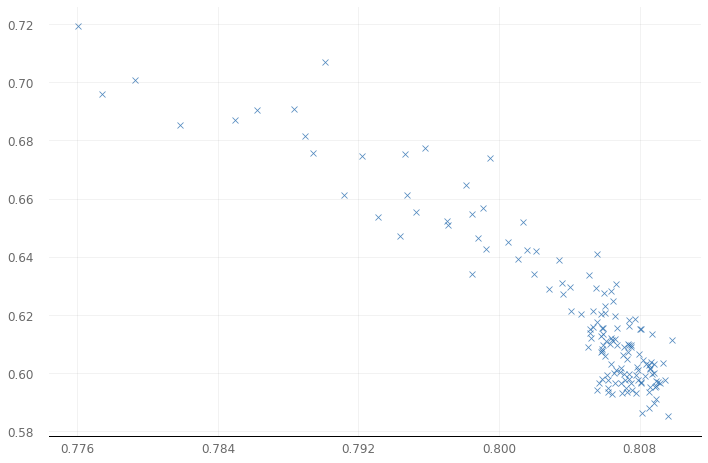

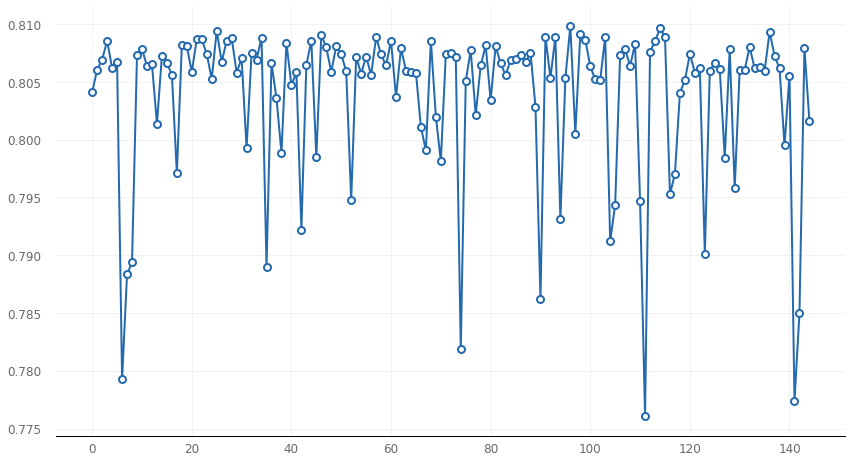

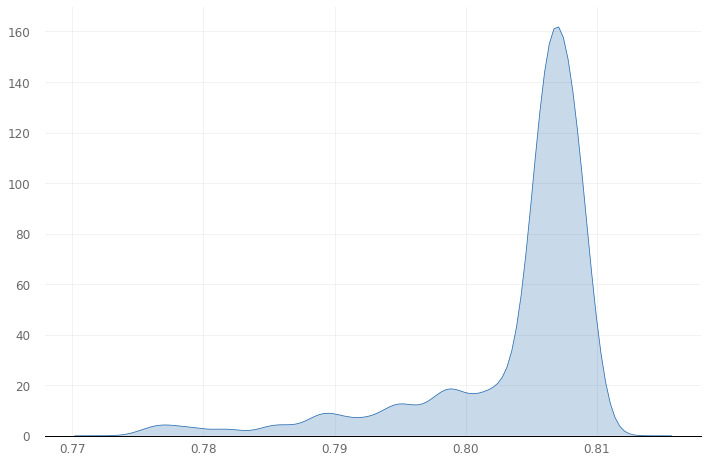

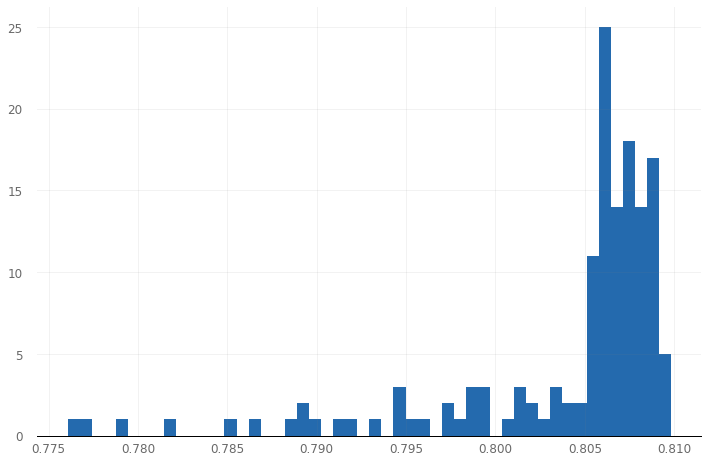

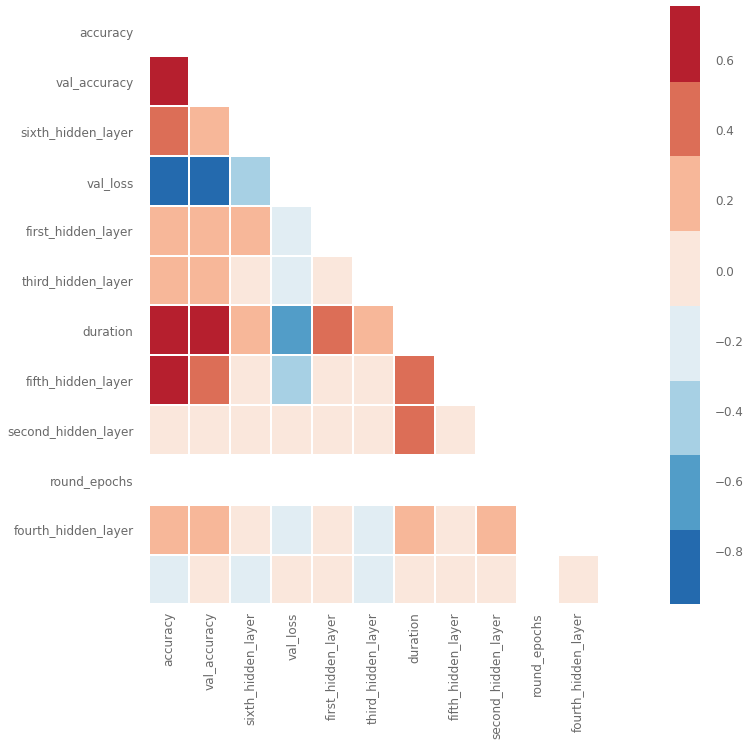

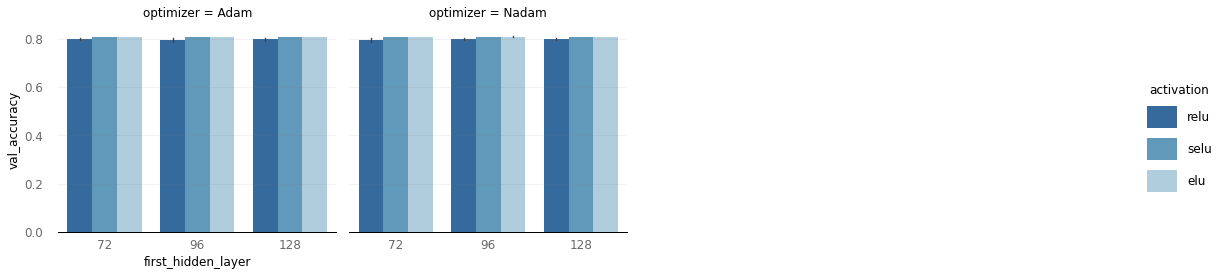

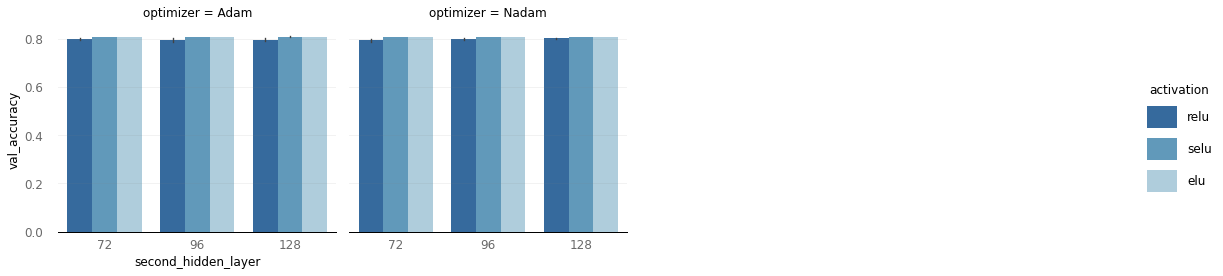

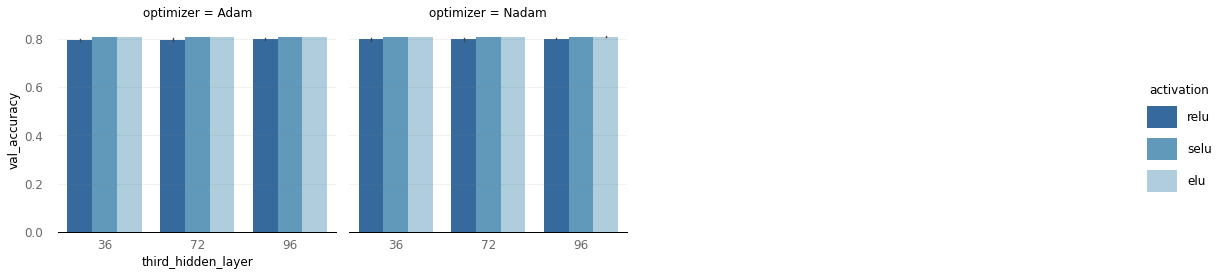

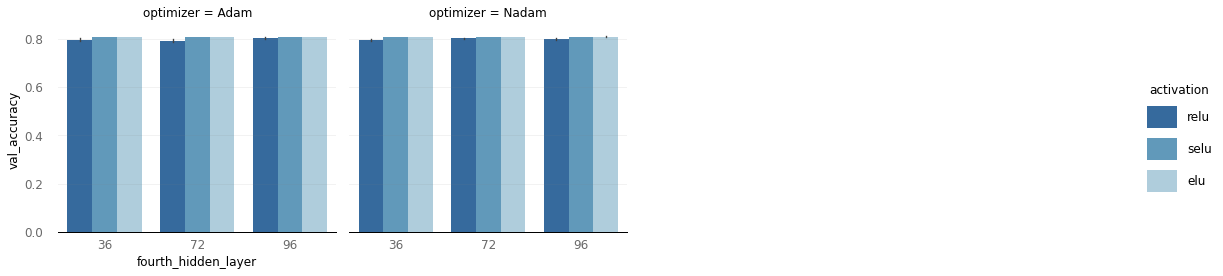

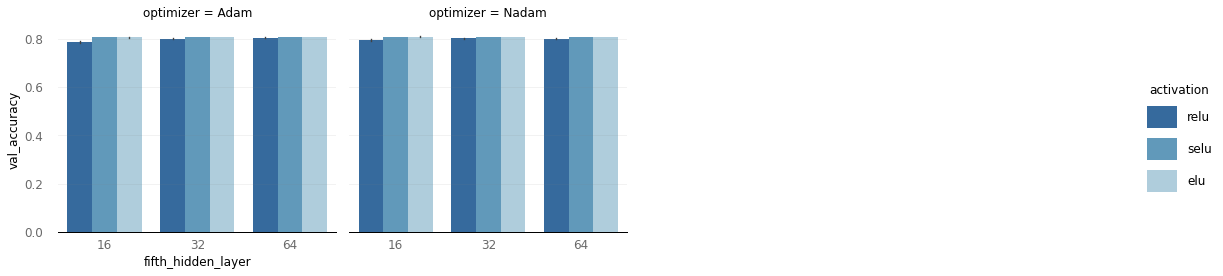

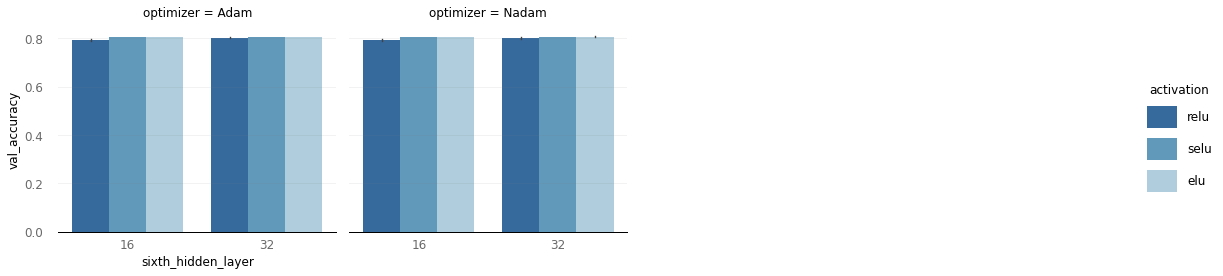

In [23]:
# a regression plot for two dimensions 
analyze_object.plot_regs('val_accuracy', 'val_loss')

# line plot
analyze_object.plot_line('val_accuracy')

# up to two dimensional kernel density estimator
analyze_object.plot_kde('val_accuracy')

# a simple histogram
analyze_object.plot_hist('val_accuracy', bins=50)

# heatmap correlation
analyze_object.plot_corr('val_loss', ['acc', 'loss', 'val_loss'])

# a four dimensional bar grid
analyze_object.plot_bars('first_hidden_layer', 'val_accuracy', 'activation', 'optimizer')
analyze_object.plot_bars('second_hidden_layer', 'val_accuracy', 'activation', 'optimizer')
analyze_object.plot_bars('third_hidden_layer', 'val_accuracy', 'activation', 'optimizer')
analyze_object.plot_bars('fourth_hidden_layer', 'val_accuracy', 'activation', 'optimizer')
analyze_object.plot_bars('fifth_hidden_layer', 'val_accuracy', 'activation', 'optimizer')
analyze_object.plot_bars('sixth_hidden_layer', 'val_accuracy', 'activation', 'optimizer')

In [24]:
evaluate_object = ta.Evaluate(t)
evaluate_object.evaluate(x_train, y_train, folds=10, metric='val_accuracy', task='multi_label')

ta.Deploy(scan_object=t, model_name='pssm4_NRaa', metric='val_accuracy')

KeyError: "None of [Int64Index([105763,  86537,  46053,  71475,  97616,  45820,  27564,  35881,\n             20911,  48586,\n            ...\n            117404, 100353,  85510,  53272, 107774,  83168,  64786,  52026,\n             24992,   4602],\n           dtype='int64', length=140149)] are in the [columns]"